In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('Data_set_clustering.csv', sep=';')


# Por Registros

In [3]:
data.describe()

id    div_cliente  terminal_origen          guias  \
count  132843.000000  132843.000000    132843.000000  132843.000000   
mean     2830.619483       3.913657         9.016764      32.383611   
std      1196.011531      10.147330        10.270470    1992.268269   
min         1.000000       0.000000         1.000000       1.000000   
25%      2009.000000       1.000000         2.000000       1.000000   
50%      2539.000000       1.000000         4.000000       2.000000   
75%      3788.000000       2.000000        13.000000       5.000000   
max      5286.000000      99.000000        41.000000  584857.000000   

            unidades  
count  132843.000000  
mean       38.417771  
std      2000.300267  
min         1.000000  
25%         1.000000  
50%         2.000000  
75%         7.000000  
max    584857.000000

## Variables Categóricas

In [4]:
columns_cat = [i for i in data.columns if data[i].dtype == object]

In [5]:
data.describe(include=['object', 'category'])


CPS devolucion Grupo_Producto               Producto  \
count     132843     132843         132843                 132843   
unique         4          2              6                     14   
top     A tiempo         No     Mensajeria  Paquetes 1-2 Kl. (ME)   
freq       60693     116576          86272                  55389   

                                         Sector_Economico     FCE     RCE  \
count                                              132843  132843  132843   
unique                                                 27       2       2   
top     Confeccion ( fabricacion y comercializacion de...      No      No   
freq                                                24396  122583  124301   

       vr_declarado       tipo_cuenta  
count        132843            132843  
unique            3                 9  
top            Bajo  Cuenta Corriente  
freq          60302             76542

In [6]:
for i in columns_cat:
    print(f'{i}: {data[i].unique()}')
    print()

CPS: ['A tiempo' 'Mayor tiempo no justificado' 'Oportunidad de mejora'
 'Oportunidad de entrega']

devolucion: ['No' 'Si']

Grupo_Producto: ['Mensajeria' 'Mcia' 'MQP' 'Internacional' 'Contenedores' 'Carga Masiva']

Producto: ['Paquetes 1-2 Kl. (ME)' 'Mercancia' 'Paqueteo 3-5 Kl.' 'Mercancia XL'
 'Mensajeria' 'Radicación de Documentos' 'Mercancia Quimicos Peligrosos'
 'Mercancia Aerea' 'Firma de Documentos' 'Paq Internal'
 'Vehiculos Dedicados' 'Masiva 30 Toneladas' 'Doc Internal'
 'Masiva 15 Toneladas']

Sector_Economico: ['E-Commerce'
 'Marroquineria, calzado e insumos de cuero ( bolsos, billeteras, correas)'
 'Confeccion ( fabricacion y comercializacion de prendas)'
 'Entidades de servicios varios ( personal, capacitaciones, asesorias, salud, serv. publicos, serv de aseo, transporte,'
 'Operadores logisticos'
 'Tecnolog¡a ( computadores, impresoras, camaras, celulares, ipod, etc)'
 'Entidades financieras y administradoras de pensiones y cesantias'
 'Cosmeticos, productos de belleza, 

## Análisis descriptivo por variable

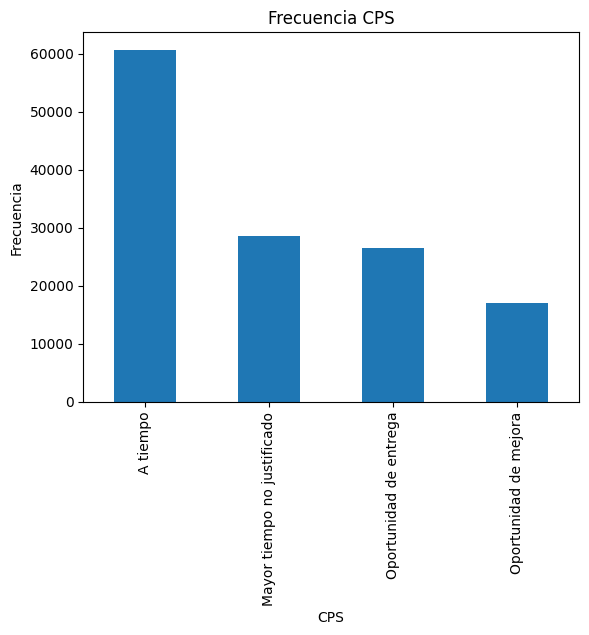

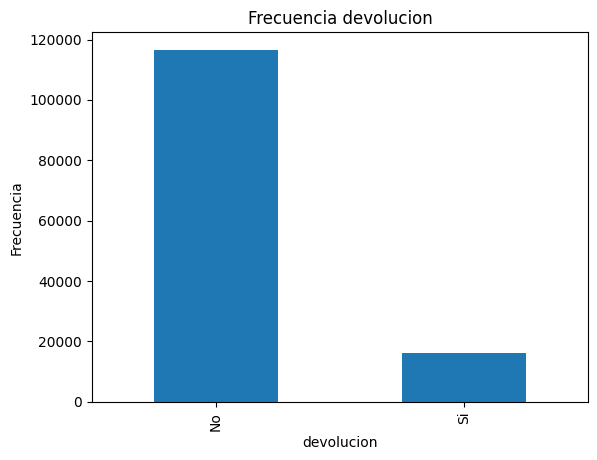

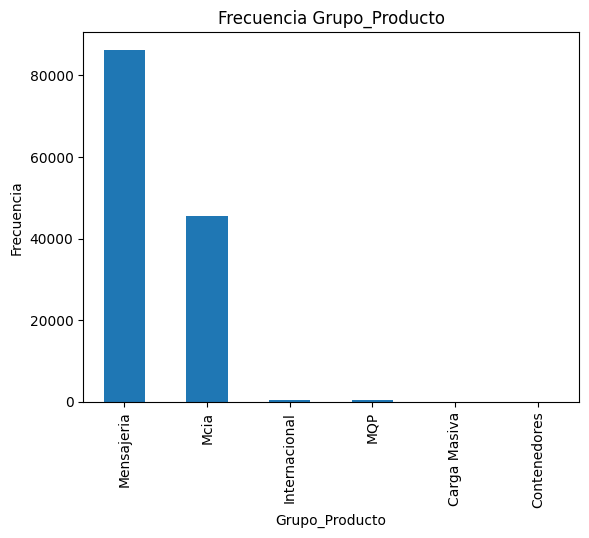

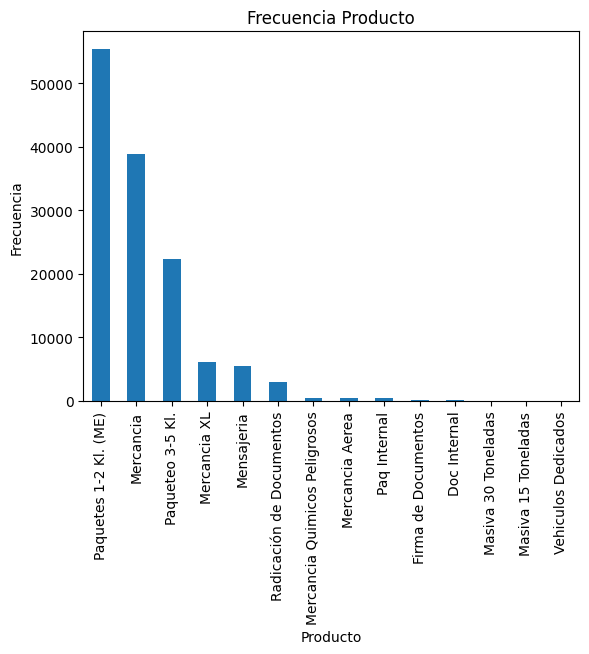

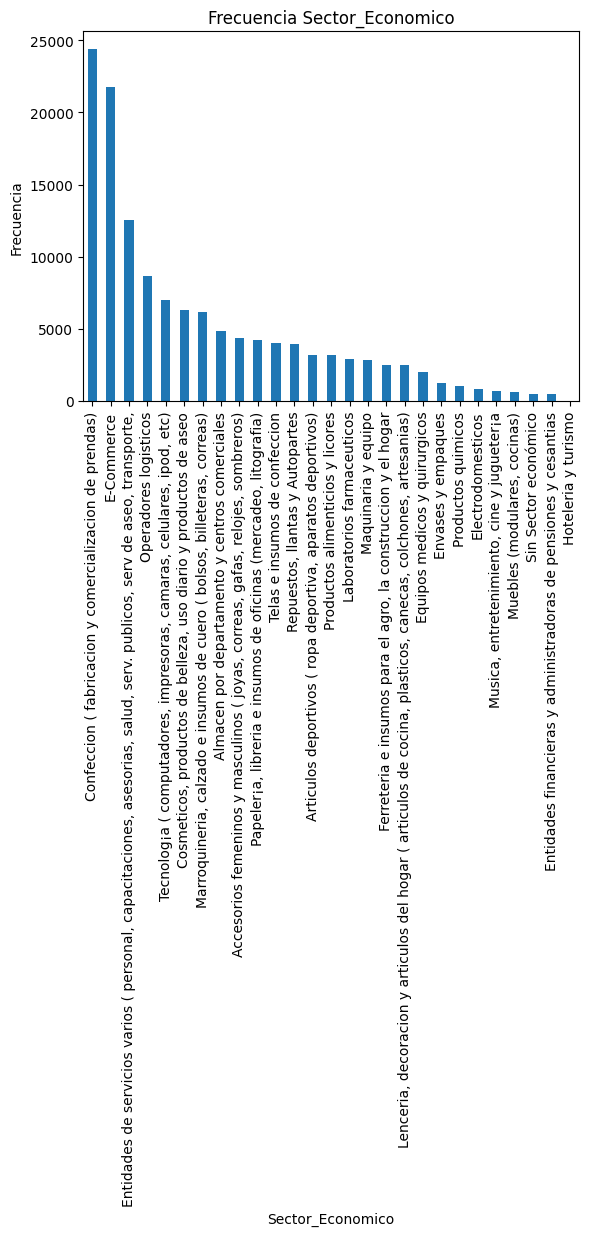

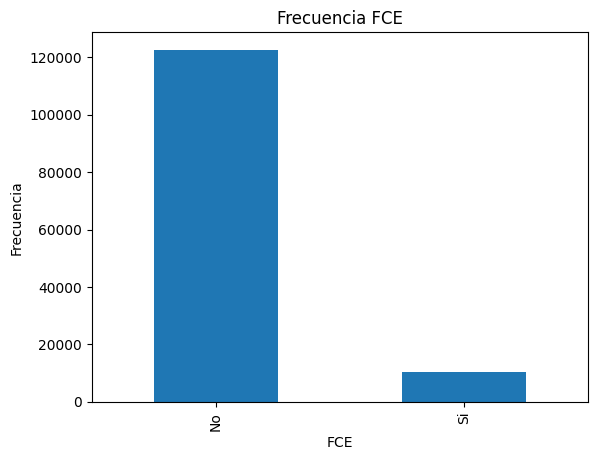

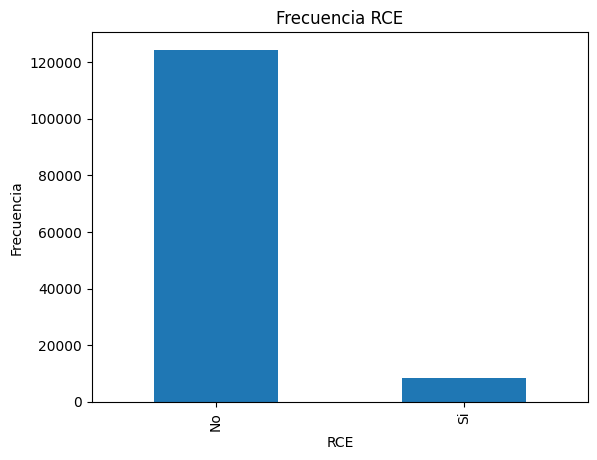

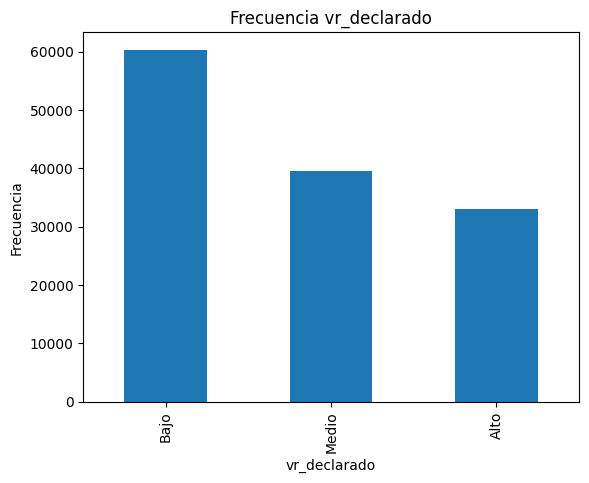

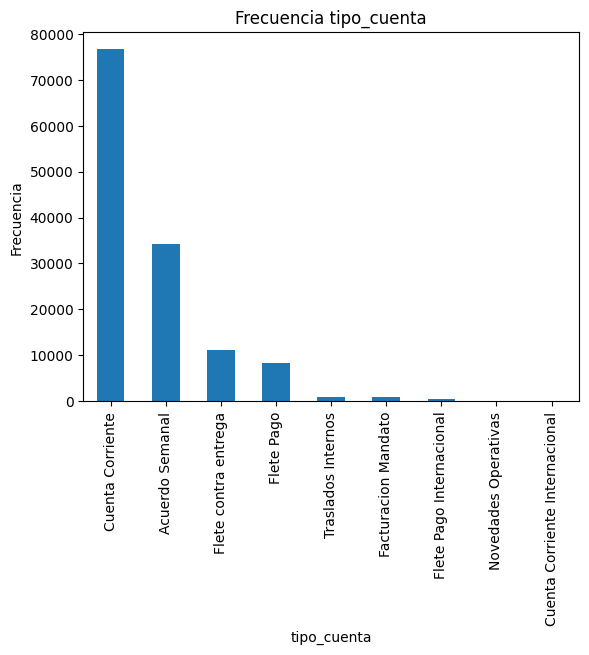

In [7]:
for i in columns_cat:
    
    freq = data[i].value_counts()
    
    freq.plot(kind="bar")
    plt.xlabel(i)
    plt.ylabel("Frecuencia")
    plt.title(f"Frecuencia {i}")
    plt.show()
    print()

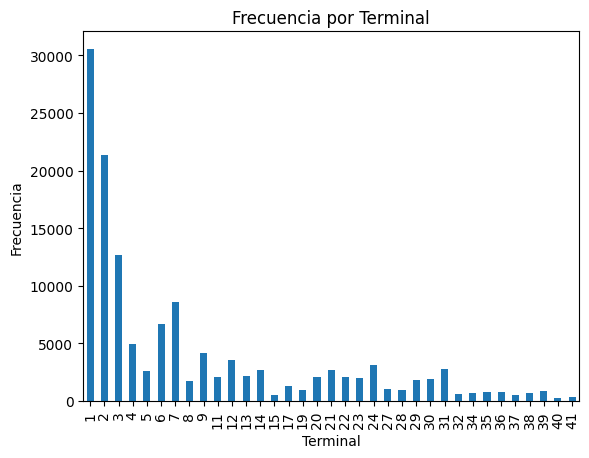

In [8]:
freq = data['terminal_origen'].value_counts()

freq = freq.sort_index()

freq.plot(kind="bar")
plt.xlabel('Terminal')
plt.ylabel("Frecuencia")
plt.title("Frecuencia por Terminal")
plt.show()

## Boxplot Guías

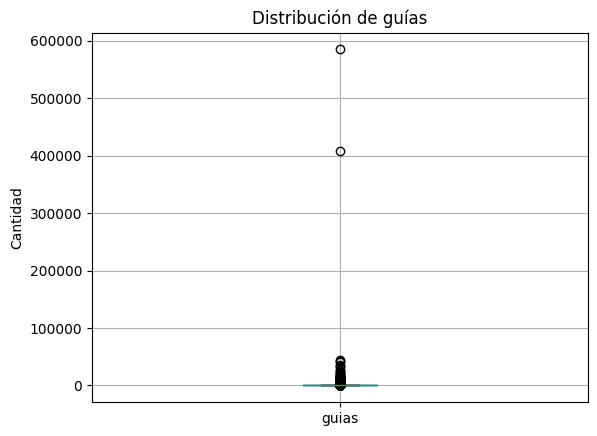

In [9]:
data[['guias']].boxplot()
plt.title("Distribución de guías")
plt.ylabel("Cantidad")
plt.show()

In [10]:
data.groupby("Grupo_Producto")["guias"].describe().T

Grupo_Producto  Carga Masiva  Contenedores  Internacional         MQP  \
count              22.000000           1.0     527.000000  487.000000   
mean                1.454545           6.0       1.776091    8.326489   
std                 0.800433           NaN       2.165921   20.317697   
min                 1.000000           6.0       1.000000    1.000000   
25%                 1.000000           6.0       1.000000    1.000000   
50%                 1.000000           6.0       1.000000    2.000000   
75%                 2.000000           6.0       1.000000    6.000000   
max                 4.000000           6.0      19.000000  205.000000   

Grupo_Producto          Mcia     Mensajeria  
count           45534.000000   86272.000000  
mean               20.426780      39.025338  
std               282.649047    2463.627863  
min                 1.000000       1.000000  
25%                 1.000000       1.000000  
50%                 2.000000       2.000000  
75%                 5.000000       6.000000  
max             42234.000000  584857.000000

In [11]:
data.groupby("Grupo_Producto")["guias"].quantile(
    [i/100 for i in range(5, 105, 5)]
).unstack()

0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  \
Grupo_Producto                                                               
Carga Masiva     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Contenedores     6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   
Internacional    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
MQP              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   2.0   
Mcia             1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   
Mensajeria       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   2.0   

                0.55  0.60  0.65  0.70  0.75  0.80  0.85  0.90   0.95  \
Grupo_Producto                                                          
Carga Masiva     1.0   1.0   1.0   1.7   2.0   2.0   2.0   2.0   2.95   
Contenedores     6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.00   
Internacional    1.0   1.0   1.0   1.0   1.0   1.8   2.0   4.0   6.00   
MQP              2.0   3.0   4.0   5.0   6.0   8.0  12.0  18.0  31.70   
Mcia             2.0   2.0   3.0   4.0   5.0   7.0  11.0  20.0  51.00   
Mensajeria       2.0   3.0   3.0   4.0   6.0   8.0  13.0  23.0  60.00   

                    1.00  
Grupo_Producto            
Carga Masiva         4.0  
Contenedores         6.0  
Internacional       19.0  
MQP                205.0  
Mcia             42234.0  
Mensajeria      584857.0

In [12]:
pd.set_option("display.max_columns", None)
data.groupby("Sector_Economico")["guias"].describe().T

Sector_Economico  Accesorios femeninos y masculinos ( joyas, correas, gafas, relojes, sombreros)  \
count                                                   4397.000000                                
mean                                                      11.094610                                
std                                                       51.247674                                
min                                                        1.000000                                
25%                                                        1.000000                                
50%                                                        2.000000                                
75%                                                        5.000000                                
max                                                     1750.000000                                

Sector_Economico  Almacen por departamento y centros comerciales  \
count                                                4844.000000   
mean                                                   16.295004   
std                                                   108.269160   
min                                                     1.000000   
25%                                                     1.000000   
50%                                                     2.000000   
75%                                                     6.000000   
max                                                  3551.000000   

Sector_Economico  Articulos deportivos ( ropa deportiva, aparatos deportivos)  \
count                                                   3174.000000             
mean                                                      16.086641             
std                                                      105.883451             
min                                                        1.000000             
25%                                                        1.000000             
50%                                                        2.000000             
75%                                                        5.000000             
max                                                     3709.000000             

Sector_Economico  Confeccion ( fabricacion y comercializacion de prendas)  \
count                                                  24396.000000         
mean                                                      21.241064         
std                                                      283.078180         
min                                                        1.000000         
25%                                                        1.000000         
50%                                                        2.000000         
75%                                                        6.000000         
max                                                    32290.000000         

Sector_Economico  Cosmeticos, productos de belleza, uso diario y productos de aseo  \
count                                                   6317.000000                  
mean                                                      20.993193                  
std                                                      178.834952                  
min                                                        1.000000                  
25%                                                        1.000000                  
50%                                                        2.000000                  
75%                                                        5.000000                  
max                                                    10259.000000                  

Sector_Economico     E-Commerce  Electrodomesticos  \
count              21783.000000         843.000000   
mean                  89.196988           5.615658   
std                 4879.718714          19.477421   
min                    1.000000           1.000000   
25%              

In [13]:
data.groupby("Sector_Economico")["guias"].quantile(
    [i/100 for i in range(5, 105, 5)]
).unstack()

0.05  0.10  0.15  0.20  \
Sector_Economico                                                             
Accesorios femeninos y masculinos ( joyas, corr...   1.0   1.0   1.0   1.0   
Almacen por departamento y centros comerciales       1.0   1.0   1.0   1.0   
Articulos deportivos ( ropa deportiva, aparatos...   1.0   1.0   1.0   1.0   
Confeccion ( fabricacion y comercializacion de ...   1.0   1.0   1.0   1.0   
Cosmeticos, productos de belleza, uso diario y ...   1.0   1.0   1.0   1.0   
E-Commerce                                           1.0   1.0   1.0   1.0   
Electrodomesticos                                    1.0   1.0   1.0   1.0   
Entidades de servicios varios ( personal, capac...   1.0   1.0   1.0   1.0   
Entidades financieras y administradoras de pens...   1.0   1.0   1.0   1.0   
Envases y empaques                                   1.0   1.0   1.0   1.0   
Equipos medicos y quirurgicos                        1.0   1.0   1.0   1.0   
Ferreteria e insumos para el agro, la construcc...   1.0   1.0   1.0   1.0   
Hoteleria y turismo                                  1.0   1.0   1.0   1.0   
Laboratorios farmaceuticos                           1.0   1.0   1.0   1.0   
Lenceria, decoracion y articulos del hogar ( ar...   1.0   1.0   1.0   1.0   
Maquinaria y equipo                                  1.0   1.0   1.0   1.0   
Marroquineria, calzado e insumos de cuero ( bol...   1.0   1.0   1.0   1.0   
Muebles (modulares, cocinas)                         1.0   1.0   1.0   1.0   
Musica, entretenimiento, cine y jugueter¡a           1.0   1.0   1.0   1.0   
Operadores logisticos                                1.0   1.0   1.0   1.0   
Papeler¡a, libreria e insumos de oficinas (merc...   1.0   1.0   1.0   1.0   
Productos alimenticios y licores                     1.0   1.0   1.0   1.0   
Productos quimicos                                   1.0   1.0   1.0   1.0   
Repuestos, llantas y Autopartes                      1.0   1.0   1.0   1.0   
Sin Sector económico                                 1.0   1.0   1.0   1.0   
Tecnolog¡a ( computadores, impresoras, camaras,...   1.0   1.0   1.0   1.0   
Telas e insumos de confeccion                        1.0   1.0   1.0   1.0   

                                                    0.25  0.30  0.35  0.40  \
Sector_Economico                                                             
Accesorios femeninos y masculinos ( joyas, corr...   1.0   1.0   1.0   1.0   
Almacen por departamento y centros comerciales       1.0   1.0   1.0   1.0   
Articulos deportivos ( ropa deportiva, aparatos...   1.0   1.0   1.0   1.0   
Confeccion ( fabricacion y comercializacion de ...   1.0   1.0   1.0   1.0   
Cosmeticos, productos de belleza, uso diario y ...   1.0   1.0   1.0   1.0   
E-Commerce                                           1.0   1.0   1.0   1.0   
Electrodomesticos                                    1.0   1.0   1.0   1.0   
Entidades de servicios varios ( personal, capac...   1.0   1.0   1.0   1.0   
Entidades financieras y administradoras de pens...   1.0   1.0   1.0   1.0   
Envases y empaques                                   1.0   1.0   1.0   1.0   
Equipos medicos y quirurgicos                        1.0   1.0   1.0   1.0   
Ferreteria e insumos para el agro, la construcc...   1.0   1.0   1.0   1.0   
Hoteleria y turismo                                  1.0   1.0   1.0   1.0   
Laboratorios farmaceuticos                           1.0   1.0   1.0   1.0   
Lenceria, decoracion y articulos del hogar ( ar...   1.0   1.0   1.0   1.0   
Maquinaria y equipo                                  1.0   1.0   1.0   1.0   
Marroquineria, calzado e insumos de cuero ( bol...   1.0   1.0   1.0   1.0   
Muebles (modulares, cocinas)                         1.0   1.0   1.0   1.0   
Musica, entretenimiento, cine y jugueter¡a           1.0   1.0   1.0   1.0   
Operadores logisticos                                1.0   1.0   1.0   1.0   
Papeler¡a, libreria e insumos de oficinas (merc...   1.0   1.0   1.0   1.

In [14]:
pd.reset_option("display.max_columns")


In [15]:
len(data)

132843

In [16]:
out_guias = data[data['guias']>100].copy()
print(f'Registros con más de 100 guías: {len(out_guias)}')

Registros con más de 100 guías: 4049


In [17]:
out_guias['id_cliente'] = out_guias['id'].astype(str)+'-'+out_guias['div_cliente'].astype(str)

In [18]:
clientes = data['id'].astype(str)+'-'+data['div_cliente'].astype(str)

## Guías/Unidades

In [19]:
data['unidad/guia'] = data['unidades']/data['guias']

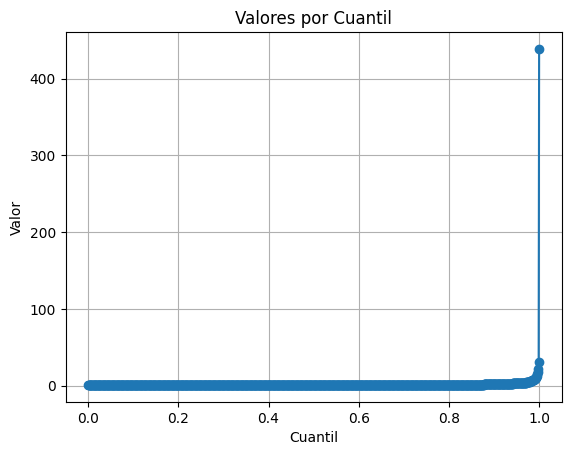

In [20]:
qs = [i/1000 for i in range(0, 1001, 1)]
qvals = data['unidad/guia'].quantile(qs)

plt.plot(qvals.index, qvals.values, marker="o")
plt.xlabel("Cuantil")
plt.ylabel("Valor")
plt.title("Valores por Cuantil")
plt.grid(True)
plt.show()

## Outliers 

### Z-score

In [21]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
data_ = data[['unidad/guia','guias']].copy()
df_z = pd.DataFrame(ss.fit_transform(X=data_), index=data_.index, columns = data_.columns)

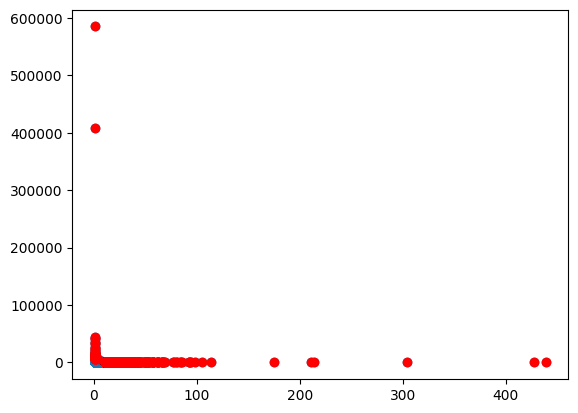

In [22]:
plt.scatter(x=data_['unidad/guia'], y=data_['guias'])

df_cont_outl = data_[(df_z['unidad/guia']>3) | (df_z['unidad/guia']<-3) | (df_z['guias']>3) | (df_z['guias']<-3)]

plt.scatter(x=df_cont_outl['unidad/guia'], y=df_cont_outl['guias'], c='red')

In [23]:
df_diff = data.merge(
    df_cont_outl,
    how="left",
    indicator=True
)
df_diff1 = df_diff[df_diff["_merge"] == "left_only"].drop(columns="_merge")


In [24]:
len(df_cont_outl)

988

In [25]:
len(df_diff1)

131855

In [26]:
df_diff1[['guias', 'unidad/guia']].describe()

guias    unidad/guia
count  131855.000000  131855.000000
mean       19.947313       1.271236
std       142.945028       0.950630
min         1.000000       1.000000
25%         1.000000       1.000000
50%         2.000000       1.000000
75%         5.000000       1.000000
max      5939.000000      10.523810

In [27]:
out_zscore = df_diff1[df_diff1['guias']>100].copy()
print(f'Registros con más de 100 guías: {len(out_zscore)}')

Registros con más de 100 guías: 3987


In [28]:
out_zscore['id_cliente'] = out_zscore['id'].astype(str)+'-'+out_zscore['div_cliente'].astype(str)

In [29]:
clientes_zscore = df_diff1['id'].astype(str)+'-'+df_diff1['div_cliente'].astype(str)

### Isolation Forest

In [30]:
from sklearn.ensemble import IsolationForest

X = data[['unidad/guia', 'guias', 'Grupo_Producto']]
X = pd.get_dummies(X, drop_first=True)

iso = IsolationForest(contamination=0.02, random_state=42)
labels = iso.fit_predict(X)

outliers = data[labels == -1]
inliers = data[labels == 1]

In [31]:
inliers[['guias', 'unidad/guia']].describe()

guias    unidad/guia
count  130186.000000  130186.000000
mean       10.693177       1.256716
std        36.196736       0.922955
min         1.000000       1.000000
25%         1.000000       1.000000
50%         2.000000       1.000000
75%         5.000000       1.000000
max       591.000000      11.250000

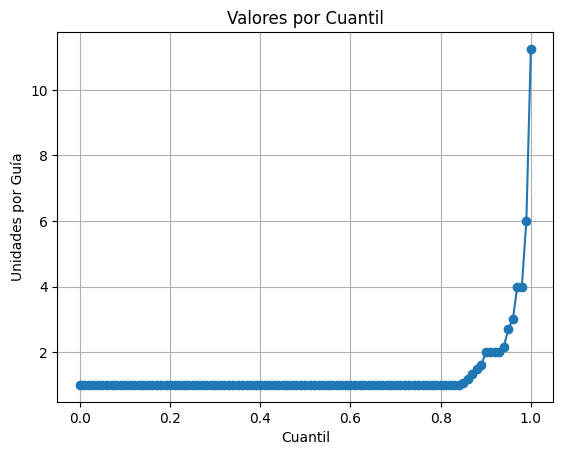

In [32]:
qs = [i/100 for i in range(0, 101, 1)]
qvals = inliers['unidad/guia'].quantile(qs)

plt.plot(qvals.index, qvals.values, marker="o")
plt.xlabel("Cuantil")
plt.ylabel("Unidades por Guía")
plt.title("Valores por Cuantil")
plt.grid(True)
plt.show()

In [33]:
inliers.groupby("Grupo_Producto")["guias"].quantile(
    [i/100 for i in range(5, 105, 5)]
).unstack()

0.05  0.10  0.15  0.20  0.25  0.30  0.35  0.40  0.45  0.50  \
Grupo_Producto                                                               
Carga Masiva     1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Contenedores     6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   
Internacional    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
MQP              1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Mcia             1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   
Mensajeria       1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   2.0   

                0.55  0.60  0.65  0.70  0.75  0.80  0.85  0.90   0.95   1.00  
Grupo_Producto                                                                
Carga Masiva     1.0   1.0   1.0   1.7   2.0   2.0   2.0   2.0   2.95    4.0  
Contenedores     6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.0   6.00    6.0  
Internacional    1.0   1.0   1.0   1.0   1.0   1.0   2.0   4.0   6.00   19.0  
MQP              1.0   1.6   2.0   2.0   2.0   2.0   3.0   5.0   9.00   24.0  
Mcia             2.0   2.0   3.0   4.0   5.0   7.0  10.0  17.0  36.00  276.0  
Mensajeria       2.0   3.0   3.0   4.0   6.0   8.0  12.0  21.0  52.00  591.0

In [34]:
out_guias_isl_forest = inliers[inliers['guias']>100].copy()
print(f'Registros con más de 100 guías: {len(out_guias_isl_forest)}')

Registros con más de 100 guías: 2823


In [35]:
out_guias_isl_forest['id_cliente'] = out_guias_isl_forest['id'].astype(str)+'-'+out_guias_isl_forest['div_cliente'].astype(str)

In [36]:
clientes_isl_forest = inliers['id'].astype(str)+'-'+inliers['div_cliente'].astype(str)

In [37]:
clientes_out = {
    'Clientes más de 100 guías': [len(out_guias['id_cliente'].unique()), len(out_zscore['id_cliente'].unique()), len(out_guias_isl_forest['id_cliente'].unique())],
    'Total Clientes': [len(clientes.unique()), len(clientes_zscore.unique()), len(clientes_isl_forest.unique())]
    
}

In [38]:
df_clientes_out = pd.DataFrame(
    clientes_out,
    index=['Base', 'Z score', 'Isolation Forest']   
).T

df_clientes_out

Base  Z score  Isolation Forest
Clientes más de 100 guías  1258     1254              1080
Total Clientes             7263     7252              7215

### FCE y RCE

In [39]:
sum(data['FCE']=='Si')

10260

In [40]:
sum(data['RCE']=='Si')

8542

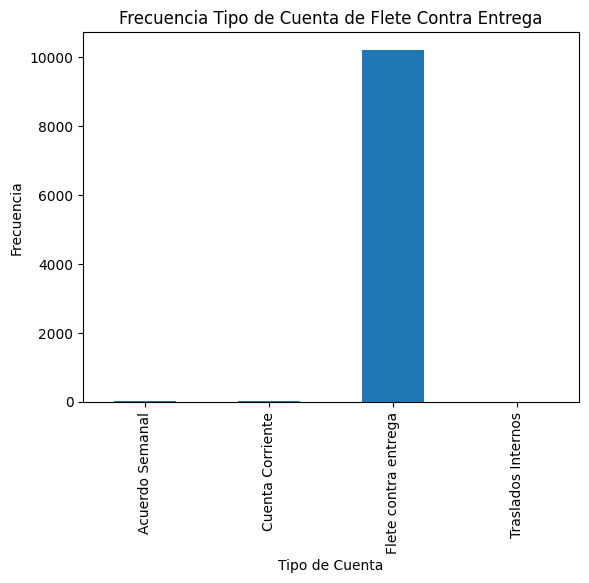

In [41]:
data_fce = data[(data['FCE']=='Si')]

freq_fce = data_fce['tipo_cuenta'].value_counts()

freq_fce = freq_fce.sort_index()

freq_fce.plot(kind="bar")
plt.xlabel('Tipo de Cuenta')
plt.ylabel("Frecuencia")
plt.title("Frecuencia Tipo de Cuenta de Flete Contra Entrega")
plt.show()

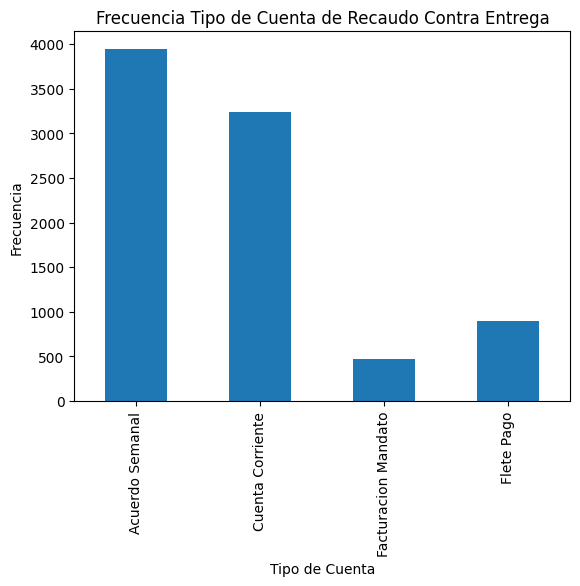

In [42]:
data_rce = data[(data['RCE']=='Si')]

freq_rce = data_rce['tipo_cuenta'].value_counts()

freq_rce = freq_rce.sort_index()

freq_rce.plot(kind="bar")
plt.xlabel('Tipo de Cuenta')
plt.ylabel("Frecuencia")
plt.title("Frecuencia Tipo de Cuenta de Recaudo Contra Entrega")
plt.show()

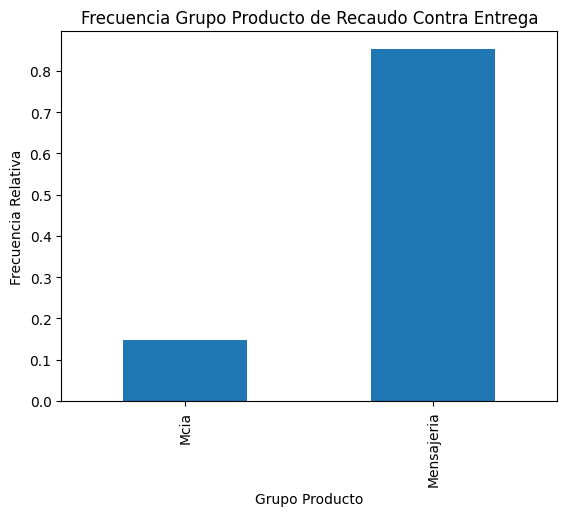

In [43]:
freq_rce_gp = data_rce['Grupo_Producto'].value_counts()/sum(data_rce['Grupo_Producto'].value_counts())

freq_rce_gp = freq_rce_gp.sort_index()

freq_rce_gp.plot(kind="bar")
plt.xlabel('Grupo Producto')
plt.ylabel("Frecuencia Relativa")
plt.title("Frecuencia Grupo Producto de Recaudo Contra Entrega")
plt.show()

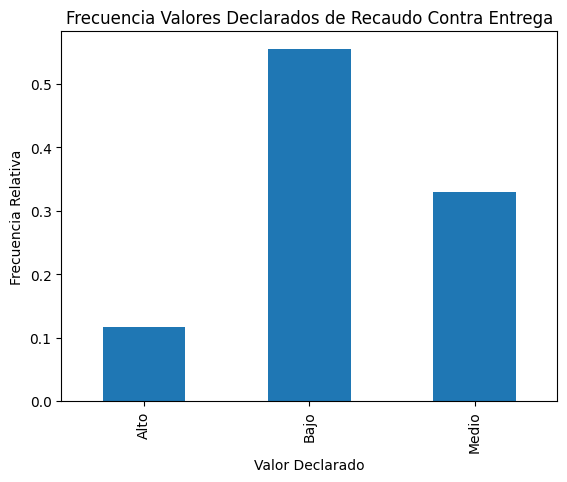

In [44]:
freq_rce_vr = data_rce['vr_declarado'].value_counts()/sum(data_rce['vr_declarado'].value_counts())

freq_rce_vr = freq_rce_vr.sort_index()

freq_rce_vr.plot(kind="bar")
plt.xlabel('Valor Declarado')
plt.ylabel("Frecuencia Relativa")
plt.title("Frecuencia Valores Declarados de Recaudo Contra Entrega")
plt.show()

# Por Cliente

## Cambios Categoría por Cliente

In [45]:
categorias_cliente = data.groupby(['id', 'div_cliente'])[columns_cat].nunique()

In [46]:
categorias_cliente.describe()

CPS   devolucion  Grupo_Producto     Producto  \
count  7263.000000  7263.000000     7263.000000  7263.000000   
mean      2.969709     1.259672        1.537381     2.349442   
std       1.216981     0.438485        0.504947     1.324260   
min       1.000000     1.000000        1.000000     1.000000   
25%       2.000000     1.000000        1.000000     1.000000   
50%       4.000000     1.000000        2.000000     2.000000   
75%       4.000000     2.000000        2.000000     3.000000   
max       4.000000     2.000000        4.000000     9.000000   

       Sector_Economico          FCE          RCE  vr_declarado  tipo_cuenta  
count            7263.0  7263.000000  7263.000000   7263.000000  7263.000000  
mean                1.0     1.161917     1.138786      1.939419     1.146771  
std                 0.0     0.368400     0.345746      0.855052     0.356615  
min                 1.0     1.000000     1.000000      1.000000     1.000000  
25%                 1.0     1.000000     1.000000      1.000000     1.000000  
50%                 1.0     1.000000     1.000000      2.000000     1.000000  
75%                 1.0     1.000000     1.000000      3.000000     1.000000  
max                 1.0     2.000000     2.000000      3.000000     3.000000

In [47]:
data.groupby(['id', 'div_cliente']).size().describe()

count    7263.000000
mean       18.290376
std        54.883466
min         1.000000
25%         3.000000
50%         8.000000
75%        17.000000
max      3016.000000
dtype: float64

### Reemplazo Categorías Menores

In [48]:
data["Producto"] = data["Producto"].where(data["Grupo_Producto"].isin(['Mensajeria', 'Mcia']), "Otro")

In [49]:
data["Grupo_Producto"] = data["Grupo_Producto"].where(data["Grupo_Producto"].isin(['Mensajeria', 'Mcia']), "Otro")

In [50]:
sector_eco = data['Sector_Economico'].value_counts()
list_eco = sector_eco[sector_eco >= 1200].index.tolist()

data["Sector_Economico"] = data["Sector_Economico"].where(data["Sector_Economico"].isin(list_eco), "Otro")

In [51]:
tipo_cuenta = data['tipo_cuenta'].value_counts()
list_cuenta = tipo_cuenta[tipo_cuenta >= 8000].index.tolist()

data["tipo_cuenta"] = data["tipo_cuenta"].where(data["tipo_cuenta"].isin(list_cuenta), "Otro")

In [52]:
categorias_cliente = data.groupby(['id', 'div_cliente'])[columns_cat].nunique()

In [53]:
dev = data[data.duplicated(subset=[c for c in data.columns if c != 'devolucion'], keep=False)]

del_index = dev[dev['devolucion']=='No'].index.tolist()

In [54]:
data = data.drop(columns=['FCE'])

columns_cat.remove('FCE')

In [55]:
data_uniq = data.copy()

In [56]:
data = data_uniq.copy()
data = data.drop(del_index).reset_index(drop=True)

### Categorías por Proporción

In [57]:
dfs = [] 

for col in columns_cat:

    freq = pd.crosstab(
        index=[data['id'], data['div_cliente']],
        columns=data[col],
        normalize='index' 
    )

    freq.columns = [f"{col}_{v}" for v in freq.columns]

    dfs.append(freq)

data_model = pd.concat(dfs, axis=1).reset_index()

In [58]:
data_model

id  div_cliente  CPS_A tiempo  CPS_Mayor tiempo no justificado  \
0        1            0      1.000000                         0.000000   
1        2            0      1.000000                         0.000000   
2        3            1      0.437500                         0.250000   
3        4            0      0.368421                         0.210526   
4        5            0      0.666667                         0.000000   
...    ...          ...           ...                              ...   
7256  5283            0      0.500000                         0.250000   
7257  5284            0      0.600000                         0.200000   
7258  5285            0      0.750000                         0.000000   
7259  5285            1      0.250000                         0.500000   
7260  5286            0      1.000000                         0.000000   

      CPS_Oportunidad de entrega  CPS_Oportunidad de mejora  devolucion_No  \
0                       0.000000                   0.000000            1.0   
1                       0.000000                   0.000000            1.0   
2                       0.187500                   0.125000            1.0   
3                       0.210526                   0.210526            1.0   
4                       0.166667                   0.166667            1.0   
...                          ...                        ...            ...   
7256                    0.125000                   0.125000            1.0   
7257                    0.200000                   0.000000            1.0   
7258                    0.250000                   0.000000            1.0   
7259                    0.250000                   0.000000            1.0   
7260                    0.000000                   0.000000            1.0   

      devolucion_Si  Grupo_Producto_Mcia  Grupo_Producto_Mensajeria  ...  \
0               0.0             0.000000                   0.000000  ...   
1               0.0             0.000000                   0.000000  ...   
2               0.0             0.000000                   1.000000  ...   
3               0.0             0.210526                   0.789474  ...   
4               0.0             0.000000                   1.000000  ...   
...             ...                  ...                        ...  ...   
7256            0.0             1.000000                   0.000000  ...   
7257            0.0             0.200000                   0.800000  ...   
7258            0.0             0.750000                   0.250000  ...   
7259            0.0             1.000000                   0.000000  ...   
7260            0.0             0.000000                   0.000000  ...   

      RCE_No  RCE_Si  vr_declarado_Alto  vr_declarado_Bajo  \
0     1.0000  0.0000           1.000000           0.000000   
1     1.0000  0.0000           0.000000           0.000000   
2     0.5625  0.4375           0.000000           1.000000   
3     1.0000  0.0000           0.210526           0.789474   
4     0.5000  0.5000           0.000000           1.000000   
...      ...     ...                ...                ...   
7256  1.0000  0.0000           0.625000           0.125000   
7257  1.0000  0.0000           0.200000           0.800000   
7258  1.0000  0.0000           0.750000           0.000000   
7259  1.0000  0.0000           1.000000           0.000000   
7260  1.0000  0.0000           0.000000           1.000000   

      vr_declarado_Medio  tipo_cuenta_Acuerdo Semanal  \
0                   0.00                          0.0   
1                   1.00                          0.0   
2                   0.00                          0.0   
3                   0.00                          0.0   
4                   0.00                          0.0   
...                  ...                          ...   
7256                0.25                          0.0   
7257                0.00                          0.0   
7258       

In [59]:
data_model['guias'] = data.groupby(['id', 'div_cliente']).sum()['guias'].values

data_model['unidades'] = data.groupby(['id', 'div_cliente']).sum()['unidades'].values

data_model['Registros'] = data.groupby(['id', 'div_cliente']).size().values

data_model['unidad/guia'] = data_model['unidades']/data_model['guias'] 

data_model['guias_prom'] = data_model['guias'] / data_model['Registros']


In [60]:
data_model['Registros'].describe()

count    7261.000000
mean       18.214571
std        54.486402
min         1.000000
25%         3.000000
50%         8.000000
75%        17.000000
max      2993.000000
Name: Registros, dtype: float64

In [61]:
pd.set_option('display.max_columns', None)
data_model.describe()


id  div_cliente  CPS_A tiempo  \
count  7261.000000  7261.000000   7261.000000   
mean   2676.313455     1.829087      0.538851   
std    1442.965635     5.687463      0.261792   
min       1.000000     0.000000      0.000000   
25%    1572.000000     0.000000      0.378378   
50%    2576.000000     1.000000      0.500000   
75%    3882.000000     1.000000      0.666667   
max    5286.000000    99.000000      1.000000   

       CPS_Mayor tiempo no justificado  CPS_Oportunidad de entrega  \
count                      7261.000000                 7261.000000   
mean                          0.193141                    0.158301   
std                           0.180558                    0.162581   
min                           0.000000                    0.000000   
25%                           0.000000                    0.000000   
50%                           0.200000                    0.157895   
75%                           0.250000                    0.240000   
max                           1.000000                    1.000000   

       CPS_Oportunidad de mejora  devolucion_No  devolucion_Si  \
count                7261.000000    7261.000000    7261.000000   
mean                    0.109707       0.944651       0.055349   
std                     0.133241       0.142114       0.142114   
min                     0.000000       0.000000       0.000000   
25%                     0.000000       0.974359       0.000000   
50%                     0.097561       1.000000       0.000000   
75%                     0.166667       1.000000       0.025641   
max                     1.000000       1.000000       1.000000   

       Grupo_Producto_Mcia  Grupo_Producto_Mensajeria  Grupo_Producto_Otro  \
count          7261.000000                7261.000000          7261.000000   
mean              0.325344                   0.592734             0.081922   
std               0.341694                   0.372241             0.272457   
min               0.000000                   0.000000             0.000000   
25%               0.000000                   0.285714             0.000000   
50%               0.250000                   0.666667             0.000000   
75%               0.555556                   1.000000             0.000000   
max               1.000000                   1.000000             1.000000   

       Producto_Firma de Documentos  Producto_Mensajeria  Producto_Mercancia  \
count                   7261.000000          7261.000000         7261.000000   
mean                       0.001048             0.033924            0.286237   
std                        0.022512             0.125919            0.315230   
min                        0.000000             0.000000            0.000000   
25%                        0.000000             0.000000            0.000000   
50%                        0.000000             0.000000            0.202899   
75%                        0.000000             0.000000            0.500000   
max                        1.000000             1.000000            1.000000   

       Producto_Mercancia Aerea  Producto_Mercancia XL  Producto_Otro  \
count               7261.000000            7261.000000    7261.000000   
mean                   0.001687               0.037420       0.081922   
std                    0.017978               0.119413       0.272457   
min                    0.000000               0.000000       0.000000   
25%                    0.000000               0.000000       0.000000   
50%                    0.000000               0.000000       0.000000   
75%                    0.000000               0.000000       0.000000   
max                    1.000000               1.000000       1.000000   

       Producto_Paqueteo 3-5 Kl.  Producto_Paquetes 1-2 Kl. (ME)  \
count                7261.000000                     7261.000000   
mean                    0.133384                        0.414580   
std                     0.187968                        0.3784

In [62]:
pd.reset_option('display.max_columns')


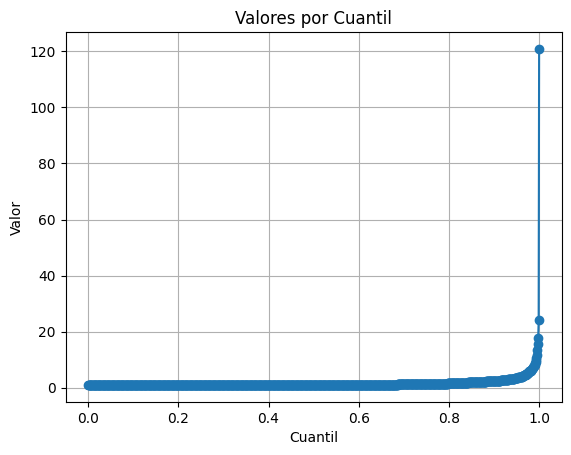

In [63]:
qs = [i/1000 for i in range(0, 1001, 1)]
qvals = data_model['unidad/guia'].quantile(qs)

plt.plot(qvals.index, qvals.values, marker="o")
plt.xlabel("Cuantil")
plt.ylabel("Valor")
plt.title("Valores por Cuantil")
plt.grid(True)
plt.show()

In [64]:
data_model[['guias_prom', 'unidad/guia']].describe()

guias_prom  unidad/guia
count   7261.000000  7261.000000
mean      17.700421     1.542479
std      600.157767     2.253099
min        1.000000     1.000000
25%        1.400000     1.000000
50%        3.142857     1.000000
75%        8.333333     1.326733
max    51025.375000   120.874286

### Z-Score

In [65]:
data_client = data_model[['unidad/guia','guias']].copy()

df_z = pd.DataFrame(ss.fit_transform(X=data_client), index=data_client.index, columns = data_client.columns)

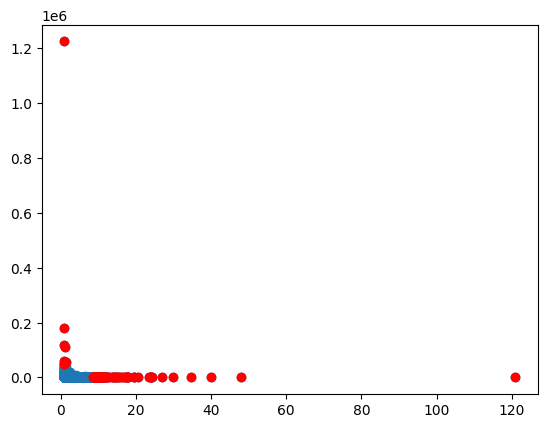

In [66]:
plt.scatter(x=data_client['unidad/guia'], y=data_client['guias'])

df_client_outl = data_client[(df_z['unidad/guia']>3) | (df_z['unidad/guia']<-3) | (df_z['guias']>3) | (df_z['guias']<-3)]

plt.scatter(x=df_client_outl['unidad/guia'], y=df_client_outl['guias'], c='red')

In [67]:
pd.set_option('display.max_rows', None)
len(df_client_outl)

78

In [68]:
pd.reset_option('display.max_rows')

### Isolation Forest

In [69]:
X = data_model.drop(columns = ['id', 'div_cliente', 'unidades', 'guias', 'Registros'])
X = pd.get_dummies(X, drop_first=True)

iso = IsolationForest(contamination='auto', random_state=42)
labels = iso.fit_predict(X)

outliers_iso = data_model[labels == -1]
inliers_iso = data_model[labels == 1]

In [70]:
outliers_iso

id  div_cliente  CPS_A tiempo  CPS_Mayor tiempo no justificado  \
5        6            0          0.00                              1.0   
123    115            1          0.00                              0.0   
289    260            0          0.00                              1.0   
300    269            0          0.00                              0.0   
367    330            0          0.00                              1.0   
493    439            0          0.00                              1.0   
540    483            0          0.00                              0.0   
570    511            1          1.00                              0.0   
584    524            0          0.00                              0.0   
680    610            0          0.00                              1.0   
978    869            0          0.00                              0.0   
1188  1052            0          0.00                              0.0   
1210  1072            0          0.00                              1.0   
1237  1096            0          0.00                              1.0   
1240  1099            0          0.00                              1.0   
1303  1157            0          0.00                              1.0   
1349  1198            0          0.00                              1.0   
1410  1258            0          0.00                              1.0   
1434  1281            0          0.00                              1.0   
1445  1291            0          0.00                              0.0   
1454  1298            0          0.00                              1.0   
1492  1332            0          0.00                              1.0   
1595  1428            0          0.00                              1.0   
1682  1506            0          0.00                              1.0   
1786  1557            1          0.00                              0.0   
1807  1568            2          0.00                              0.0   
2985  2293            4          0.00                              0.0   
3131  2363            0          0.00                              1.0   
3251  2412            2          0.00                              1.0   
3418  2471            7          0.00                              1.0   
4178  2951            1          0.00                              0.5   
4512  3186            0          1.00                              0.0   
4592  3248            1          0.00                              0.0   
5017  3559            1          0.50                              0.0   
5642  4035            0          0.75                              0.0   
5916  4235            0          0.00                              0.5   
6191  4446            1          0.00                              1.0   
6544  4712            0          0.00                              1.0   

      CPS_Oportunidad de entrega  CPS_Oportunidad de mejora  devolucion_No  \
5                            0.0                       0.00            1.0   
123                          1.0                       0.00            1.0   
289                          0.0                       0.00            1.0   
300                          0.0                       1.00            1.0   
367                          0.0                       0.00            1.0   
493                          0.0                       0.00            1.0   
540                          1.0                       0.00            0.5   
570                          0.0                       0.00            1.0   
584                          0.0                       1.00            1.0   
680                          0.0                       0.00            1.0   
978                          0.0                       1.00            1.0   
1188                         0.0                       1.00            1.0   
1210                         0.0                       0.00            1.0   
1237                         

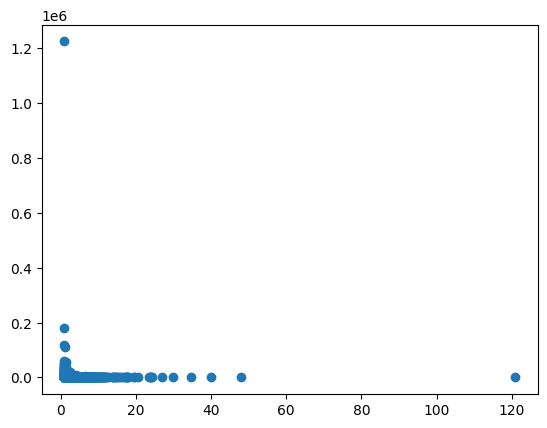

In [71]:
plt.scatter(x=inliers_iso['unidad/guia'], y=inliers_iso['guias'])


### DBSCAN

In [72]:
from sklearn.cluster import DBSCAN

data_dbscan = data_model.drop(columns = ['id', 'div_cliente']).copy()

print(f"Shape of data : {data_dbscan.shape}")
print(f"Type of data : {type(data_dbscan)}")

model = DBSCAN(eps=10, min_samples=2) 

model.fit(data_dbscan)

print(f"Total number of outliers : {sum(model.labels_ == -1)}")

outliers_dbscan = data_model[model.labels_ == -1]
inliers_dbscan = data_model[model.labels_ != -1]

Shape of data : (7261, 54)
Type of data : <class 'pandas.core.frame.DataFrame'>
Total number of outliers : 1237


In [73]:
outliers_dbscan

id  div_cliente  CPS_A tiempo  CPS_Mayor tiempo no justificado  \
3        4            0      0.368421                         0.210526   
14      14            1      0.541667                         0.083333   
25      25            1      0.475000                         0.200000   
26      26            0      0.333333                         0.250000   
29      29            0      0.347826                         0.173913   
...    ...          ...           ...                              ...   
7220  5252           10      0.490909                         0.345455   
7223  5252           13      0.514286                         0.257143   
7235  5264            1      0.400000                         0.200000   
7251  5279            2      0.484848                         0.212121   
7256  5283            0      0.500000                         0.250000   

      CPS_Oportunidad de entrega  CPS_Oportunidad de mejora  devolucion_No  \
3                       0.210526                   0.210526       1.000000   
14                      0.166667                   0.208333       0.625000   
25                      0.200000                   0.125000       0.450000   
26                      0.166667                   0.250000       1.000000   
29                      0.260870                   0.217391       1.000000   
...                          ...                        ...            ...   
7220                    0.109091                   0.054545       0.200000   
7223                    0.185714                   0.042857       0.014286   
7235                    0.200000                   0.200000       1.000000   
7251                    0.181818                   0.121212       0.818182   
7256                    0.125000                   0.125000       1.000000   

      devolucion_Si  Grupo_Producto_Mcia  Grupo_Producto_Mensajeria  ...  \
3          0.000000             0.210526                   0.789474  ...   
14         0.375000             0.000000                   1.000000  ...   
25         0.550000             0.000000                   1.000000  ...   
26         0.000000             0.916667                   0.083333  ...   
29         0.000000             0.217391                   0.782609  ...   
...             ...                  ...                        ...  ...   
7220       0.800000             0.018182                   0.981818  ...   
7223       0.985714             0.000000                   1.000000  ...   
7235       0.000000             0.800000                   0.200000  ...   
7251       0.181818             0.121212                   0.878788  ...   
7256       0.000000             1.000000                   0.000000  ...   

      tipo_cuenta_Acuerdo Semanal  tipo_cuenta_Cuenta Corriente  \
3                             0.0                           0.0   
14                            1.0                           0.0   
25                            1.0                           0.0   
26                            0.0                           0.0   
29                            0.0                           0.0   
...                           ...                           ...   
7220                          0.0                           1.0   
7223                          0.0                           1.0   
7235                          1.0                           0.0   
7251                          1.0                           0.0   
7256                          0.0                           0.0   

      tipo_cuenta_Flete Pago  tipo_cuenta_Flete contra entrega  \
3                   0.315789                          0.684211   
14                  0.000000                          0.000000   
25                  0.000000                          0.000000   
26                  0.000000                          1.000000   
29                  0.217391                          0.782609   
...                      ...                               ...   
72

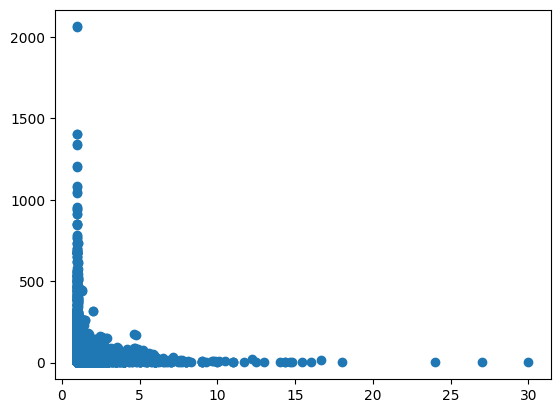

In [74]:
plt.scatter(x=inliers_dbscan['unidad/guia'], y=inliers_dbscan['guias'])


### Intersección

In [75]:
outliers_dbscan.merge(outliers_iso)

Empty DataFrame
Columns: [id, div_cliente, CPS_A tiempo, CPS_Mayor tiempo no justificado, CPS_Oportunidad de entrega, CPS_Oportunidad de mejora, devolucion_No, devolucion_Si, Grupo_Producto_Mcia, Grupo_Producto_Mensajeria, Grupo_Producto_Otro, Producto_Firma de Documentos, Producto_Mensajeria, Producto_Mercancia, Producto_Mercancia Aerea, Producto_Mercancia XL, Producto_Otro, Producto_Paqueteo 3-5 Kl., Producto_Paquetes 1-2 Kl. (ME), Producto_Radicación de Documentos, Sector_Economico_Accesorios femeninos y masculinos ( joyas, correas, gafas, relojes, sombreros), Sector_Economico_Almacen por departamento y centros comerciales, Sector_Economico_Articulos deportivos ( ropa deportiva, aparatos deportivos), Sector_Economico_Confeccion ( fabricacion y comercializacion de prendas), Sector_Economico_Cosmeticos, productos de belleza, uso diario y productos de aseo, Sector_Economico_E-Commerce, Sector_Economico_Entidades de servicios varios ( personal, capacitaciones, asesorias, salud, serv. publicos, serv de aseo, transporte,, Sector_Economico_Envases y empaques, Sector_Economico_Equipos medicos y quirurgicos, Sector_Economico_Ferreteria e insumos para el agro, la construccion y el hogar, Sector_Economico_Laboratorios farmaceuticos, Sector_Economico_Lenceria, decoracion y articulos del hogar ( articulos de cocina, plasticos, canecas, colchones, artesanias), Sector_Economico_Maquinaria y equipo, Sector_Economico_Marroquineria, calzado e insumos de cuero ( bolsos, billeteras, correas), Sector_Economico_Operadores logisticos, Sector_Economico_Otro, Sector_Economico_Papeler¡a, libreria e insumos de oficinas (mercadeo, litografia), Sector_Economico_Productos alimenticios y licores, Sector_Economico_Repuestos, llantas y Autopartes, Sector_Economico_Tecnolog¡a ( computadores, impresoras, camaras, celulares, ipod, etc), Sector_Economico_Telas e insumos de confeccion, RCE_No, RCE_Si, vr_declarado_Alto, vr_declarado_Bajo, vr_declarado_Medio, tipo_cuenta_Acuerdo Semanal, tipo_cuenta_Cuenta Corriente, tipo_cuenta_Flete Pago, tipo_cuenta_Flete contra entrega, tipo_cuenta_Otro, guias, unidades, Registros, unidad/guia, guias_prom]
Index: []

[0 rows x 56 columns]

## Análisis Descriptivo Categórico

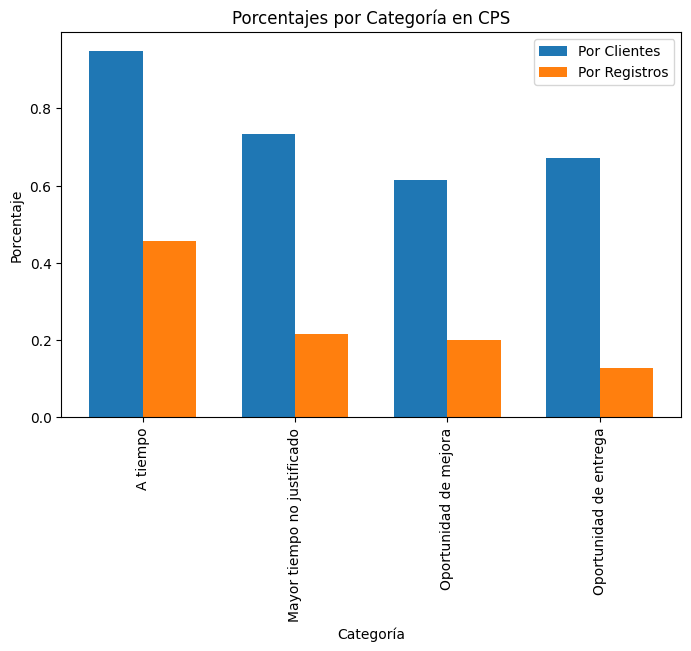

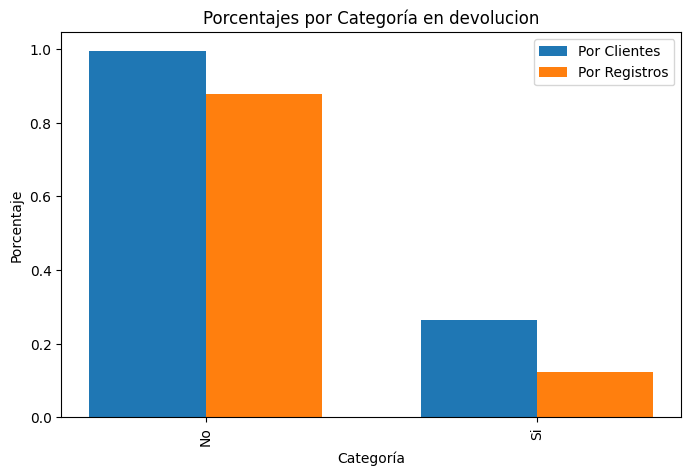

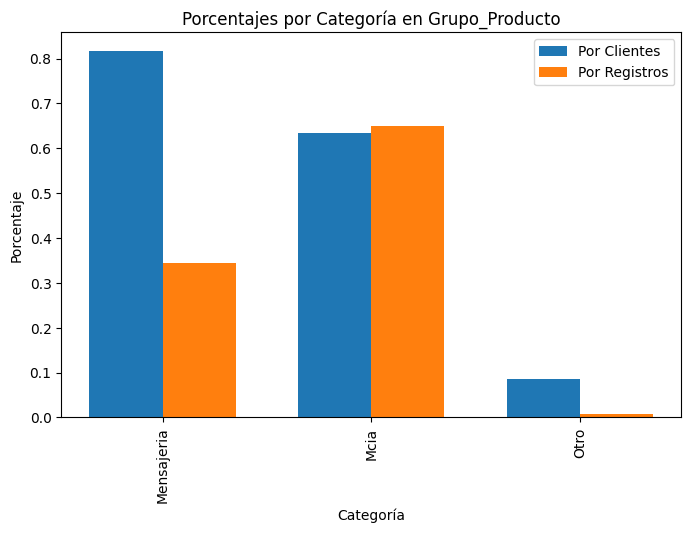

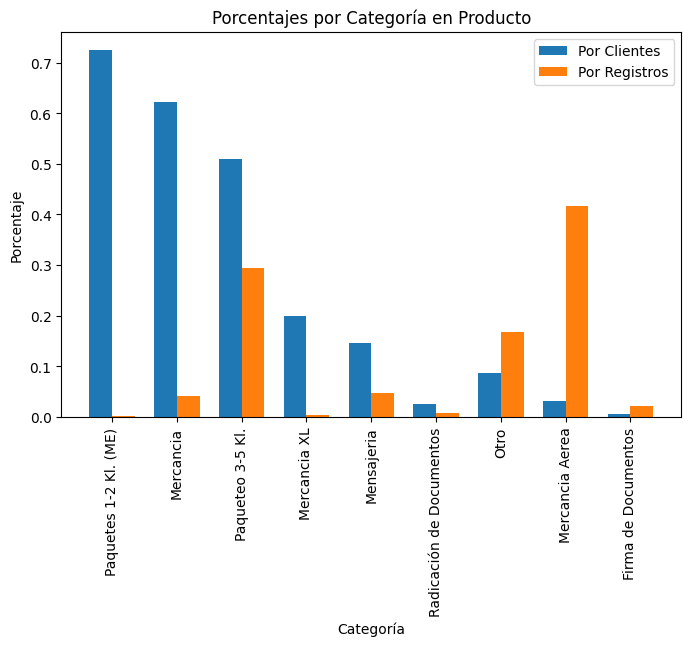

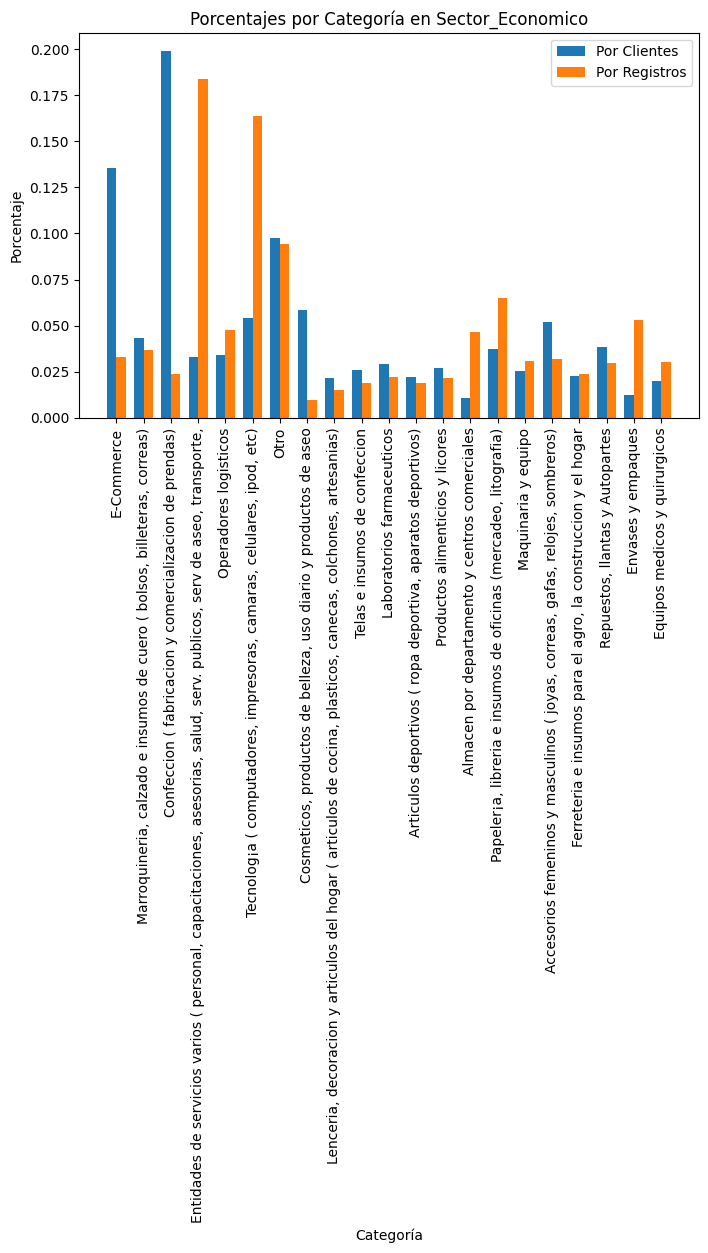

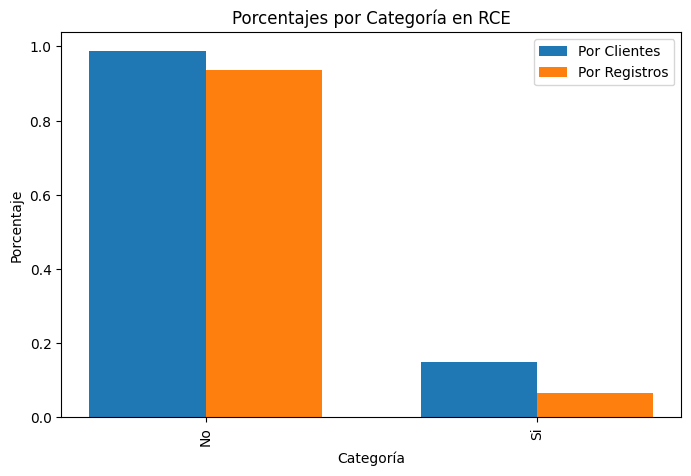

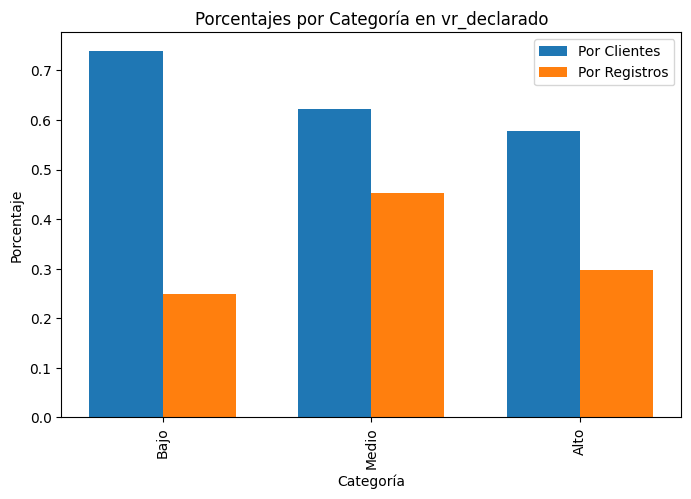

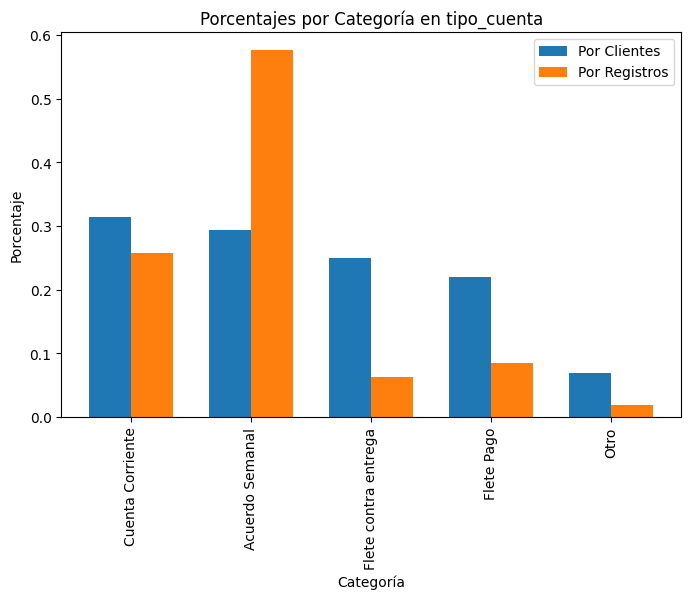

In [76]:
import numpy as np

total_regis = len(data)
total_clients = len(data_model)
for col in columns_cat:
    cats = data[col].unique()
    clients = []
    for cat in cats:
        clients.append(np.sum(data_model[col+'_'+cat]>0))
    clients = np.array(clients)/total_clients
    regis = np.unique(data[col], return_counts=True)[1]/total_regis

    

    x = np.arange(len(cats))    
    width = 0.35
    
    fig, ax = plt.subplots(figsize=(8, 5))

    ax.bar(x - width/2, clients, width, label="Por Clientes")
    ax.bar(x + width/2, regis, width, label="Por Registros")
    
    ax.set_xticks(x)
    ax.set_xticklabels(cats, rotation=90)

    ax.set_xlabel("Categoría")
    ax.set_ylabel("Porcentaje")
    ax.set_title(f'Porcentajes por Categoría en {col}')
    ax.legend()                    
    
    plt.show()


In [77]:
freq = pd.crosstab(
        index=[data['id'], data['div_cliente']],
        columns=data['terminal_origen'],
        normalize='index' 
    )

freq.columns = [f"terminal_{v}" for v in freq.columns]

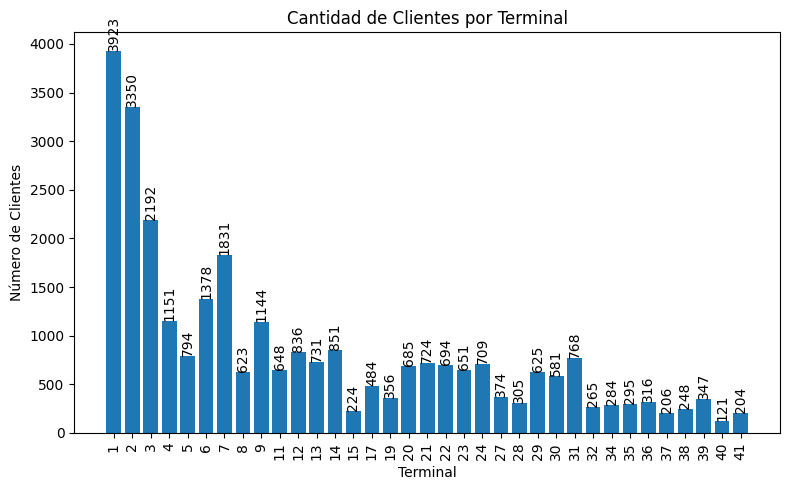

In [78]:
cats = np.sort(data['terminal_origen'].unique()).astype(str)
clients = []
for cat in cats:
    clients.append(np.sum(freq['terminal_'+cat]>0))
    
plt.figure(figsize=(8, 5))
bars = plt.bar(cats, clients)

for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        rotation=90          
    )

plt.xticks(rotation=90)
plt.xlabel("Terminal")
plt.ylabel("Número de Clientes")
plt.title(f'Cantidad de Clientes por Terminal')
plt.tight_layout()
plt.show()



### Regional

In [79]:
regional = pd.read_csv('Regionales.csv', sep=';')


In [80]:
dic_regional = {i:j for i, j in zip(regional['codigo_terminal'], regional['regional'])}

In [81]:
data['terminal_origen'] = data['terminal_origen'].map(dic_regional)

Text(0.5, 1.0, 'Cantidad de Clientes por Región')

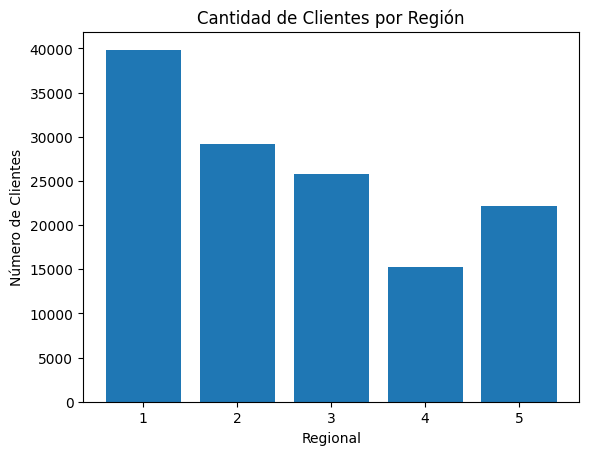

In [82]:
plt.bar(np.unique(data['terminal_origen'], return_counts=True)[0], np.unique(data['terminal_origen'], return_counts=True)[1])

plt.xlabel("Regional")
plt.ylabel("Número de Clientes")
plt.title(f'Cantidad de Clientes por Región')

In [83]:
freq = pd.crosstab(
        index=[data['id'], data['div_cliente']],
        columns=data['terminal_origen'],
        normalize='index' 
    )

freq.columns = [f"regional_origen_{v}" for v in freq.columns]

data_model = data_model.join(freq.reset_index(drop=True))

# Clusterización

In [84]:
import hdbscan
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from statsmodels.stats.multitest import multipletests
from scipy.stats import mannwhitneyu
from matplotlib import colormaps as cmaps


In [85]:
data_clustering = data_model.drop(columns = ['id', 'div_cliente', 'unidades', 'guias', 'Registros']).copy()

data_clustering = data_clustering.loc[:, ~data_clustering.columns.str.contains("Grupo_Producto")]

In [86]:
data_clustering_ss = pd.DataFrame(ss.fit_transform(X=data_clustering), index=data_clustering.index, columns = data_clustering.columns)



In [87]:
def clustering(df, data_model, min_cluster, D=False):
    clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster)
    labels = clusterer.fit_predict(df)

    labels_count = np.unique(labels, return_counts=True)

    clusters = {}
    
    for c in labels_count[0]:
        clusters[c] = data_model[labels==c]


    return labels, clusters

In [90]:
def plot_categories_by_cluster(data_model, columns_cat, cluster_col="cluster", figsize=(10,6)):
    total_clients = len(data_model)


    clusters = np.sort(data_model[cluster_col].unique())

    cmap = cmaps.get_cmap("tab20")
    colors = [cmap(i % cmap.N) for i in range(len(clusters))]

    for col in columns_cat:
        if (data_model.columns.str.startswith(col + "_")).any():
            onehot_cols = [c for c in data_model.columns if c.startswith(col + "_")]
            cats = [c[len(col)+1:] for c in onehot_cols]
            counts = pd.DataFrame(0, index=cats, columns=clusters, dtype=int)
            for oc, cat in zip(onehot_cols, cats):
                s = data_model[data_model[oc] > 0].groupby(cluster_col).size()
                counts.loc[cat, s.index] = s.values
        else:
            cats = list(data_model[col].astype(str).unique())
            counts = pd.DataFrame(0, index=cats, columns=clusters, dtype=int)
            grouped = data_model.groupby([col, cluster_col]).size()
            for (cat, cl), v in grouped.items():
                counts.loc[str(cat), cl] = v

        perc = counts.reindex(index=sorted(counts.index))

        n_cats = len(perc.index)
        n_clusters = len(clusters)
        x = np.arange(n_cats)
        total_width = 0.8
        width = total_width / n_clusters if n_clusters > 0 else total_width

        fig, ax = plt.subplots(figsize=figsize)

        for i, cl in enumerate(clusters):
            offsets = x - total_width/2 + i*width + width/2
            ax.bar(offsets, perc[cl].values, width=width, label=str(cl), color=colors[i], edgecolor="k", linewidth=0.3)

        ax.set_xticks(x)
        ax.set_xticklabels(perc.index, rotation=90)
        ax.set_xlabel("Categoría")
        ax.set_ylabel("Cantidad de clientes")
        ax.set_title(f'Cantidad por Categoría en "{col}" por cluster')
        ax.legend(title="Cluster", bbox_to_anchor=(1.01, 1), loc="upper left")
        ax.set_ylim(0, perc.values.max()*1.15 if perc.values.max()>0 else 1)

        plt.tight_layout()
        plt.show()


        


In [91]:
def _cliff_delta(x, y):
    x = np.asarray(x)
    y = np.asarray(y)
    n1 = len(x)
    n2 = len(y)
    if n1 == 0 or n2 == 0:
        return np.nan
    y_sorted = np.sort(y)
    n_greater = 0
    n_less = 0
    for xi in x:
        less = np.searchsorted(y_sorted, xi, side='left')
        greater = n2 - np.searchsorted(y_sorted, xi, side='right')
        n_greater += less
        n_less += greater
    return (n_greater - n_less) / (n1 * n2)

def mann_whitney_by_cluster(df, cluster_col, c1, c2, alpha=0.05):
    g1 = df[df[cluster_col] == c1]
    g2 = df[df[cluster_col] == c2]

    variables = df.select_dtypes(include=[np.number]).columns
    variables = [v for v in variables if v != cluster_col]

    results = []

    for var in variables:
        x = g1[var].dropna()
        y = g2[var].dropna()

        if x.nunique() <= 1 and y.nunique() <= 1:
            results.append((var, np.nan, np.nan))
            continue

        stat, p = mannwhitneyu(x, y, alternative="two-sided")
        cliff = _cliff_delta(x, y)
        results.append((var, p, cliff))

    res = pd.DataFrame(results, columns=["variable", "pvalue", "cliff_delta"])

    mask = res["pvalue"].notnull()
    res["pvalue_adj"] = np.nan
    res["significant"] = False
    if mask.any():
        pvals = res.loc[mask, "pvalue"].astype(float).values
        reject, pvals_adj, _, _ = multipletests(pvals, alpha=alpha, method="fdr_bh")
        res.loc[mask, "pvalue_adj"] = pvals_adj
        res.loc[mask, "significant"] = reject.astype(bool)

    return res.sort_values("pvalue"), res[res["significant"]]

In [92]:
def summary_dif(df, variables, cluster1, cluster2, list_cluster=False):
    variables.append('cluster')
    df_summary = df.loc[df['cluster'].isin([cluster1, cluster2]), variables]

    for v in variables:
        if v!='cluster':
            if list_cluster:
                list_cluster.append(cluster1)
                list_cluster.append(cluster2)
                df[(df['cluster'].isin(list_cluster))].boxplot(column=v, by="cluster", figsize=(10,6))
            else:
                df[(df['cluster'].isin([cluster1, cluster2]))].boxplot(column=v, by="cluster", figsize=(10,6))

    return df_summary.groupby('cluster').describe()

In [93]:
columns_cat_cluster = columns_cat.copy()

columns_cat_cluster.remove('Grupo_Producto')

columns_cat_cluster.append('regional_origen')

## 1. Con Productos diferentes de Mensajería y Mercancía

In [94]:
labels2, clusters_se = clustering(data_clustering_ss.loc[:, ~data_clustering_ss.columns.str.contains("Sector_Economico")], data_model, 40)

In [95]:
keys, values = np.unique(labels2, return_counts=True)
{i:j for i, j in zip(keys, values)}

{-1: 1211, 0: 5764, 1: 54, 2: 51, 3: 70, 4: 111}

In [96]:
df_hdbscan2 = data_clustering.copy()
df_hdbscan2['cluster'] = labels2

<Axes: title={'center': 'guias_prom'}, xlabel='cluster'>

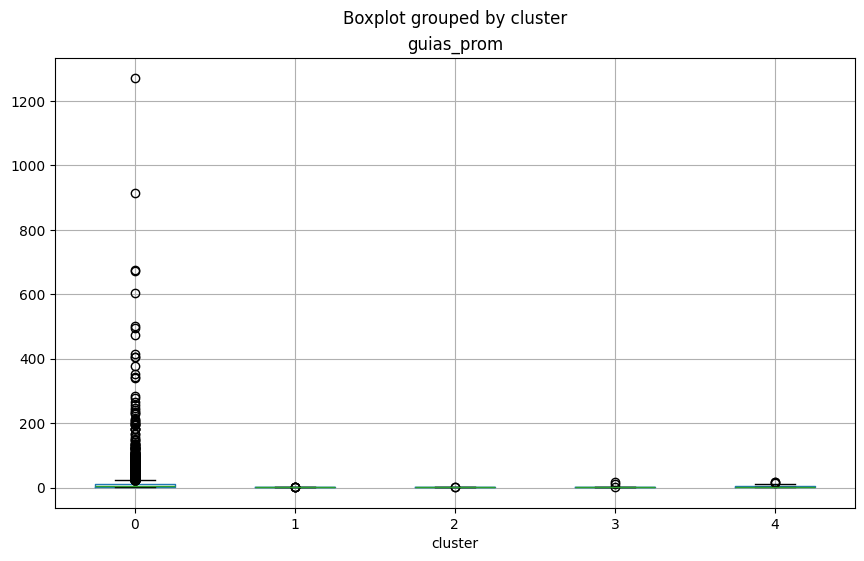

In [98]:
df_hdbscan2[df_hdbscan2['cluster']!=-1].boxplot(column="guias_prom", by="cluster", figsize=(10,6))


<Axes: title={'center': 'unidad/guia'}, xlabel='cluster'>

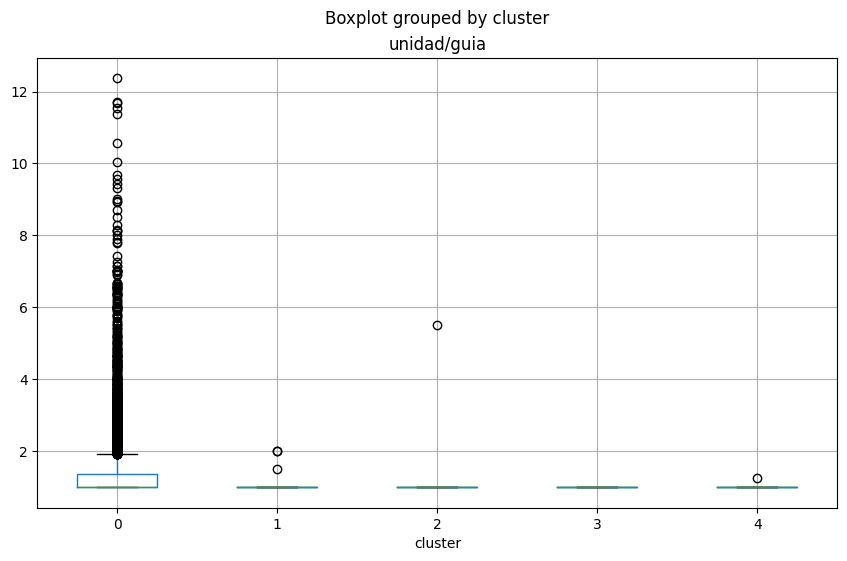

In [99]:
df_hdbscan2[df_hdbscan2['cluster']!=-1].boxplot(column="unidad/guia", by="cluster", figsize=(10,6))


In [100]:
data['regional_origen'] = data['terminal_origen']

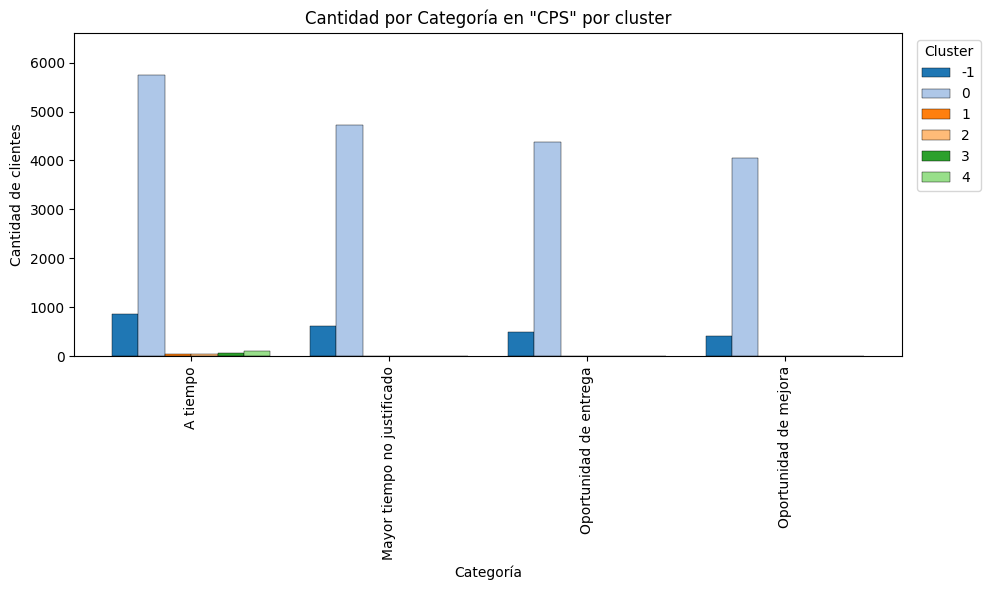

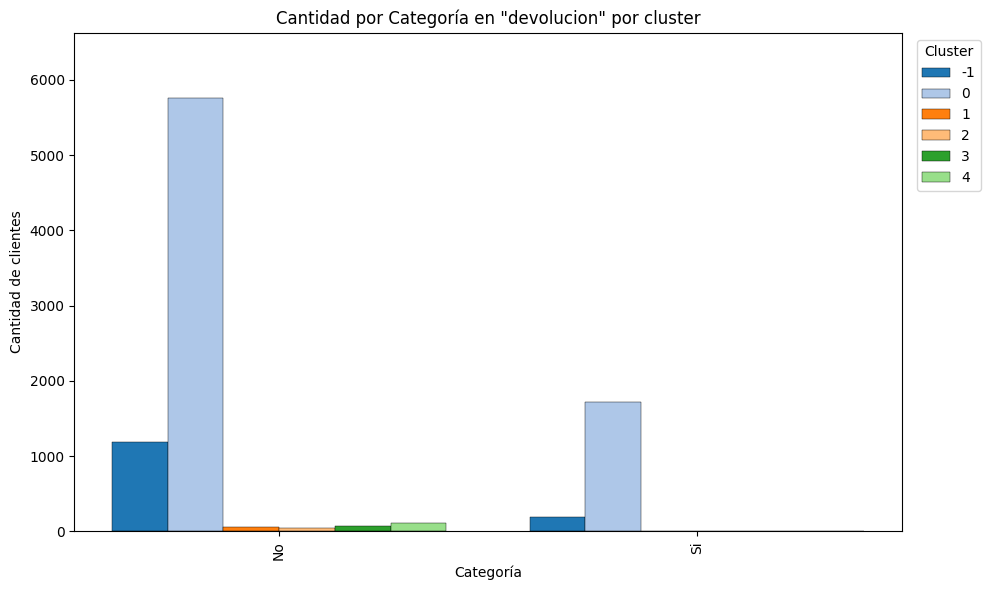

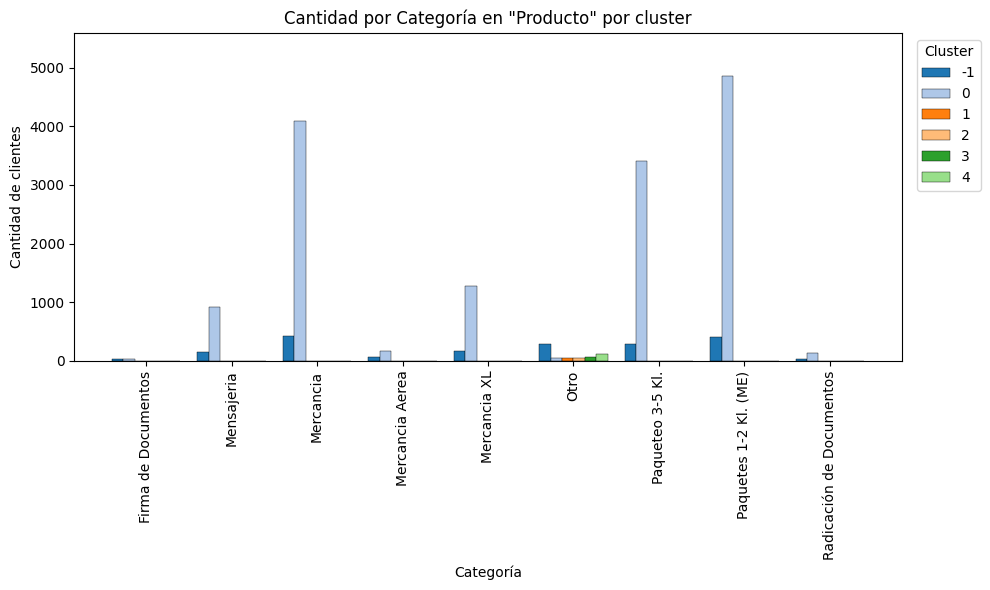

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8520\3095729617.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


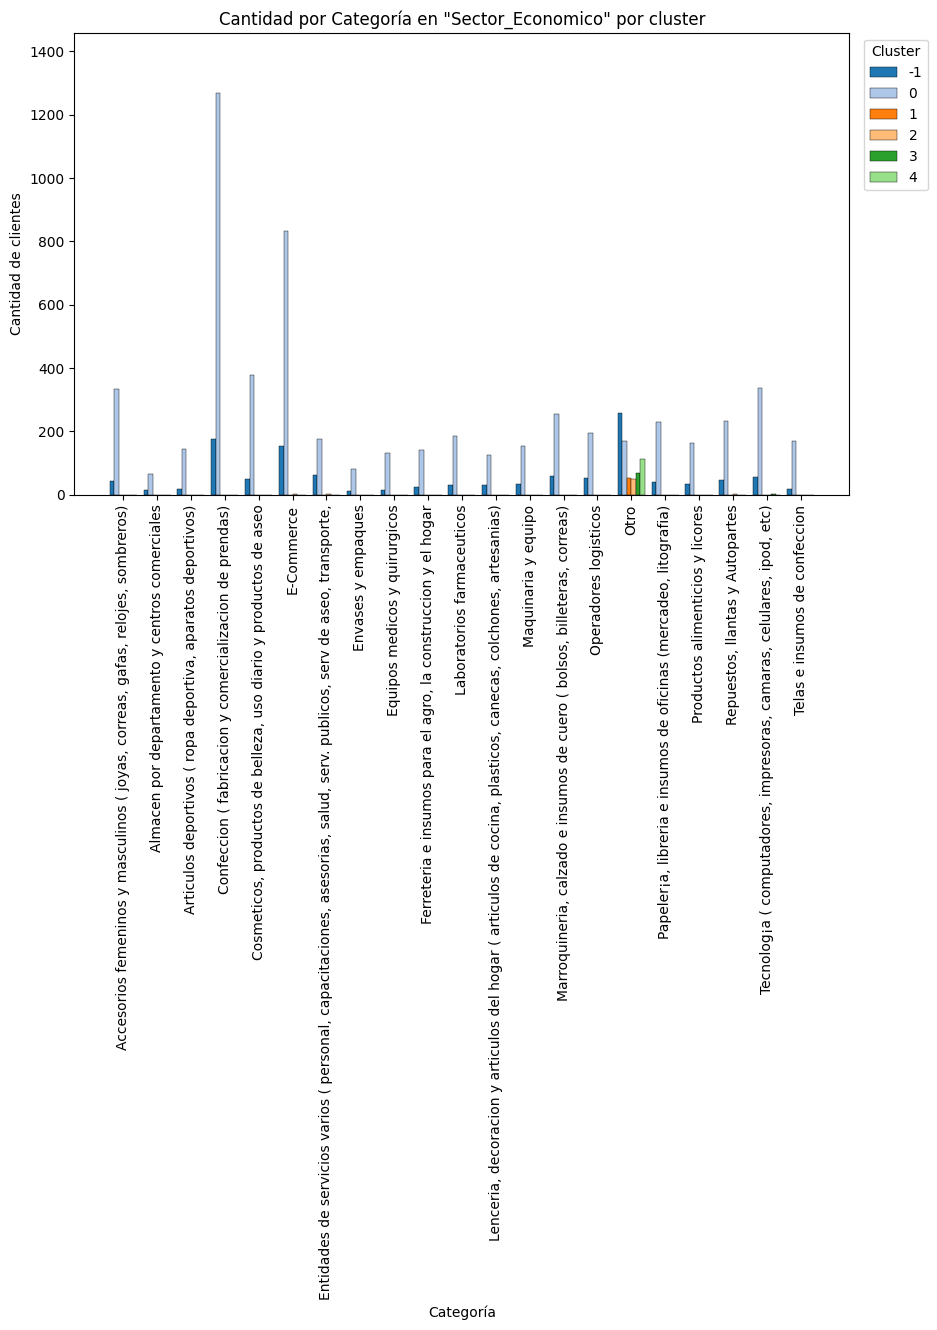

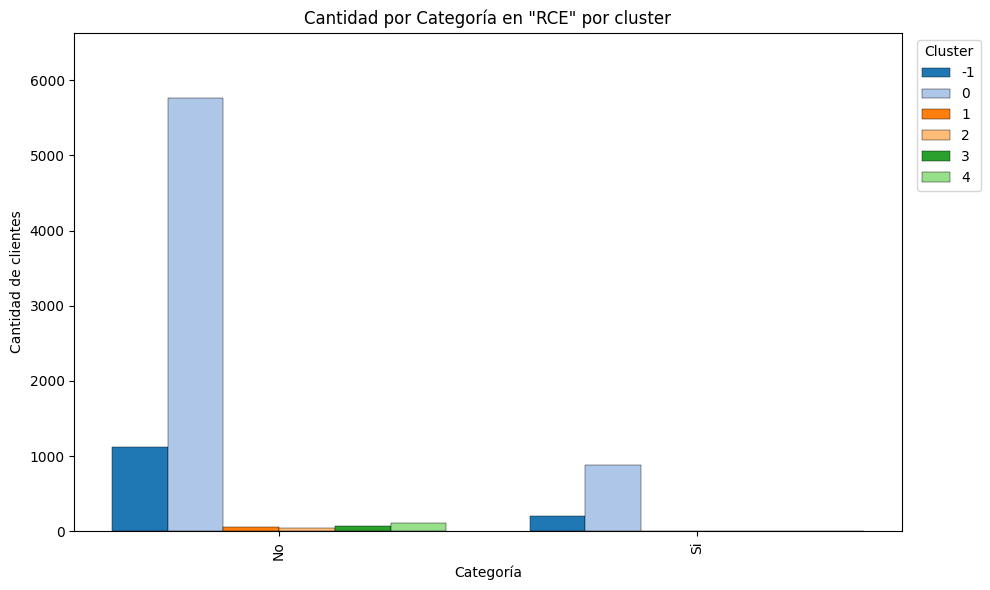

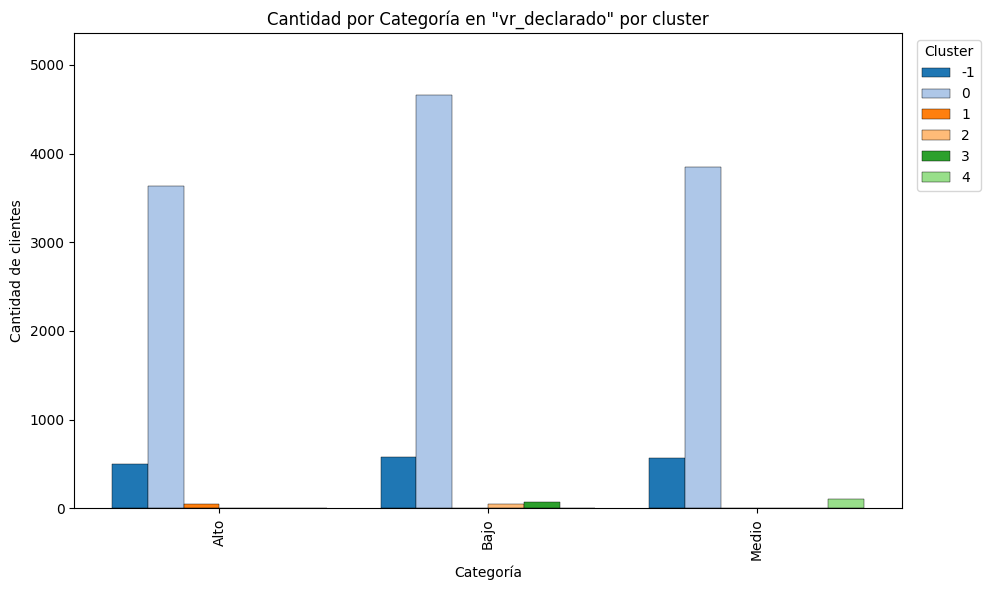

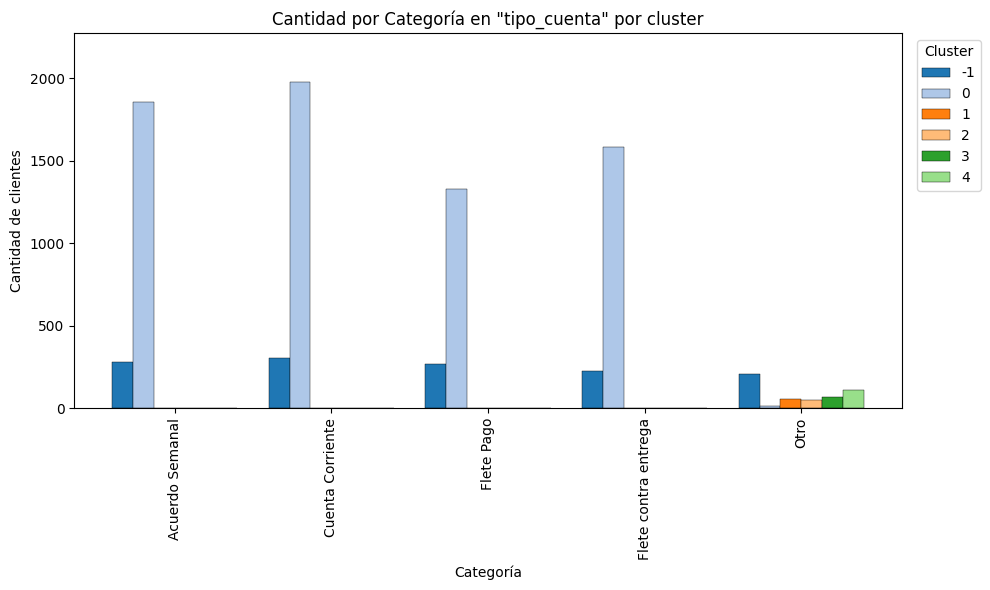

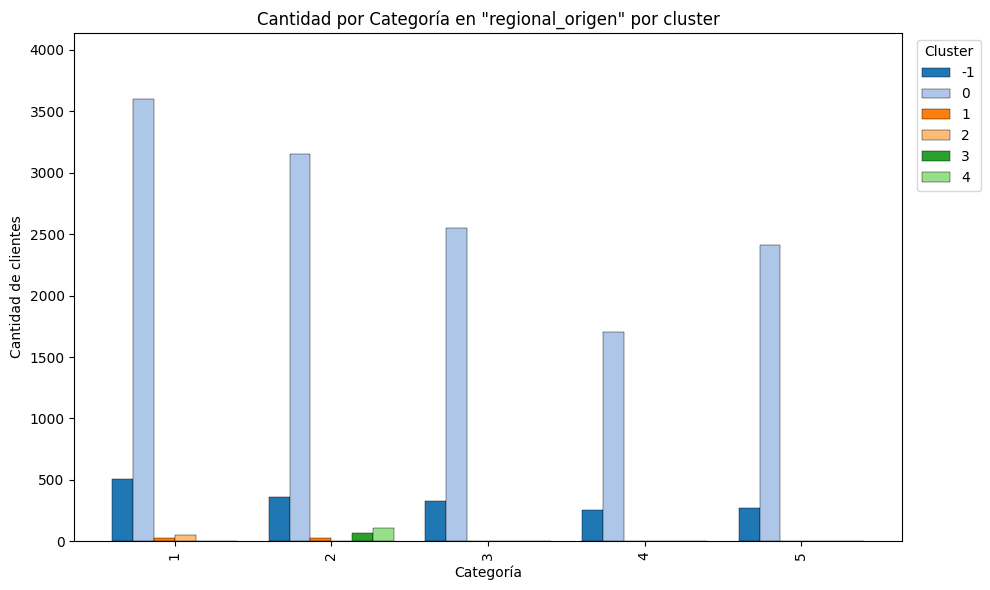

In [101]:
plot_categories_by_cluster(df_hdbscan2, columns_cat_cluster)

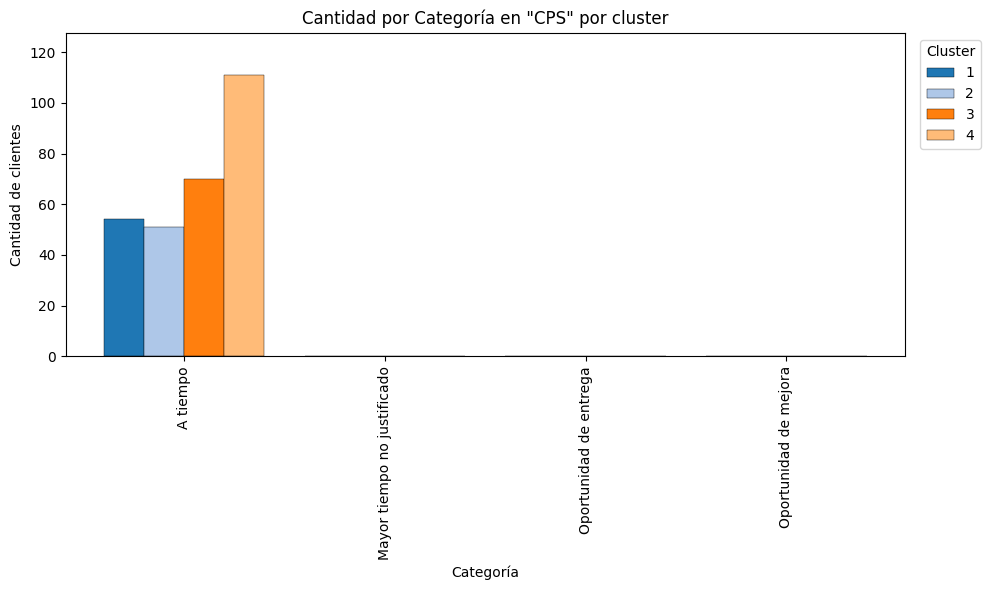

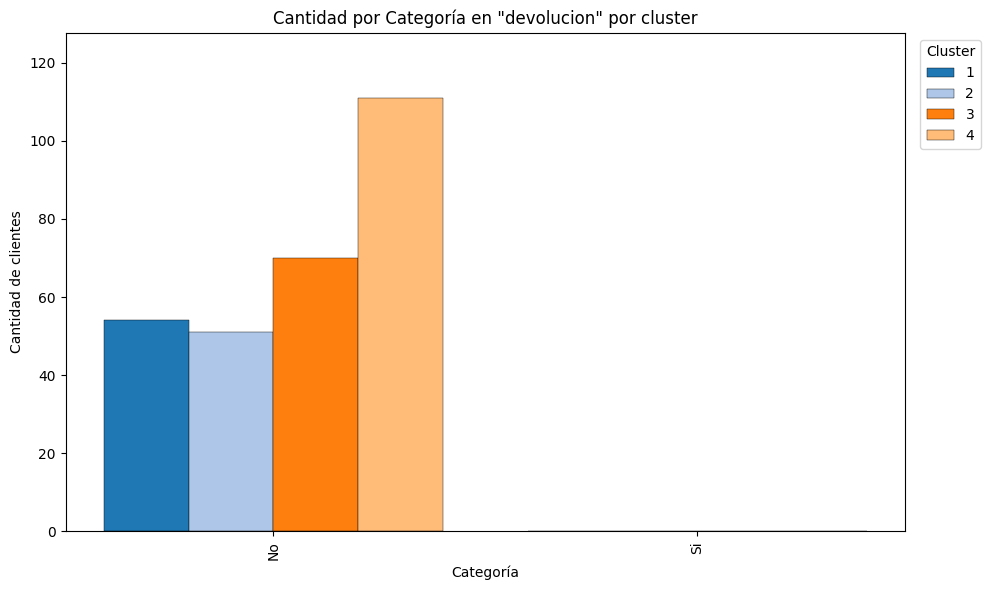

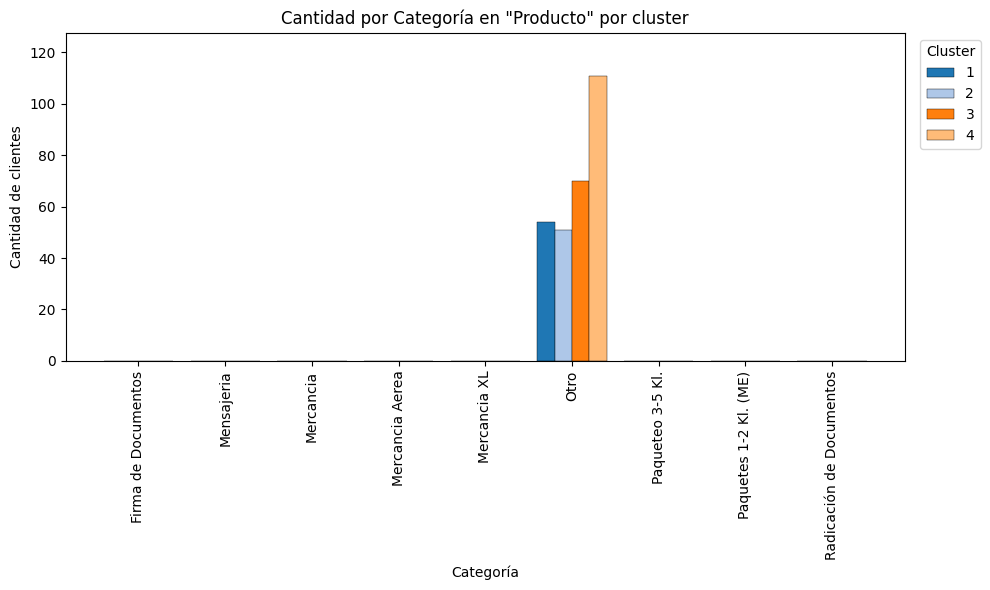

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8520\3095729617.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


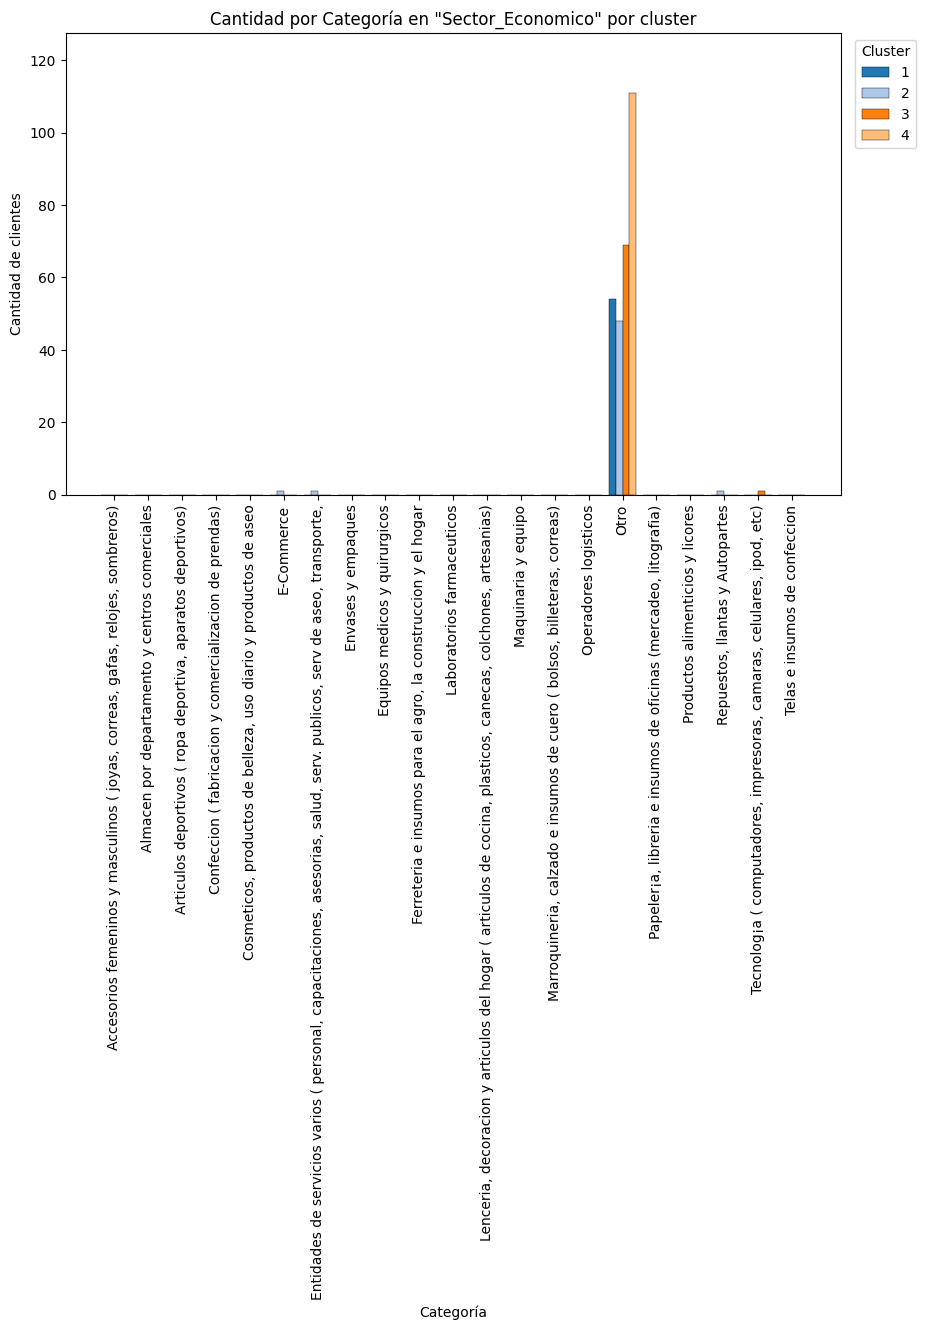

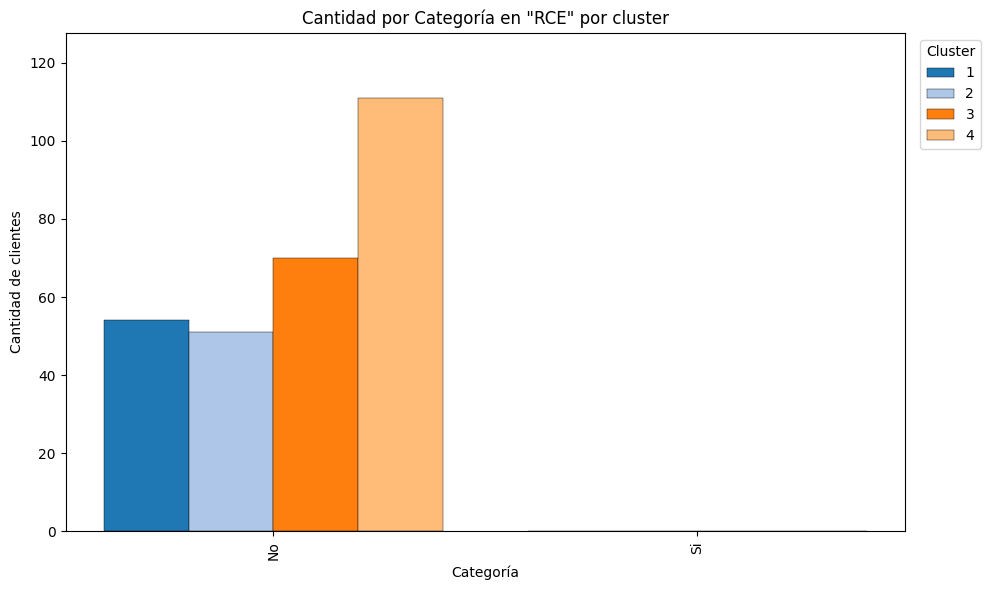

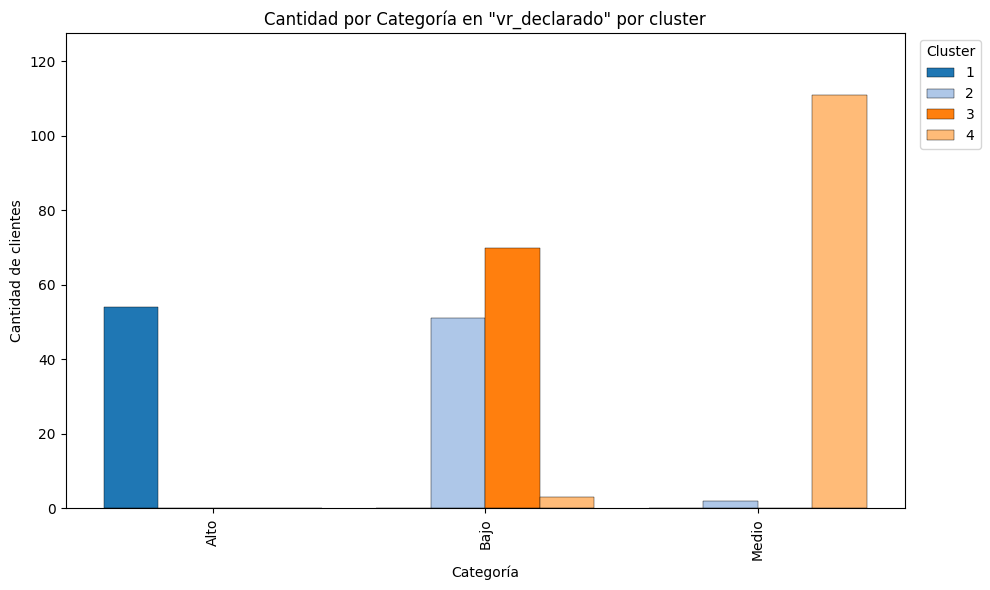

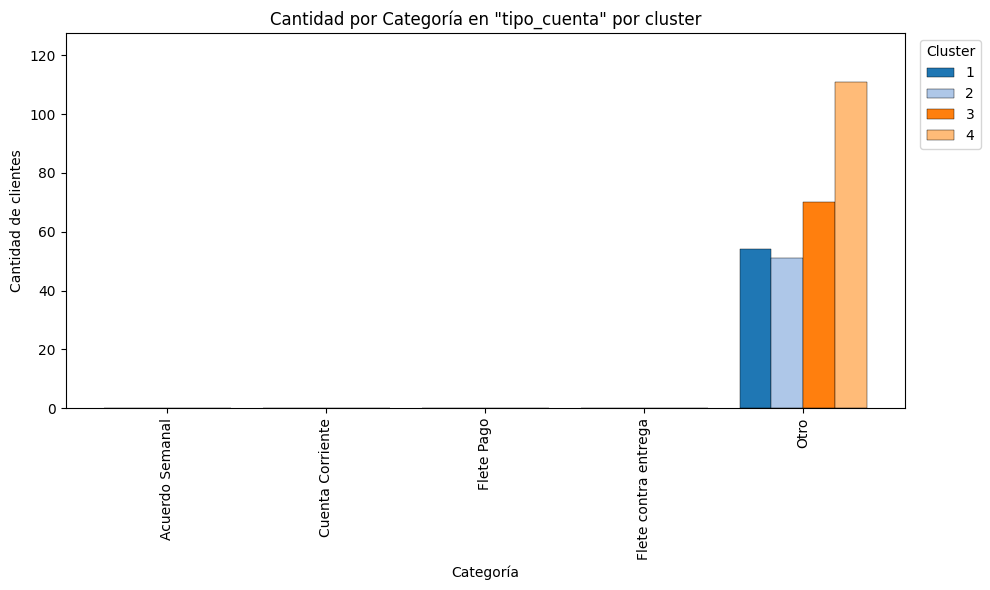

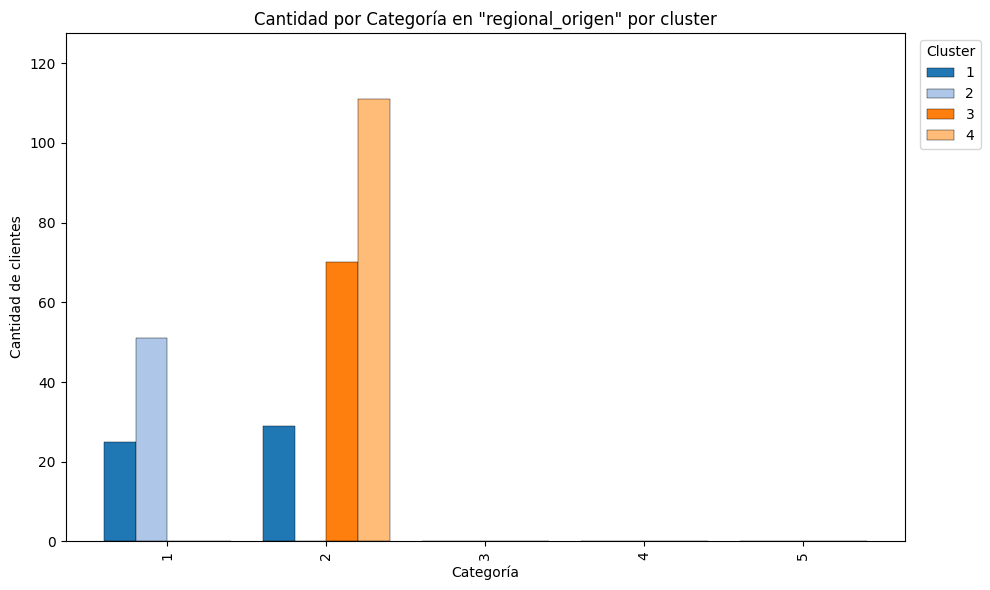

In [102]:
plot_categories_by_cluster(df_hdbscan2[df_hdbscan2['cluster']>=1], columns_cat_cluster)

## Análisis Descriptivo

In [103]:
data_sector_otro = data_model[data_model['Sector_Economico_Otro']==1]


In [104]:
data_sector_prod_otro = data_sector_otro.loc[:, (data_sector_otro.columns.str.contains('Producto')) & (~data_sector_otro.columns.str.contains('Grupo_Producto'))]

In [105]:
len(data_sector_otro)

708

In [106]:
print(f'Cantidad de clientes en sector económico y producto minoritario: {len(data_sector_prod_otro[data_sector_prod_otro["Producto_Otro"]==1])}')

Cantidad de clientes en sector económico y producto minoritario: 511


In [107]:
data_sector_prod_otro.mean()

Producto_Firma de Documentos                         0.002397
Producto_Mensajeria                                  0.018248
Producto_Mercancia                                   0.105591
Producto_Mercancia Aerea                             0.001176
Producto_Mercancia XL                                0.019600
Producto_Otro                                        0.728920
Producto_Paqueteo 3-5 Kl.                            0.035475
Producto_Paquetes 1-2 Kl. (ME)                       0.083642
Producto_Radicación de Documentos                    0.004952
Sector_Economico_Productos alimenticios y licores    0.000000
dtype: float64

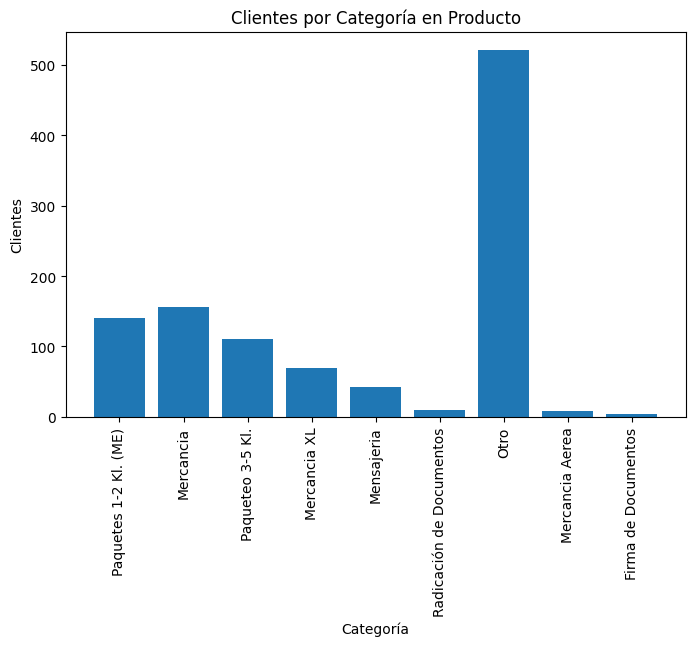

In [108]:
cats = data['Producto'].unique()
clients = []
for cat in cats:
    clients.append(np.sum(data_sector_otro['Producto_'+cat]>0))
    


    

x = np.arange(len(cats))    
    
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x, clients)
    
ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=90)

ax.set_xlabel("Categoría")
ax.set_ylabel("Clientes")
ax.set_title(f'Clientes por Categoría en Producto')
    
plt.show()


In [109]:
data_sector_cuenta_otro = data_sector_otro.loc[:, (data_sector_otro.columns.str.contains('tipo_cuenta'))]

In [110]:
print(f'Cantidad de clientes en sector económico y tipo cuenta minoritarios: {len(data_sector_cuenta_otro[data_sector_cuenta_otro["tipo_cuenta_Otro"]==1])}')

Cantidad de clientes en sector económico y tipo cuenta minoritarios: 469


In [111]:
data_sector_cuenta_otro.mean()

tipo_cuenta_Acuerdo Semanal         0.091808
tipo_cuenta_Cuenta Corriente        0.170904
tipo_cuenta_Flete Pago              0.026007
tipo_cuenta_Flete contra entrega    0.048852
tipo_cuenta_Otro                    0.662429
dtype: float64

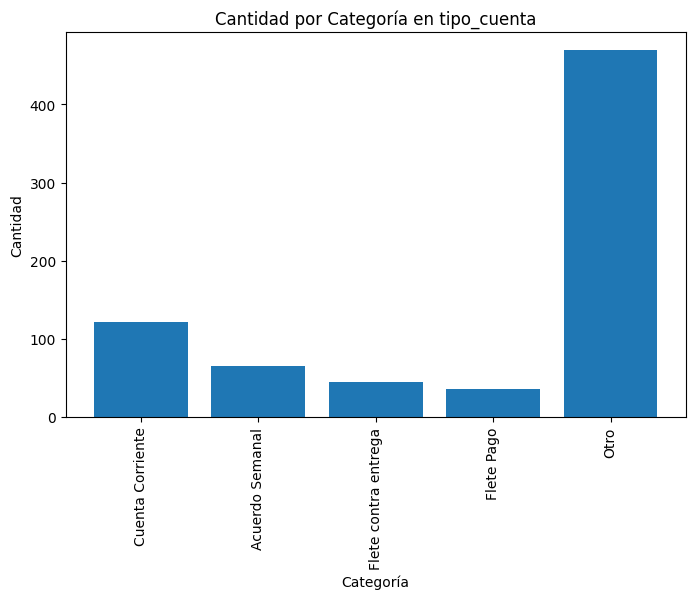

In [112]:
cats = data['tipo_cuenta'].unique()
clients = []
for cat in cats:
    clients.append(np.sum(data_sector_otro['tipo_cuenta_'+cat]>0))
    


    

x = np.arange(len(cats))    
    
fig, ax = plt.subplots(figsize=(8, 5))

ax.bar(x, clients)
    
ax.set_xticks(x)
ax.set_xticklabels(cats, rotation=90)

ax.set_xlabel("Categoría")
ax.set_ylabel("Cantidad")
ax.set_title(f'Cantidad por Categoría en tipo_cuenta')
    
plt.show()


## 2. 400 Clientes Principales

In [114]:
data_clustering = data_clustering[(data_clustering['unidad/guia']<120) & (data_clustering['guias_prom']<50000)]

In [115]:
unidad_prom = data_clustering['unidad/guia']*data_clustering['guias_prom']

Text(0.5, 0, 'Guías Promedio')

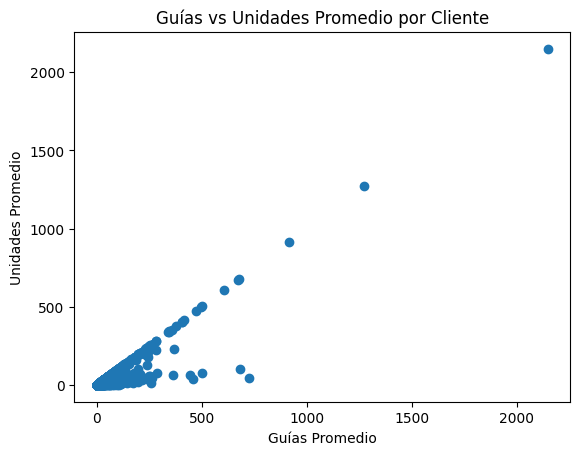

In [116]:
plt.scatter(unidad_prom, data_clustering['guias_prom'])

plt.title('Guías vs Unidades Promedio por Cliente')
plt.ylabel('Unidades Promedio')
plt.xlabel('Guías Promedio')

In [117]:
np.sum(unidad_prom > 50)

383

In [118]:
index_unidad = unidad_prom.sort_values(ascending=False).index

In [119]:
data_clustering_ss = data_clustering_ss[data_clustering_ss.columns[~data_clustering_ss.columns.str.contains('Sector_Economico')]]

In [120]:
datamodel400 = data_clustering.loc[index_unidad[:400]]


In [121]:
top400 = data_clustering_ss.iloc[datamodel400.index]

top400 = top400.drop(columns=['devolucion_Si', 'vr_declarado_Medio', 'regional_origen_5', 'tipo_cuenta_Otro'])

In [213]:
Z_400 = linkage(top400, method='ward')

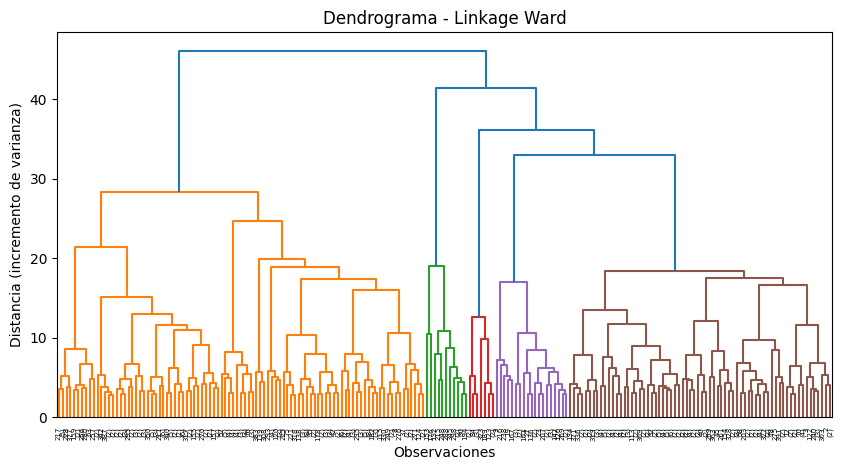

In [214]:
plt.figure(figsize=(10, 5))
dendrogram(Z_400, truncate_mode='lastp', p=200)
plt.title("Dendrograma - Linkage Ward")
plt.xlabel("Observaciones")
plt.ylabel("Distancia (incremento de varianza)")
plt.show()


In [215]:
ward_400 = AgglomerativeClustering(n_clusters=5, linkage='ward')

In [217]:
labels_400 = ward_400.fit_predict(top400)

In [219]:
np.unique(labels_400, return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([210, 140,  12,  11,  27], dtype=int64))

In [220]:
silhouette_score(top400, labels_400)

0.15113785927252077

#### Análisis de Componentes Principales

In [221]:
pca_400 = PCA(n_components=2)
X_pca_400 = pca_400.fit_transform(top400)


In [222]:
pca_400.explained_variance_ratio_.sum()

0.3414354958630562

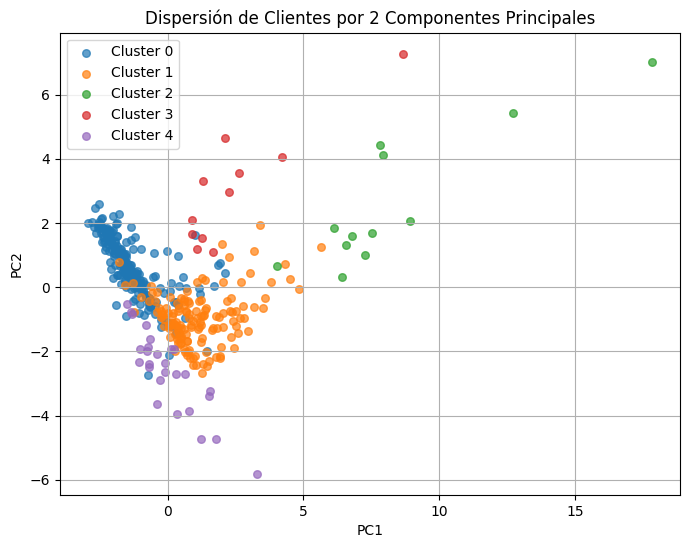

In [223]:
plt.figure(figsize=(8, 6))

for c in np.unique(labels_400):
    mask = labels_400 == c
    plt.scatter(
        X_pca_400[mask, 0],
        X_pca_400[mask, 1],
        s=30,
        alpha=0.7,
        label=f"Cluster {c}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dispersión de Clientes por 2 Componentes Principales")
plt.legend()
plt.grid(True)
plt.show()


In [225]:
loadings_400 = pd.DataFrame(
    pca_400.components_.T,
    index=top400.columns,
    columns=["PC1", "PC2"]
)

In [226]:
loadings_400['PC1'].sort_values(ascending=False)

unidad/guia                          0.798781
Producto_Mercancia                   0.297528
vr_declarado_Alto                    0.252204
devolucion_No                        0.166212
Producto_Radicación de Documentos    0.110078
Producto_Mercancia XL                0.093420
tipo_cuenta_Cuenta Corriente         0.082140
RCE_No                               0.069050
CPS_Oportunidad de entrega           0.050477
regional_origen_3                    0.042401
tipo_cuenta_Flete Pago               0.023232
Producto_Otro                        0.014407
tipo_cuenta_Flete contra entrega     0.006540
regional_origen_2                    0.004142
Producto_Mercancia Aerea             0.003584
Producto_Firma de Documentos         0.001206
CPS_Mayor tiempo no justificado     -0.000419
Producto_Mensajeria                 -0.006428
guias_prom                          -0.018931
CPS_Oportunidad de mejora           -0.019413
CPS_A tiempo                        -0.021179
regional_origen_4                 

In [227]:
loadings_400['PC2'].sort_values(ascending=False)

unidad/guia                          0.453421
vr_declarado_Bajo                    0.326418
Producto_Paquetes 1-2 Kl. (ME)       0.325920
Producto_Radicación de Documentos    0.294432
tipo_cuenta_Acuerdo Semanal          0.098472
regional_origen_4                    0.080526
RCE_Si                               0.061077
tipo_cuenta_Flete Pago               0.044205
CPS_Oportunidad de entrega           0.042424
Producto_Otro                        0.024382
CPS_Mayor tiempo no justificado      0.000492
Producto_Firma de Documentos        -0.001863
Producto_Mensajeria                 -0.002675
regional_origen_1                   -0.003443
CPS_A tiempo                        -0.004810
tipo_cuenta_Flete contra entrega    -0.005712
guias_prom                          -0.021333
regional_origen_3                   -0.024913
regional_origen_2                   -0.038803
CPS_Oportunidad de mejora           -0.042982
RCE_No                              -0.061077
Producto_Paqueteo 3-5 Kl.         

#### Análisis de Estadística Descriptiva por Variable

In [228]:
data_top400 = data_clustering.iloc[top400.index]

data_top400['cluster'] = labels_400

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8520\3925712711.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_top400['cluster'] = labels_400


In [229]:
mean_top400 = data_top400.groupby('cluster').mean()

In [230]:
mean_top400[(loadings_400['PC1'].sort_values(ascending=False).index[:4].tolist() 
             + loadings_400['PC1'].sort_values(ascending=False).index[-4:].tolist())].style.format("{:.2f}")

In [231]:
mean_top400[(loadings_400['PC2'].sort_values(ascending=False).index[:4].tolist() 
             + loadings_400['PC2'].sort_values(ascending=False).index[-4:].tolist())].style.format("{:.2f}")

In [232]:
columns_ssc = columns_cat_cluster.copy()

columns_ssc.remove('Sector_Economico')

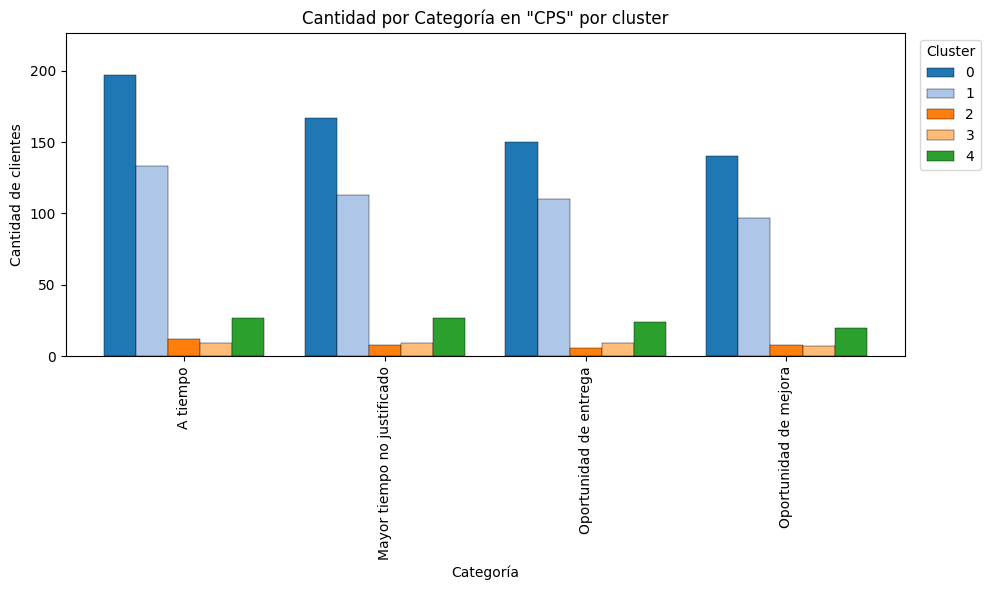

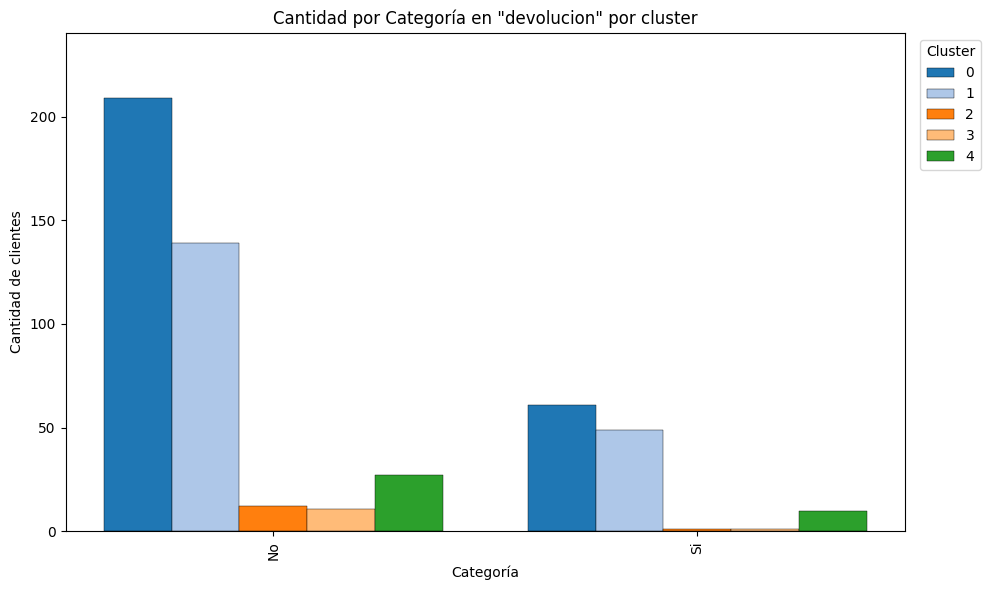

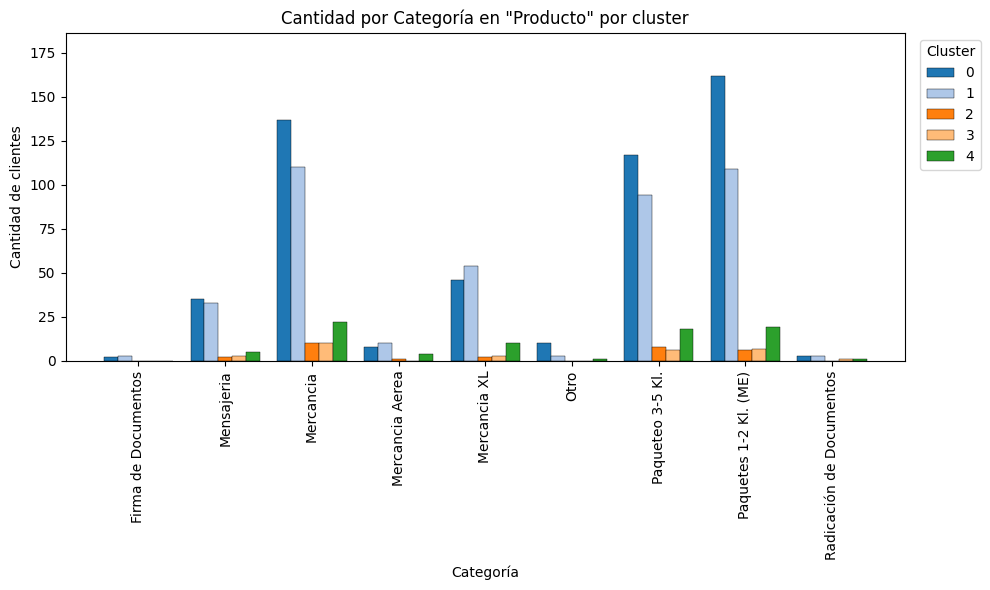

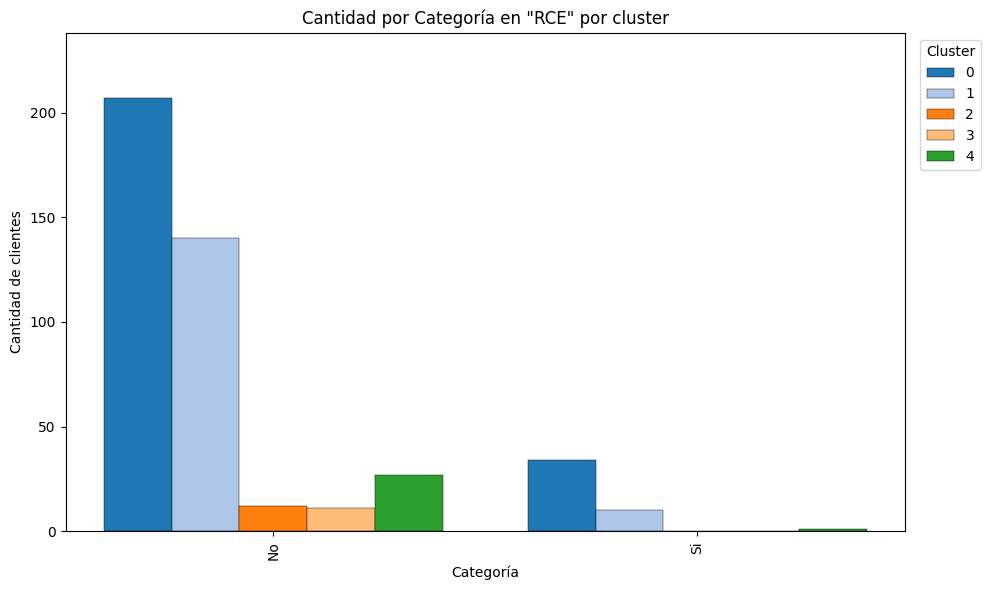

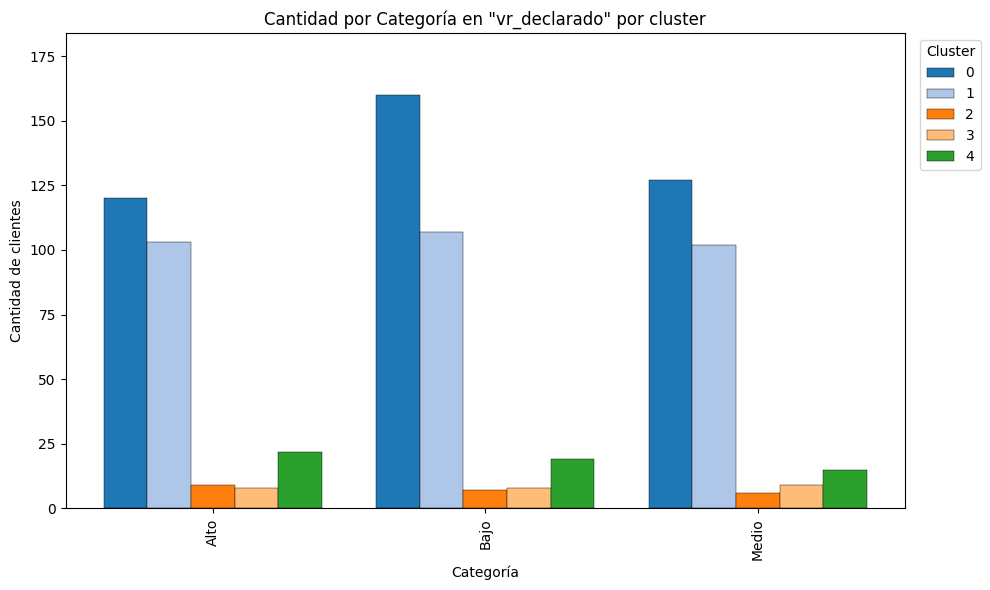

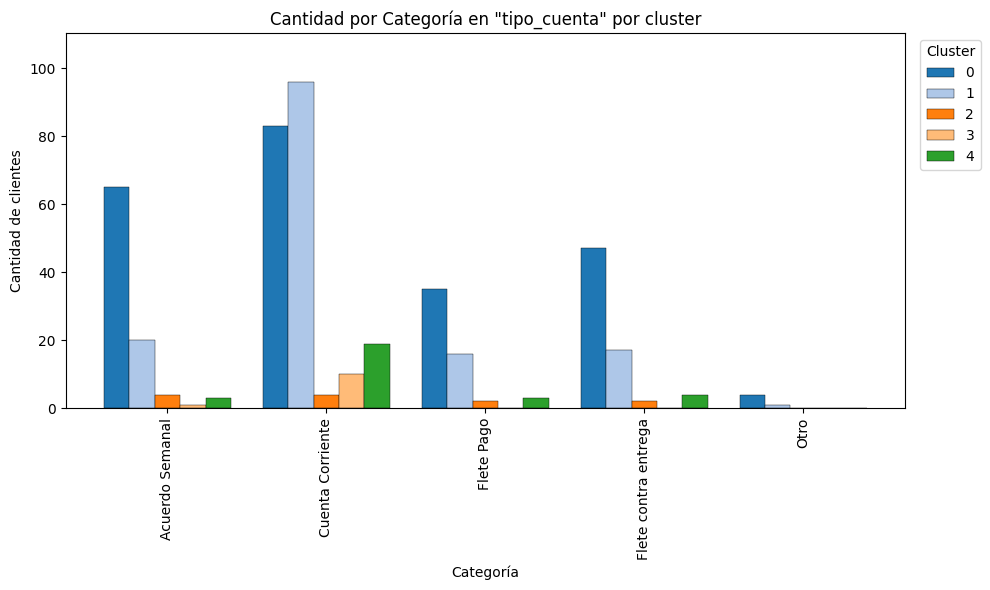

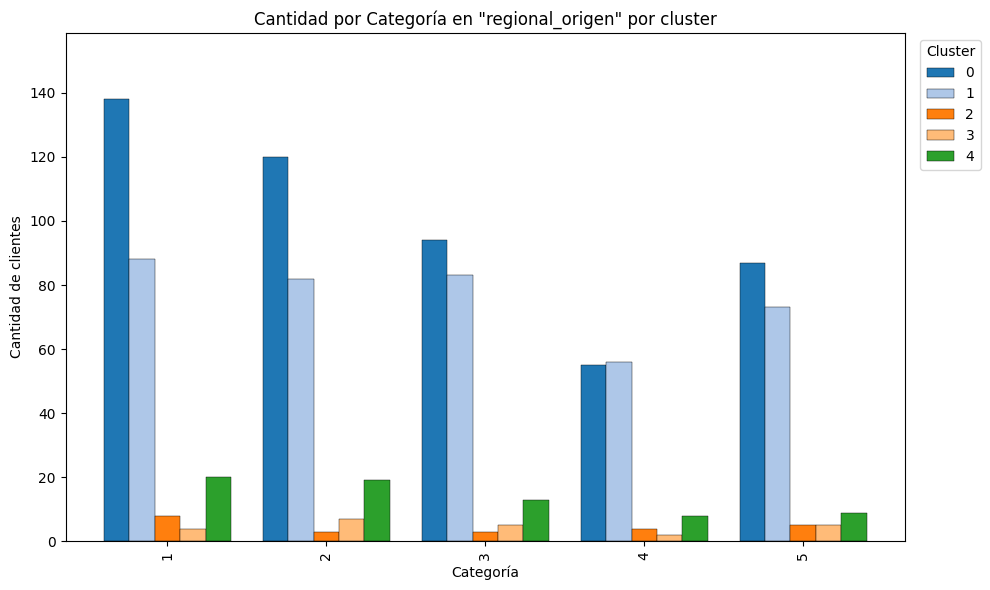

In [233]:
plot_categories_by_cluster(data_top400, columns_ssc)

In [234]:
all_results, significant = mann_whitney_by_cluster(
    data_top400,
    cluster_col="cluster",
    c1=0,
    c2=1
)

significant

variable        pvalue  cliff_delta  pvalue_adj  \
10           Producto_Mercancia XL  1.249105e-03    -0.162347    0.016551   
13  Producto_Paquetes 1-2 Kl. (ME)  3.227553e-03     0.184490    0.034212   
41     tipo_cuenta_Acuerdo Semanal  3.759307e-04     0.166667    0.009962   
42    tipo_cuenta_Cuenta Corriente  1.454963e-07    -0.287653    0.000008   
46                     unidad/guia  6.825751e-04    -0.204592    0.012059   

    significant  
10         True  
13         True  
41         True  
42         True  
46         True

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


tipo_cuenta_Cuenta Corriente                                          \
                               count      mean       std  min  25%  50%  75%   
cluster                                                                        
0                              210.0  0.395238  0.490070  0.0  0.0  0.0  1.0   
1                              140.0  0.678968  0.468146  0.0  0.0  1.0  1.0   

             tipo_cuenta_Acuerdo Semanal            ...  \
         max                       count      mean  ...   
cluster                                             ...   
0        1.0                       210.0  0.309524  ...   
1        1.0                       140.0  0.142857  ...   

        Sector_Economico_Tecnolog¡a ( computadores, impresoras, camaras, celulares, ipod, etc)  \
                                                                                           75%   
cluster                                                                                          
0                                                      0.0                                       
1                                                      0.0                                       

             Sector_Economico_Operadores logisticos                           \
         max                                  count      mean       std  min   
cluster                                                                        
0        1.0                                  210.0  0.042857  0.203019  0.0   
1        1.0                                  140.0  0.042857  0.203262  0.0   

                             
         25%  50%  75%  max  
cluster                      
0        0.0  0.0  0.0  1.0  
1        0.0  0.0  0.0  1.0  

[2 rows x 424 columns]

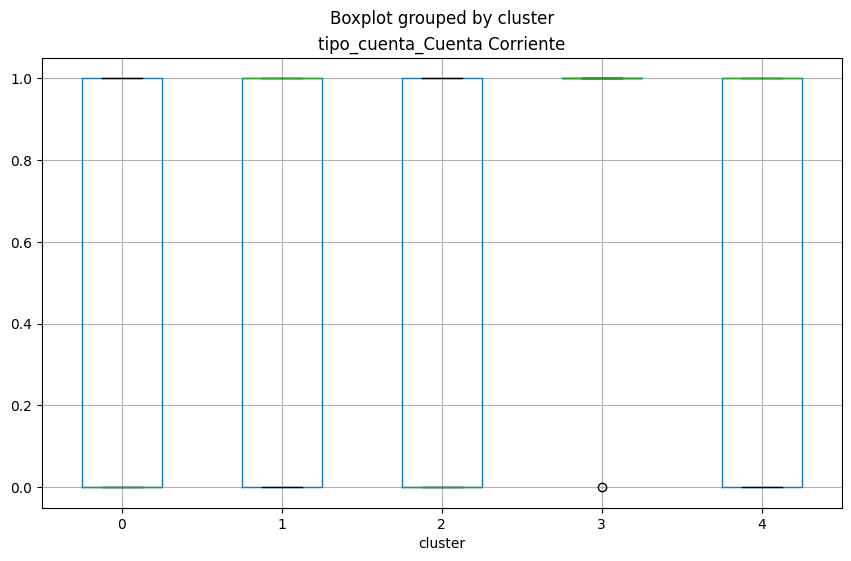

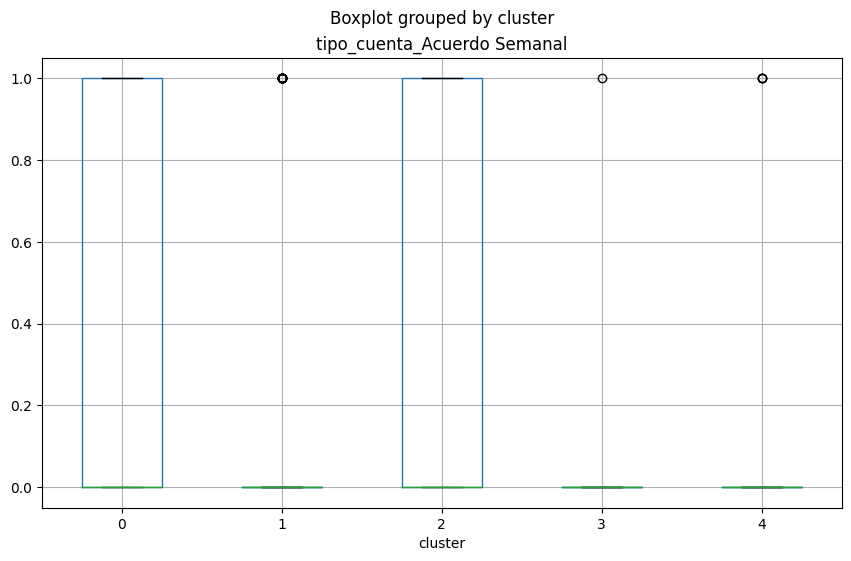

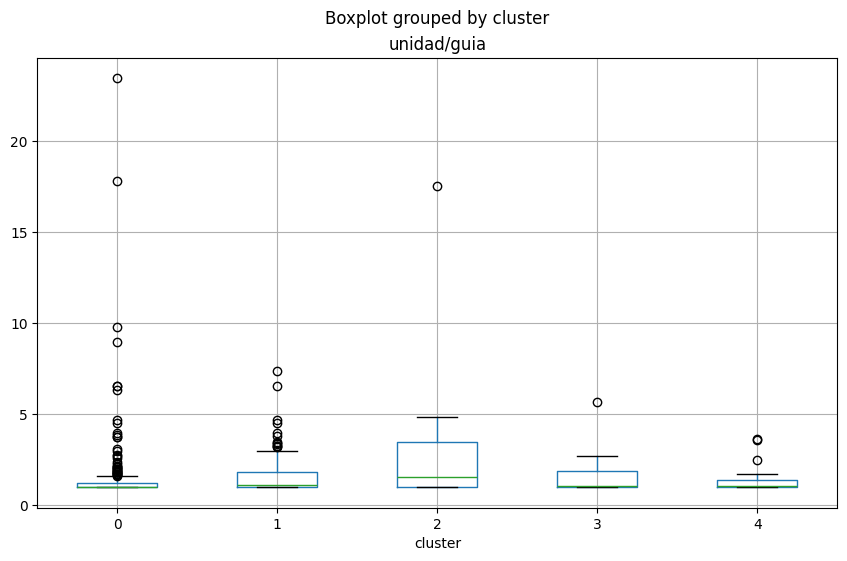

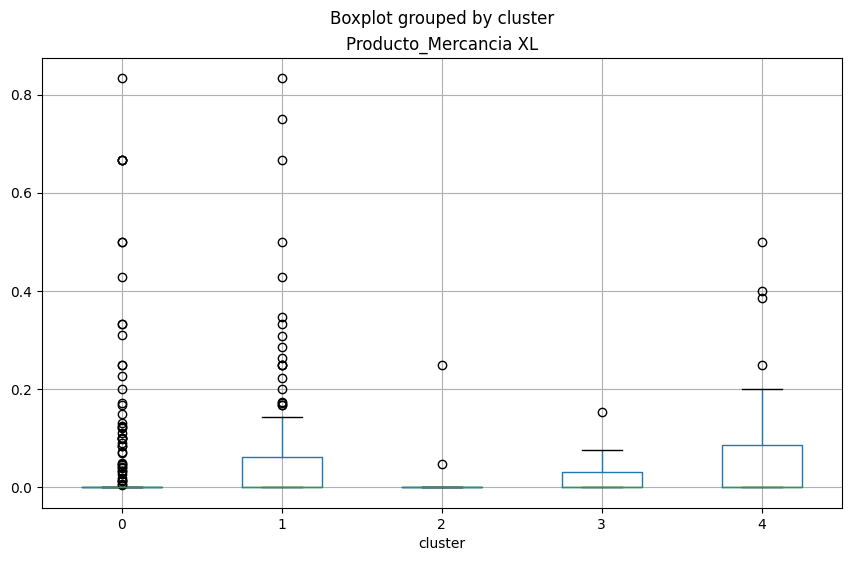

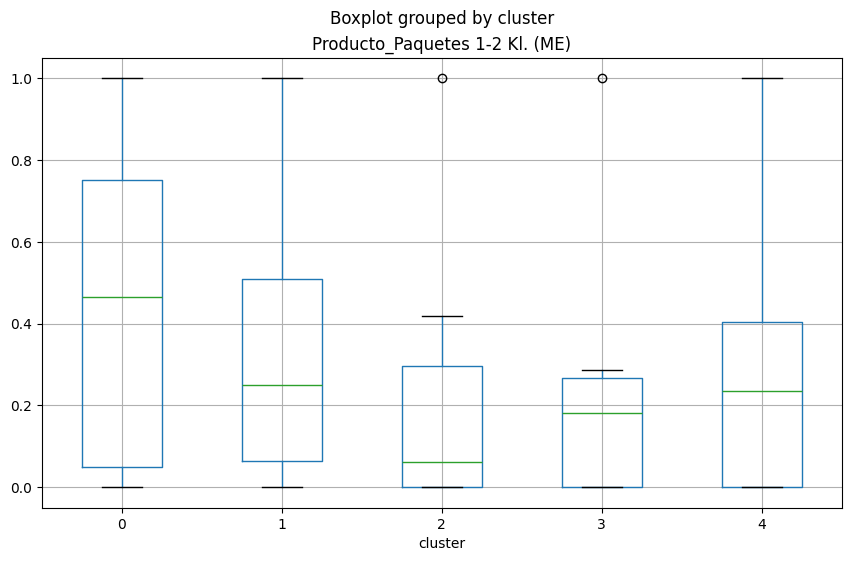

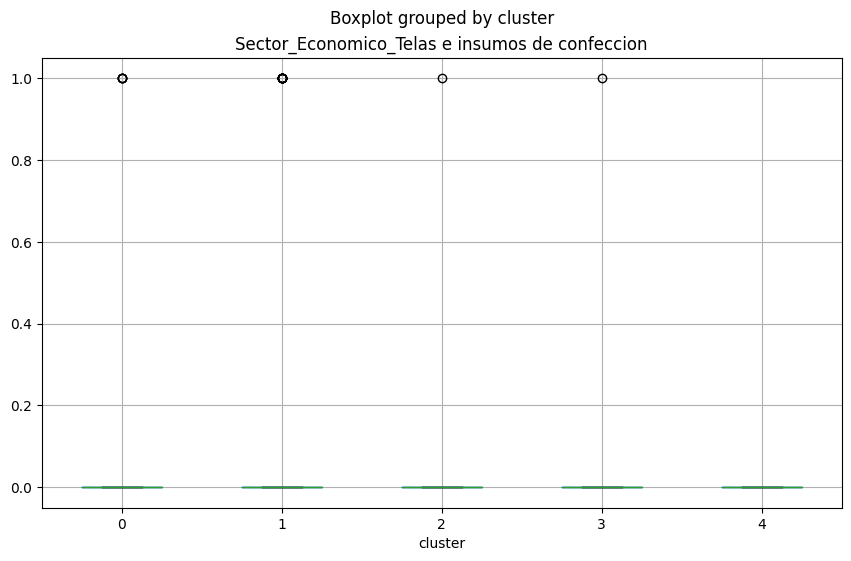

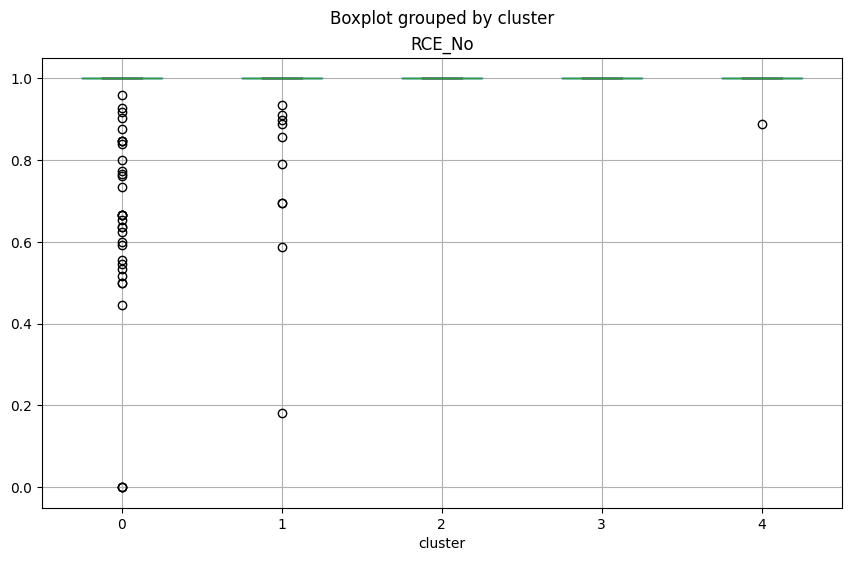

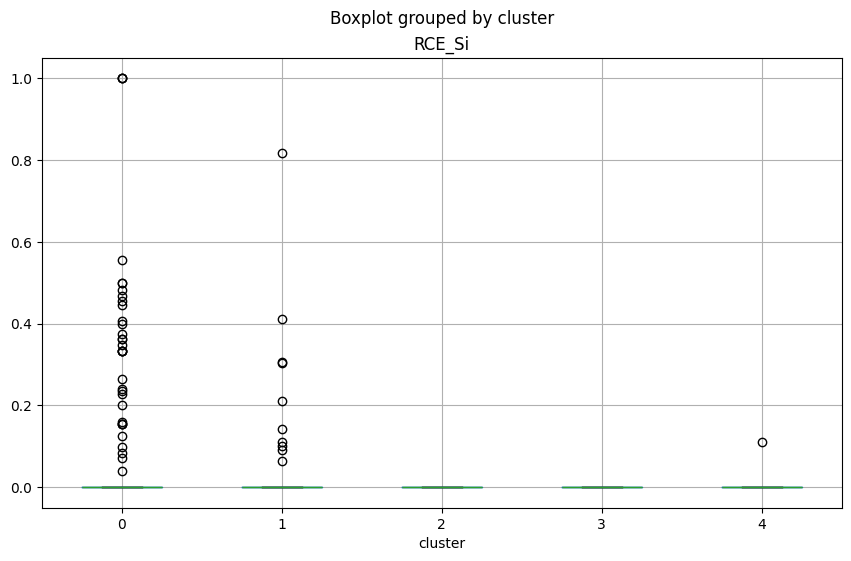

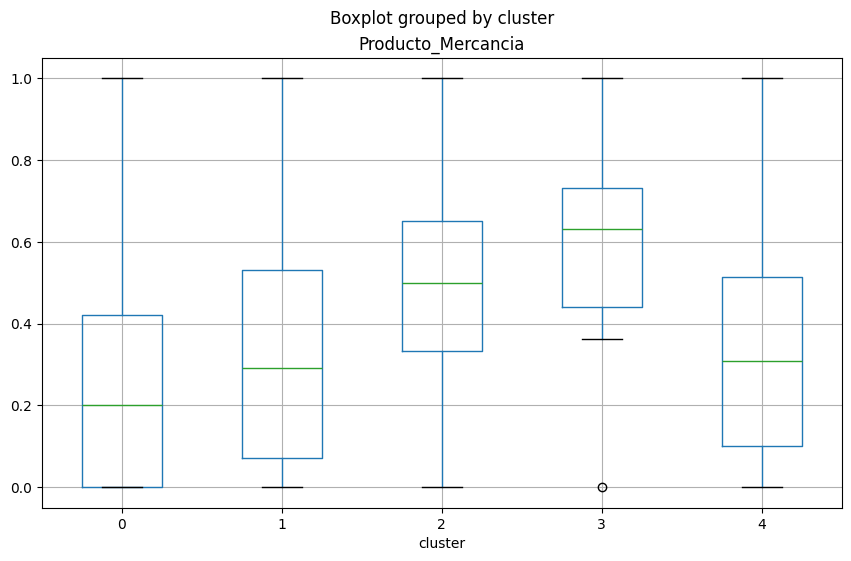

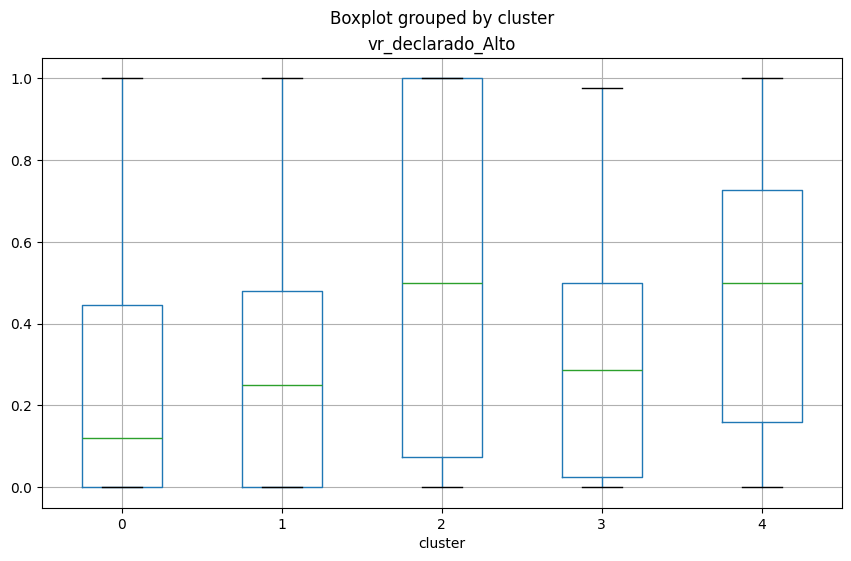

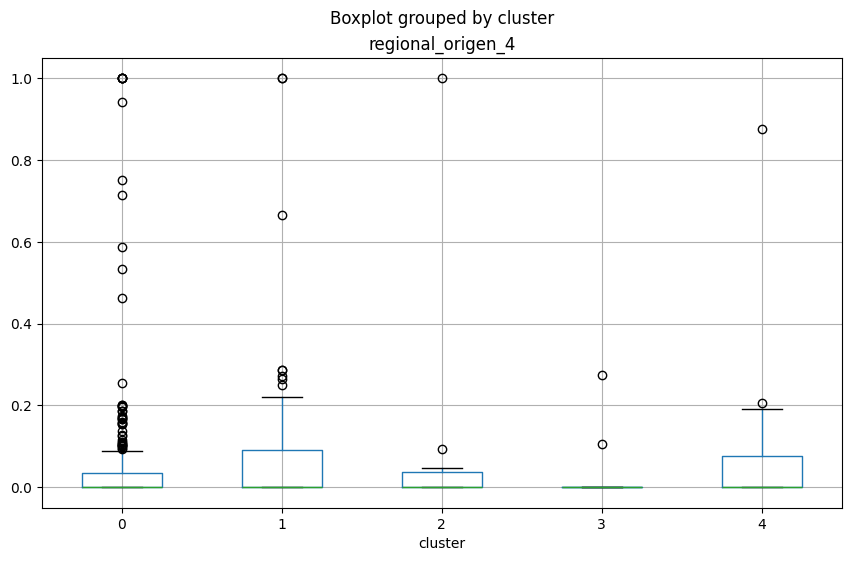

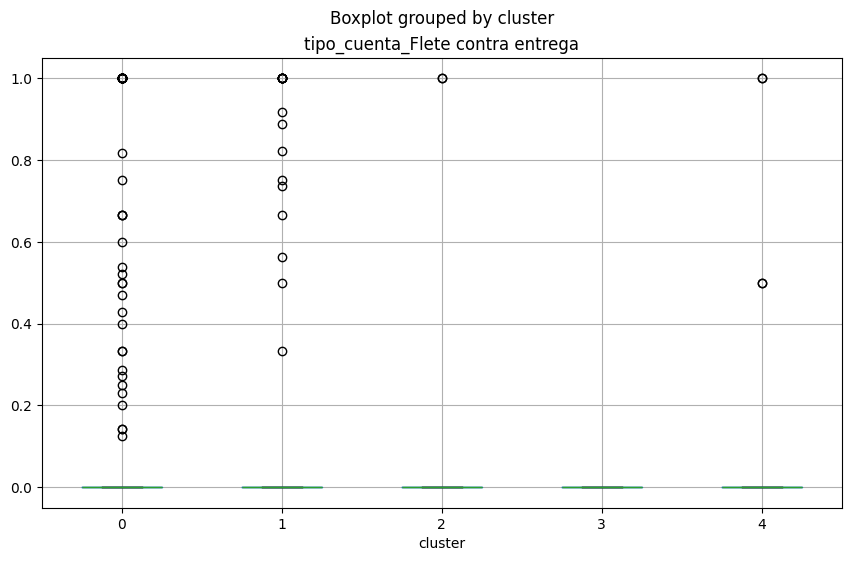

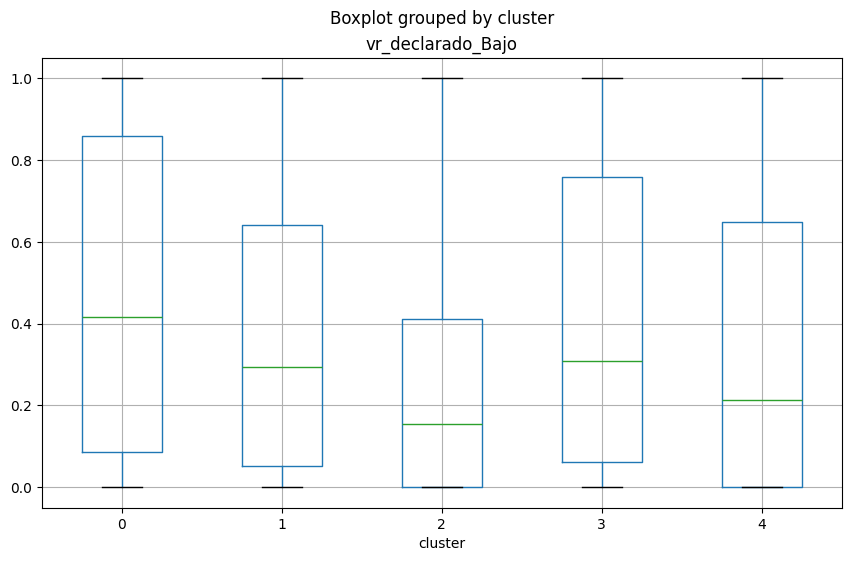

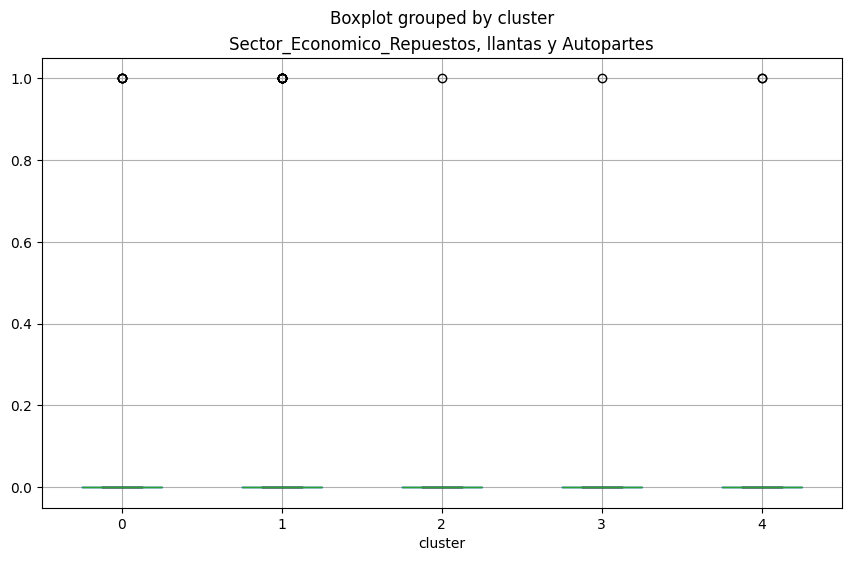

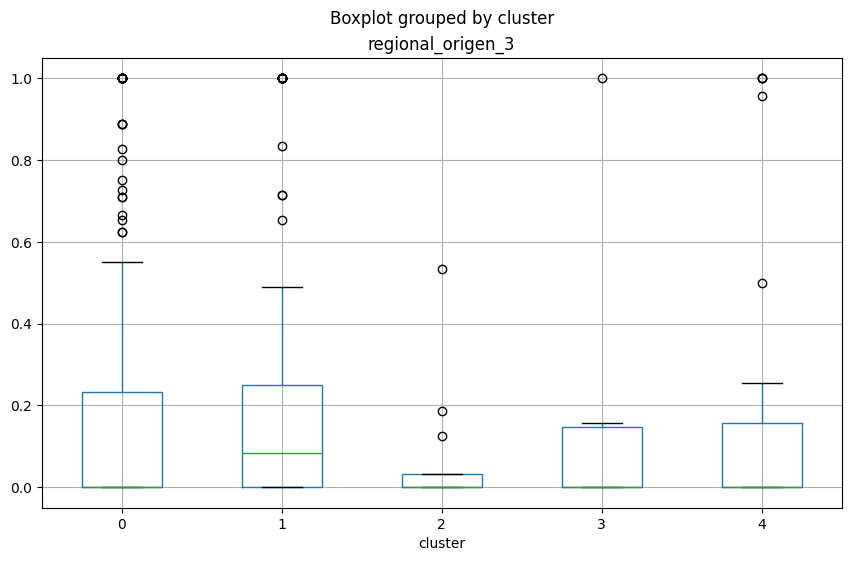

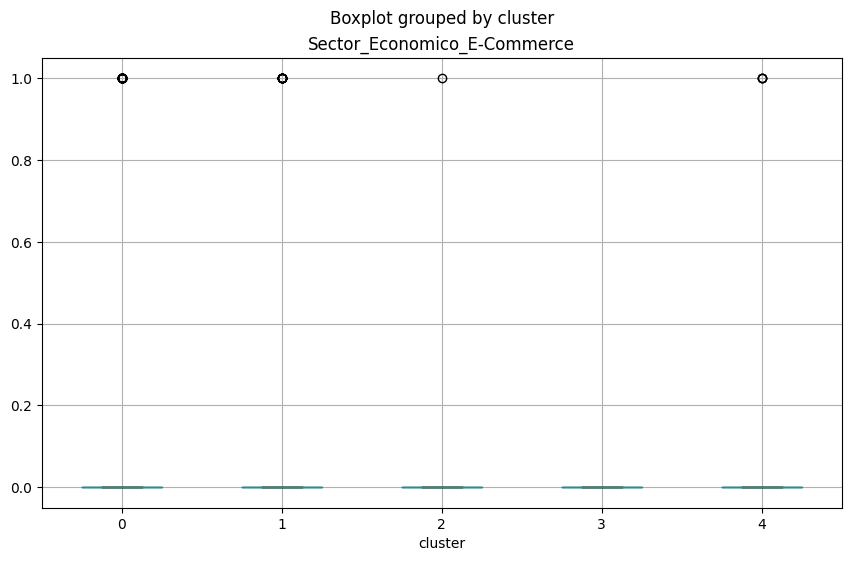

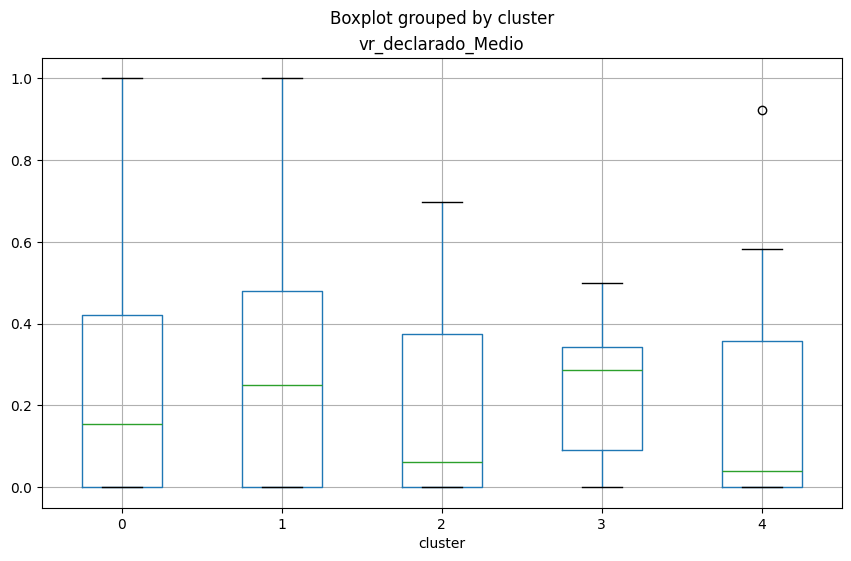

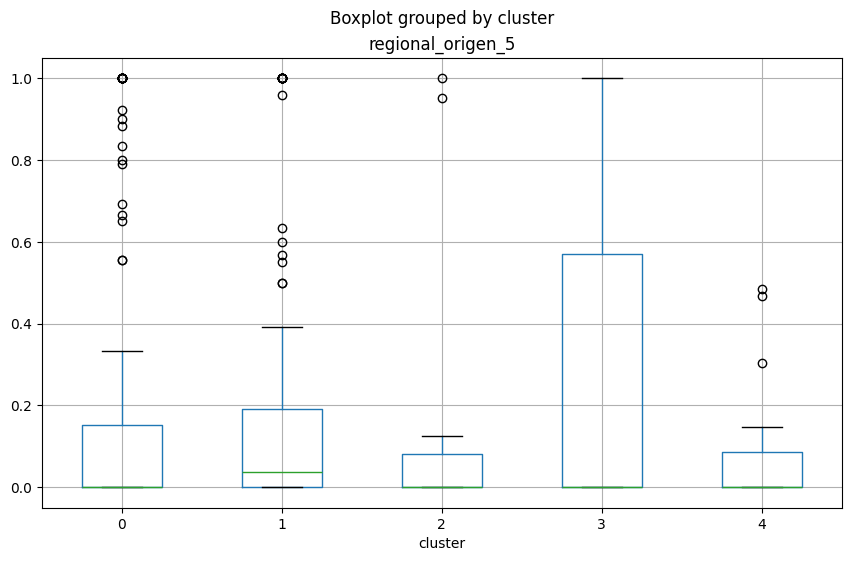

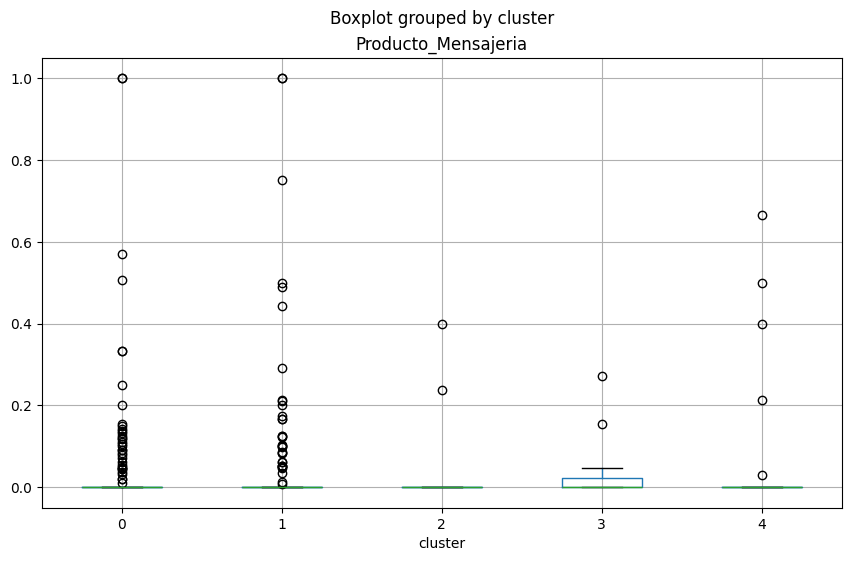

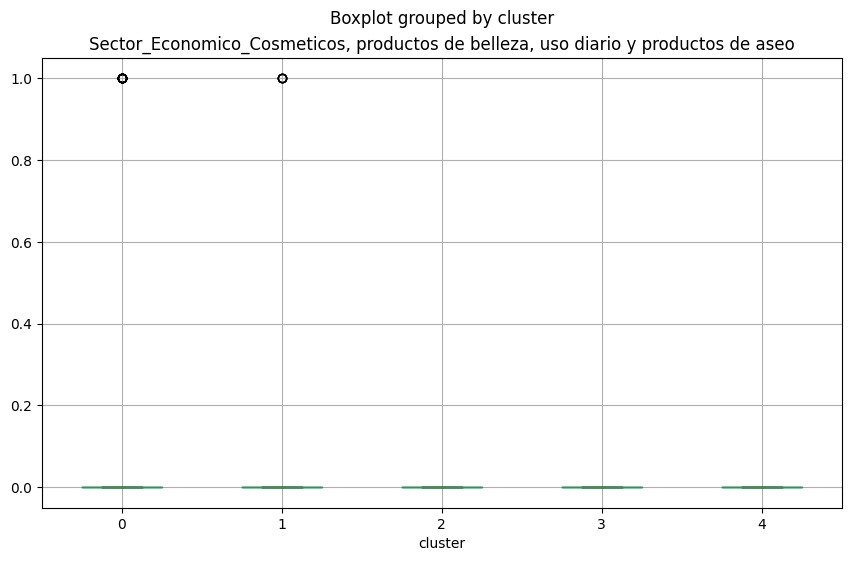

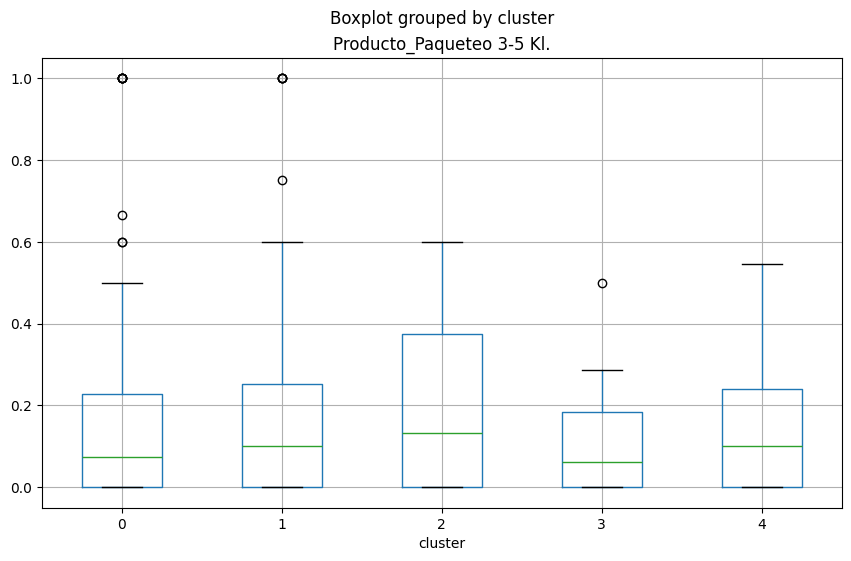

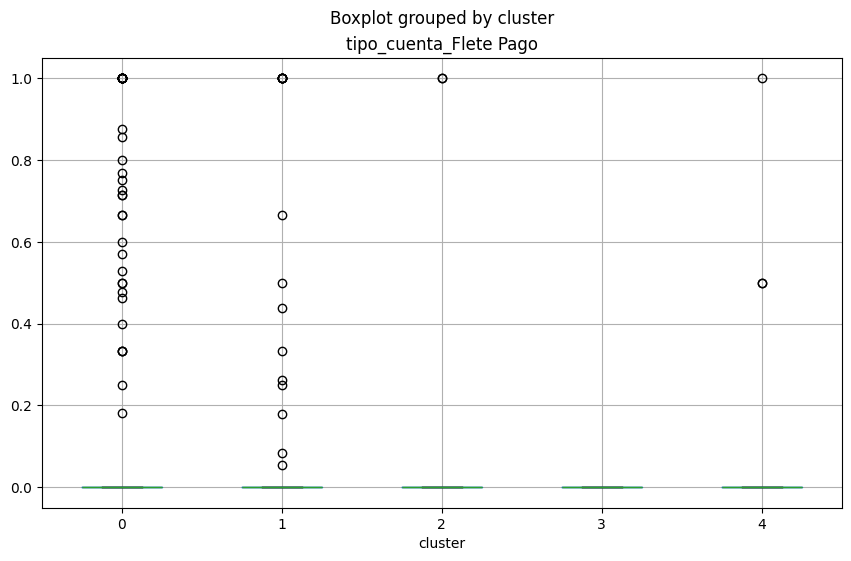

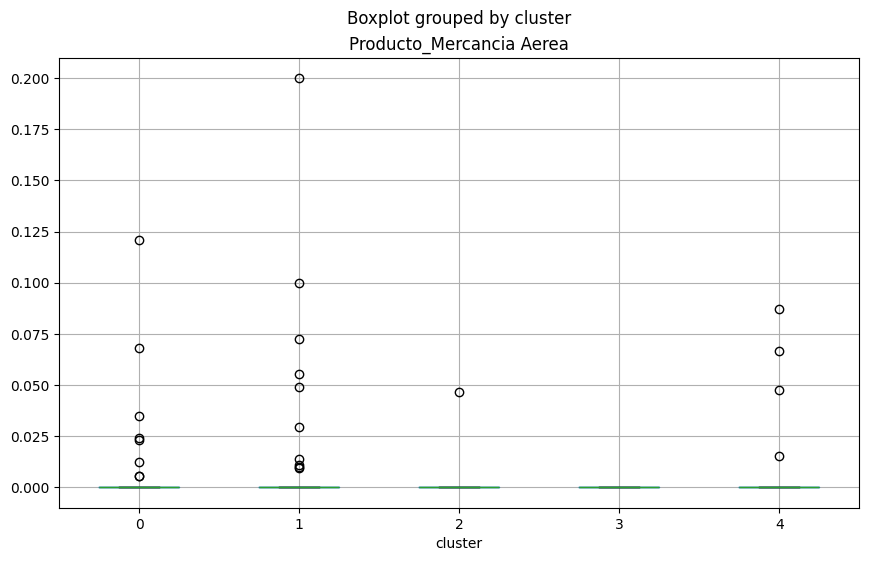

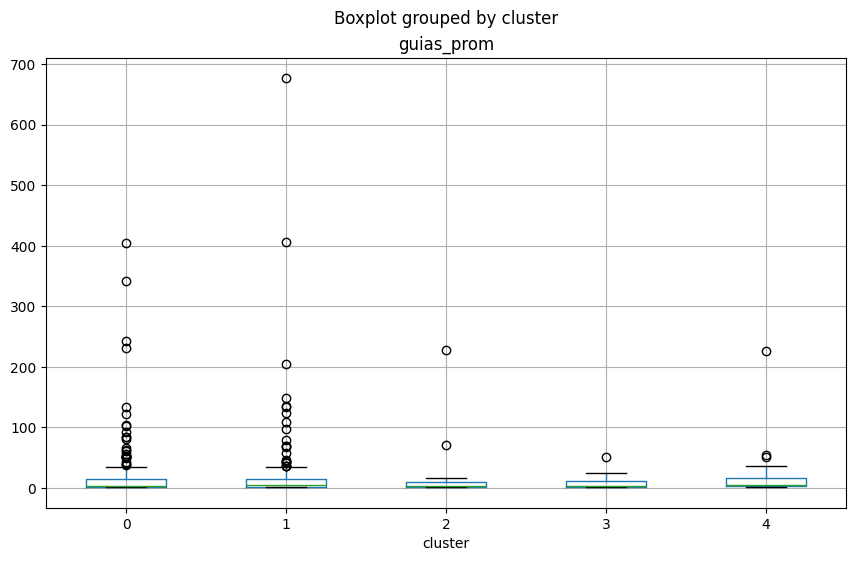

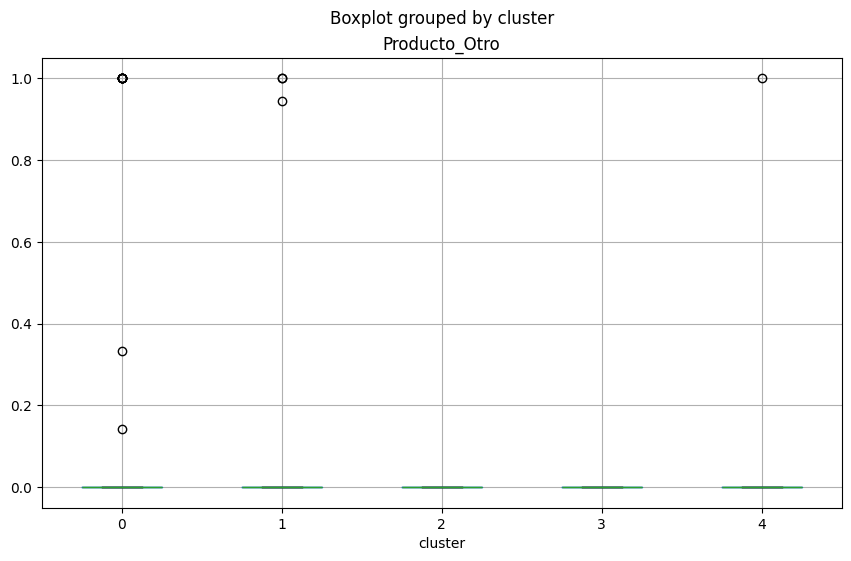

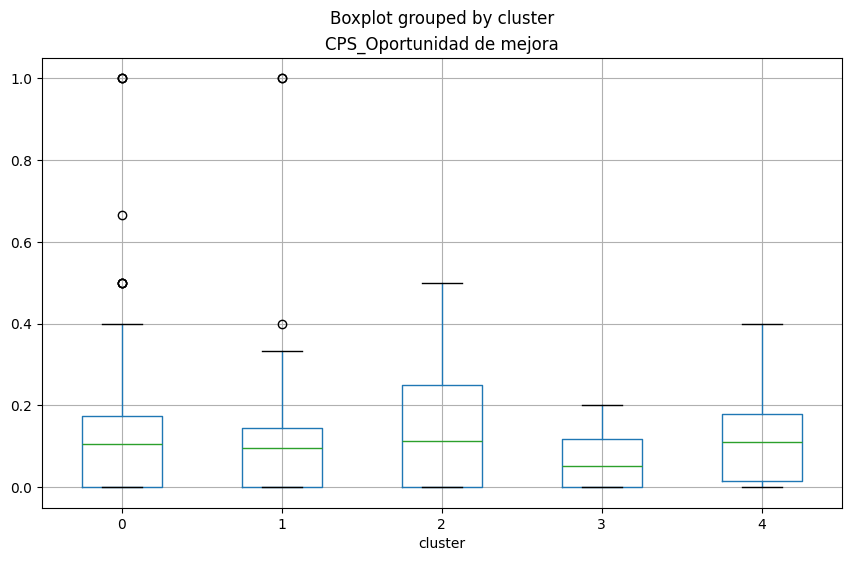

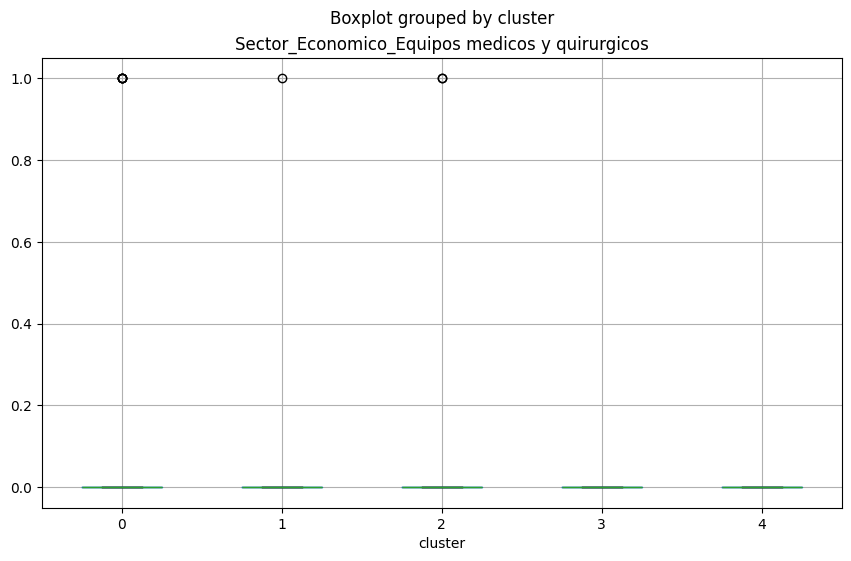

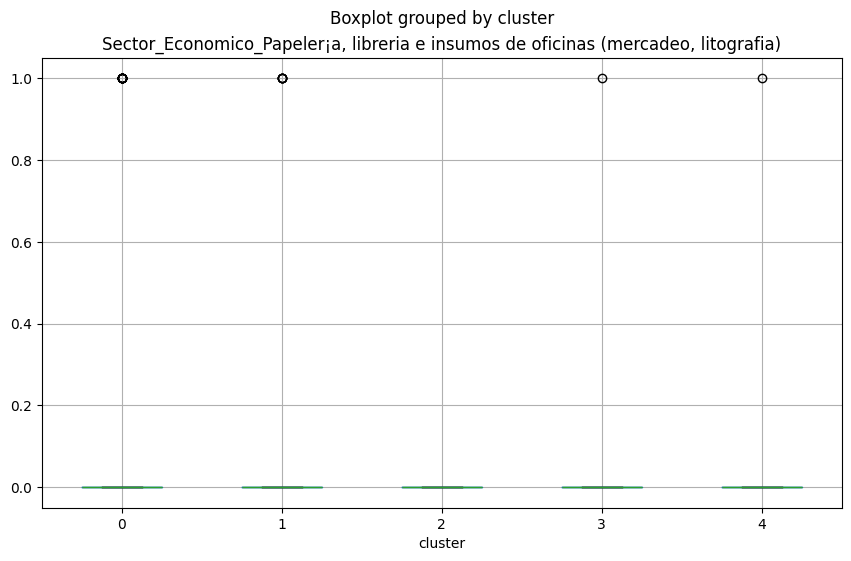

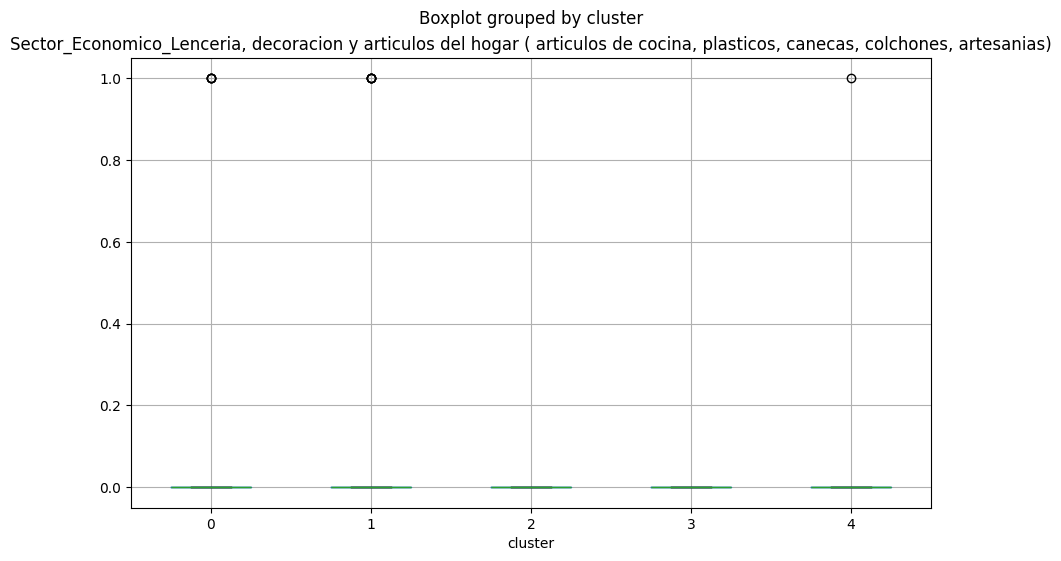

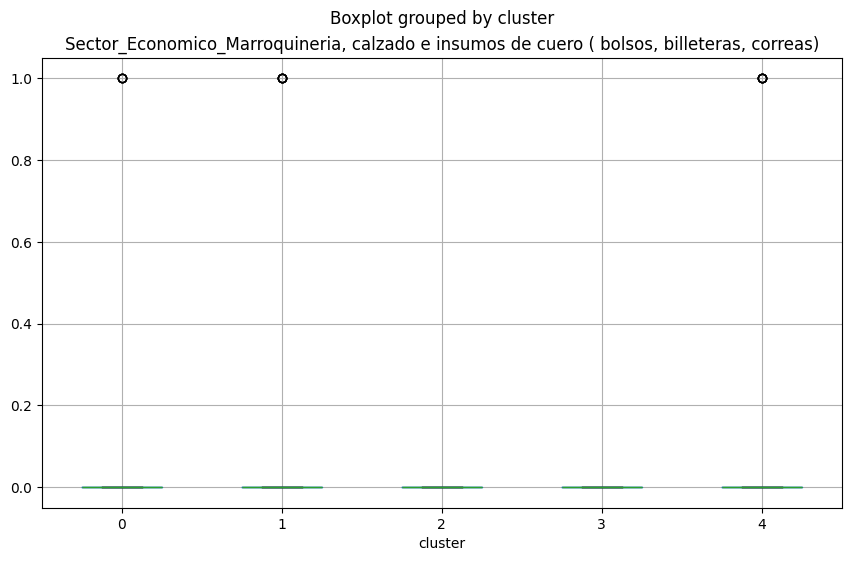

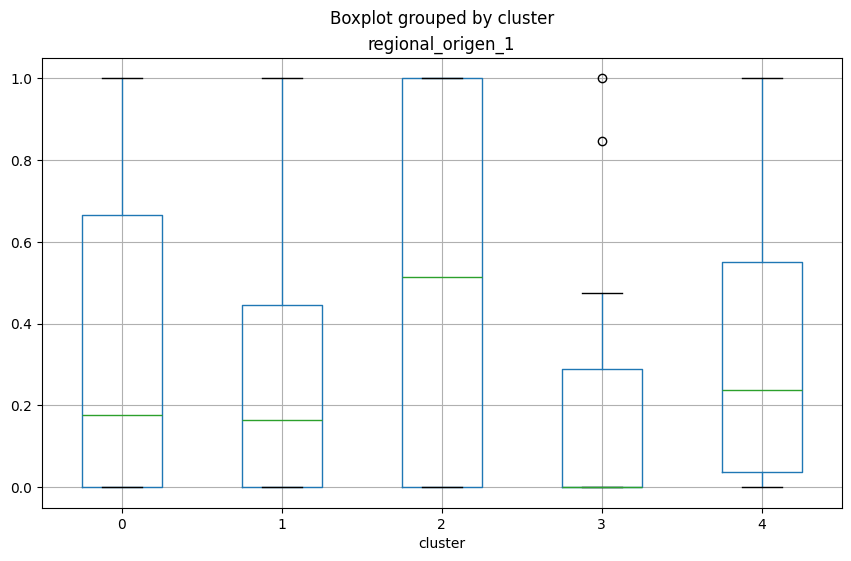

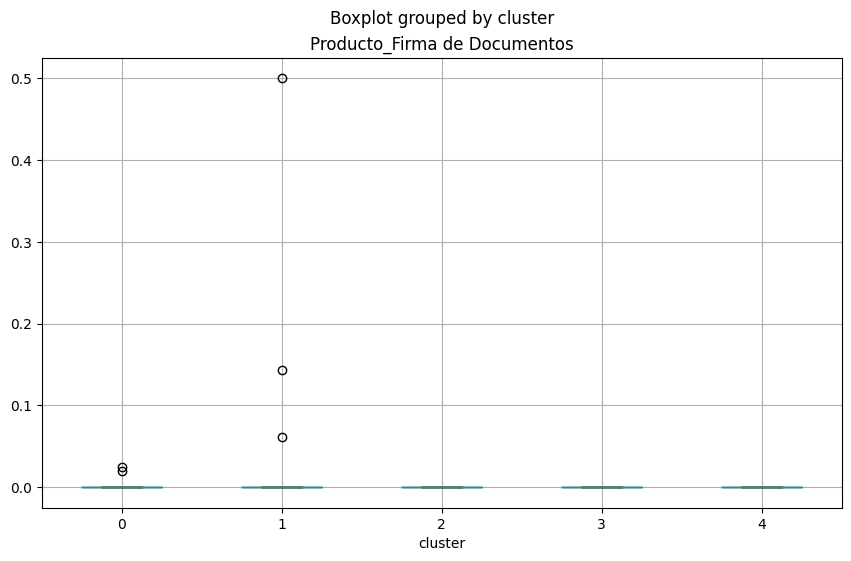

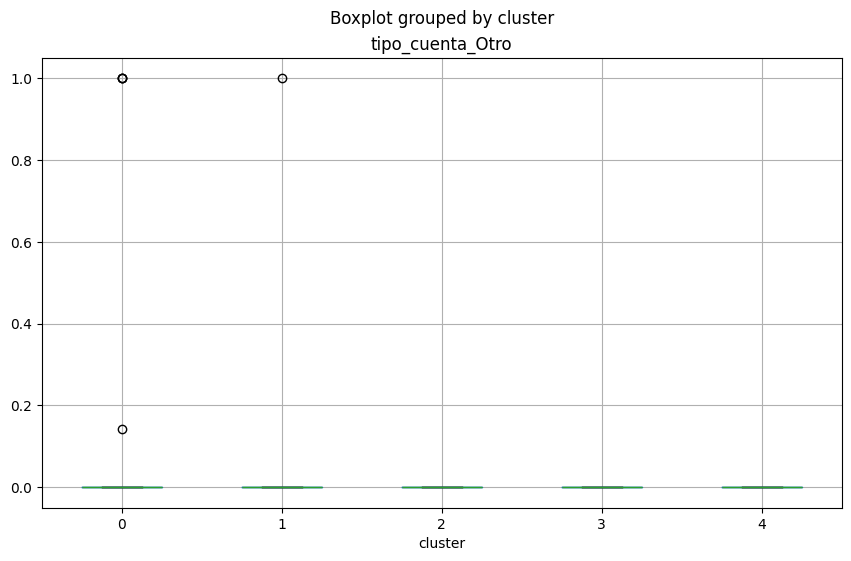

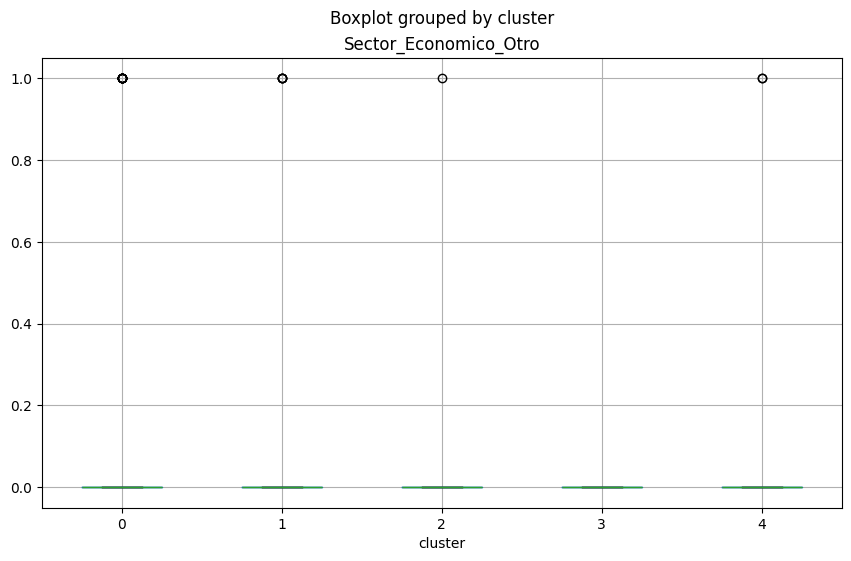

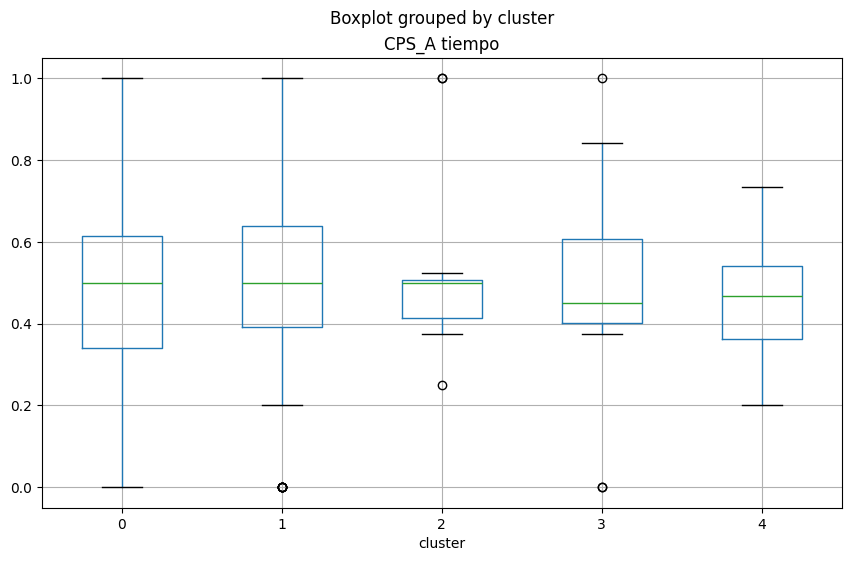

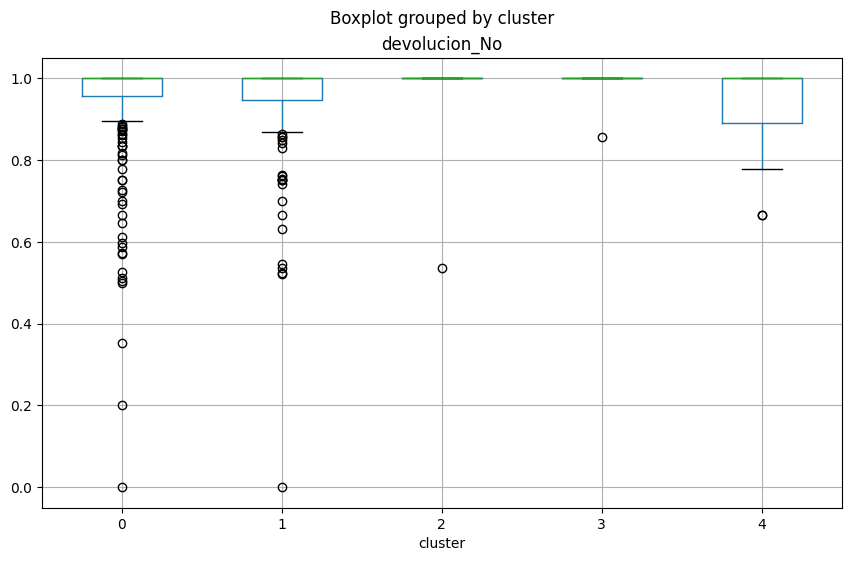

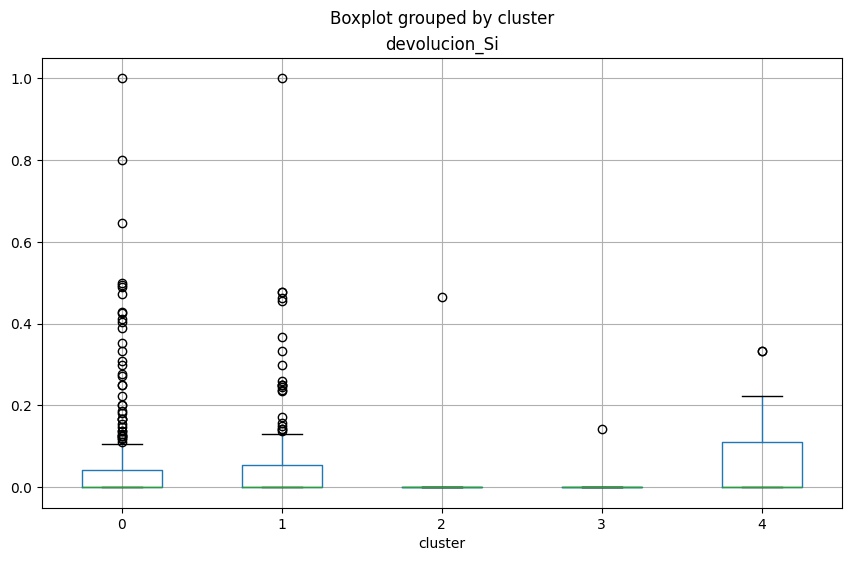

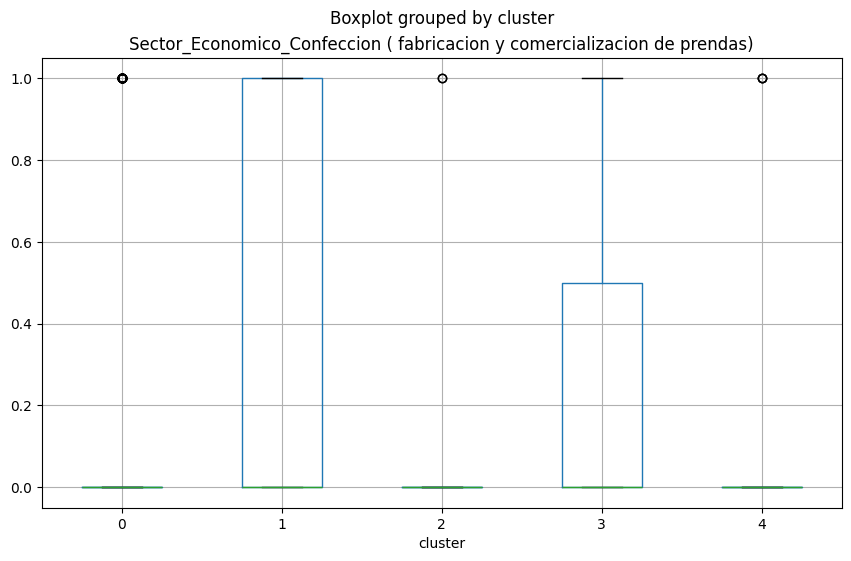

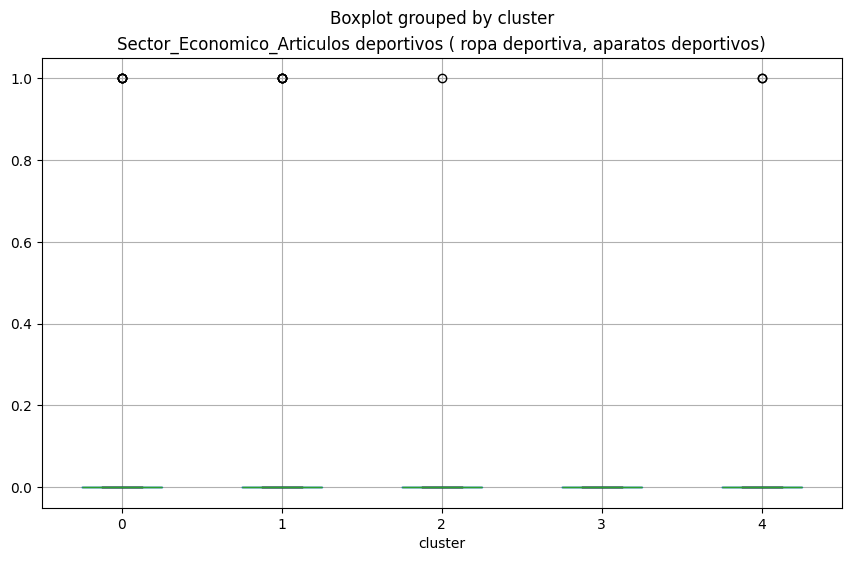

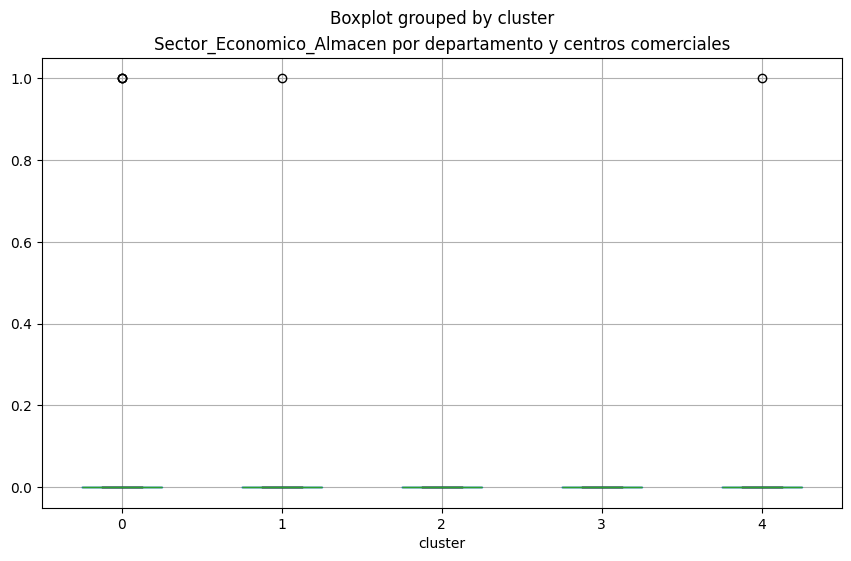

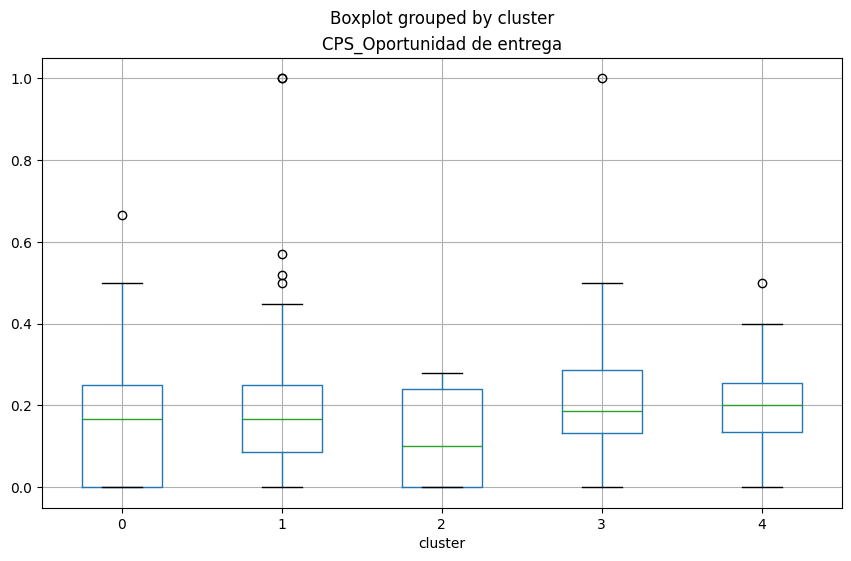

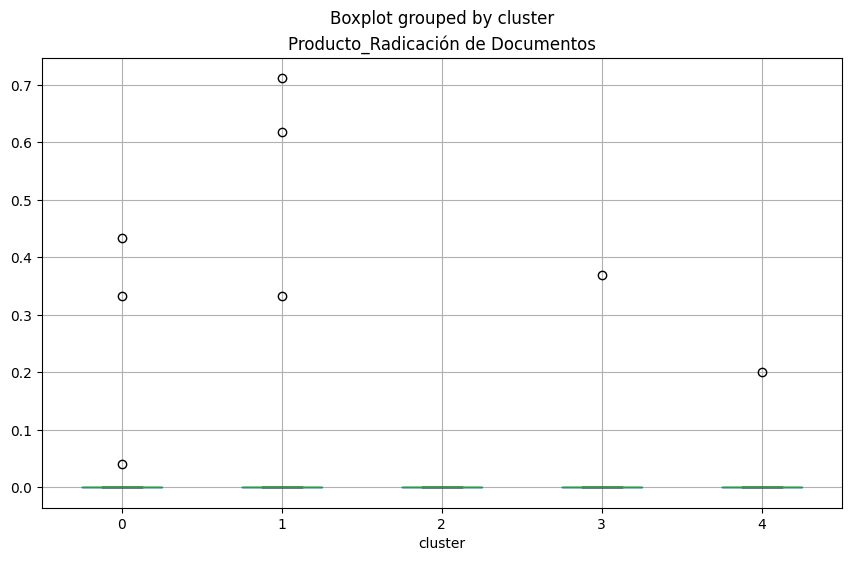

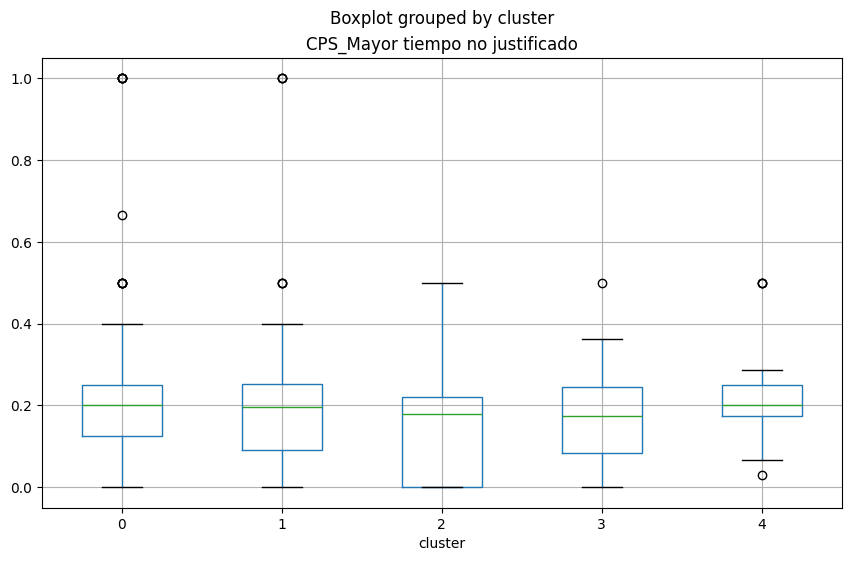

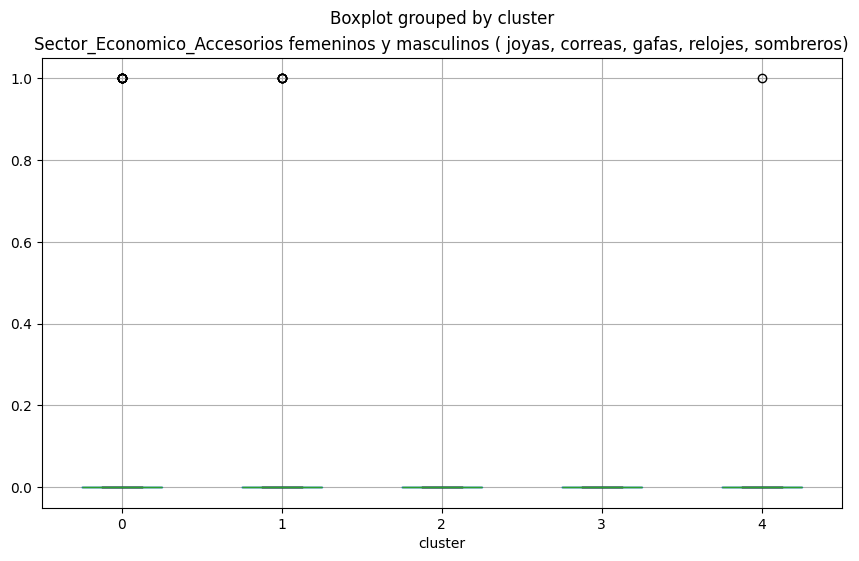

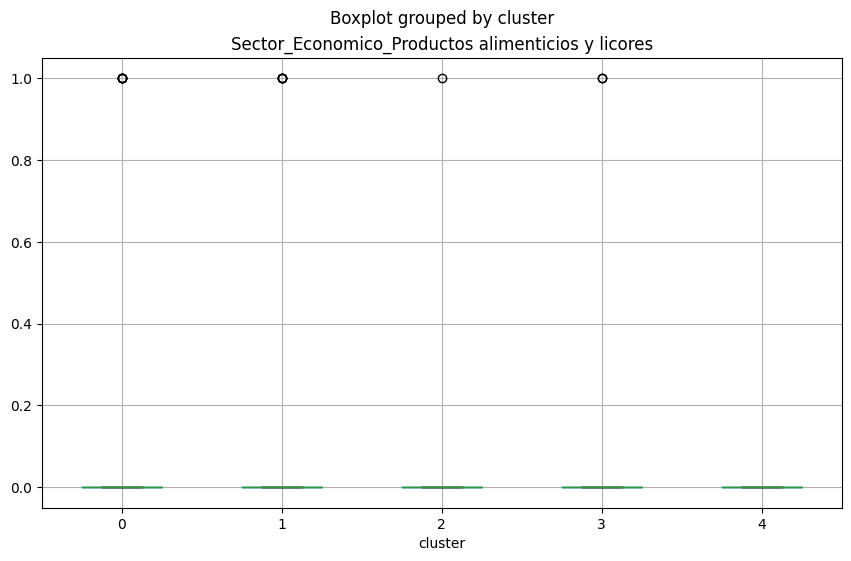

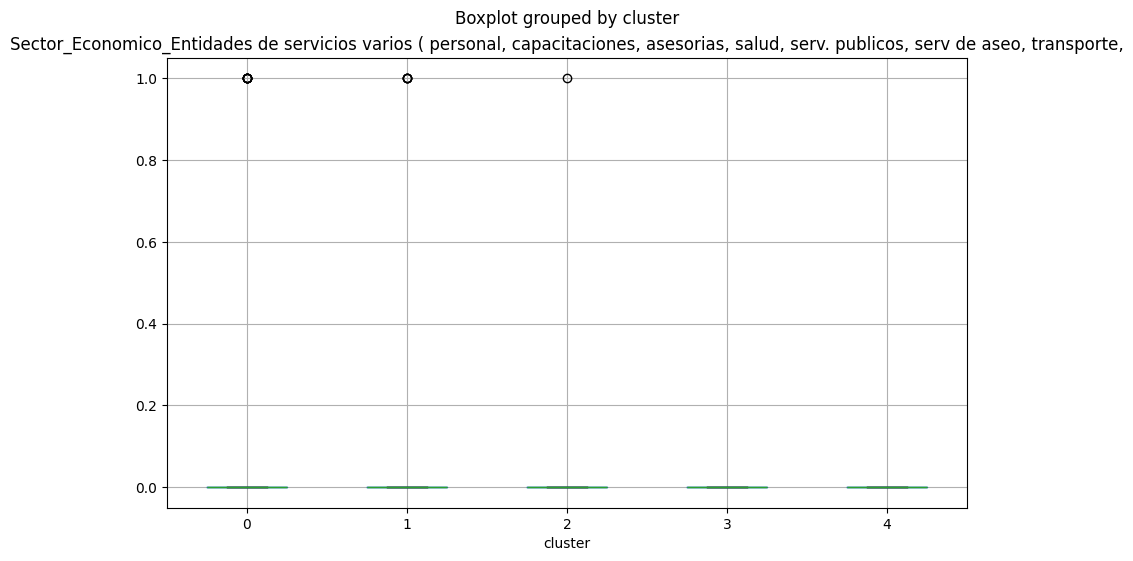

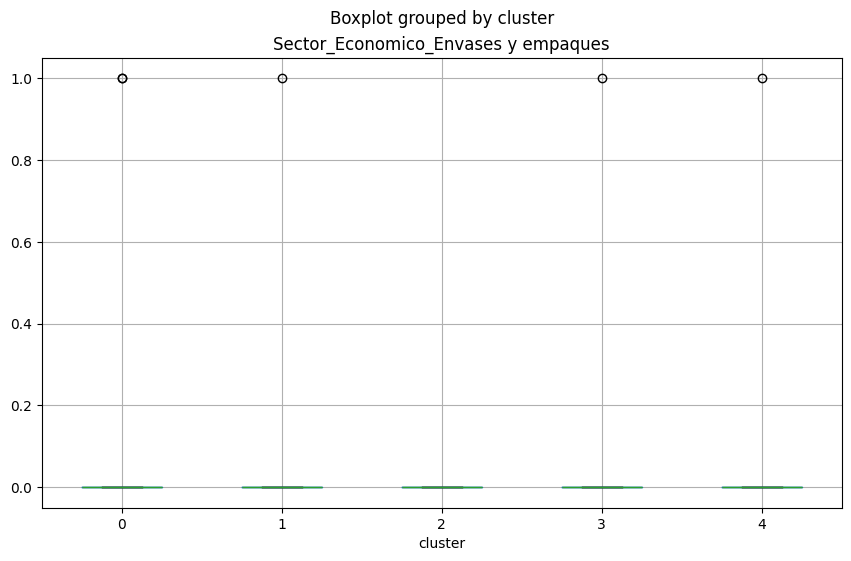

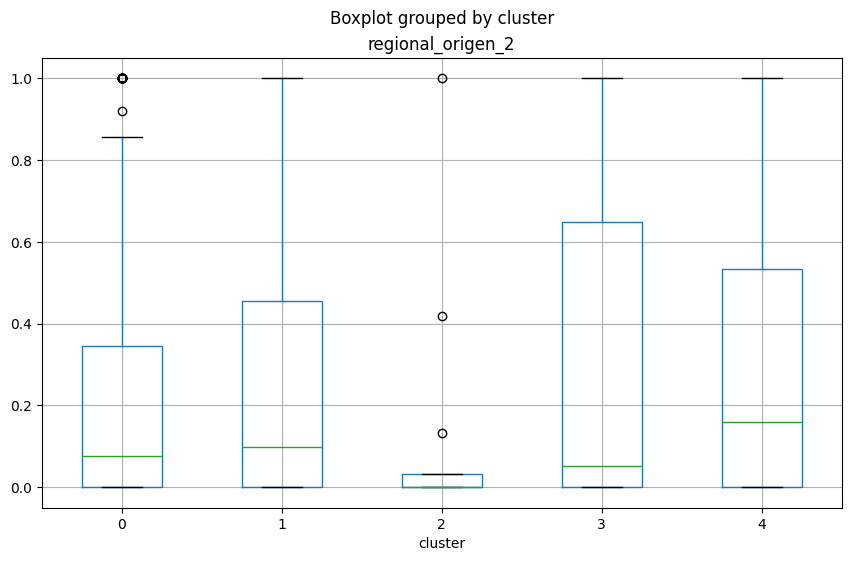

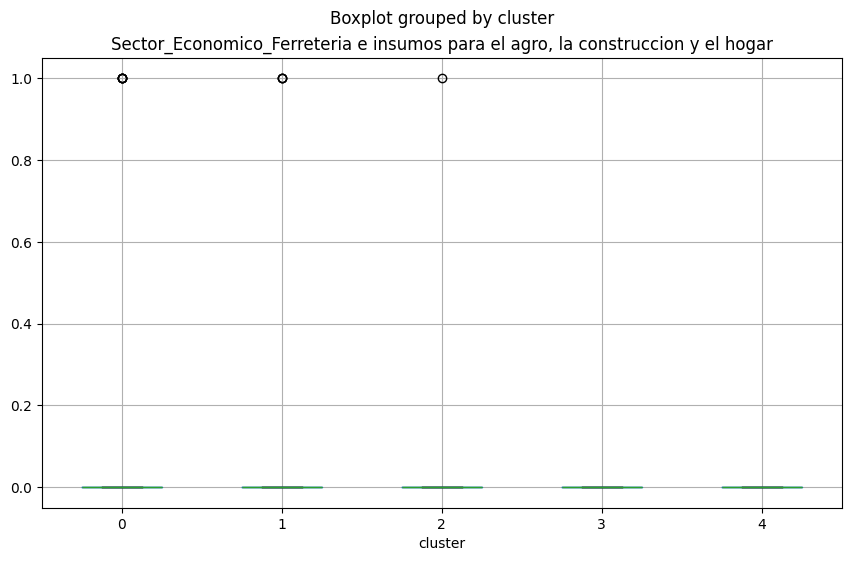

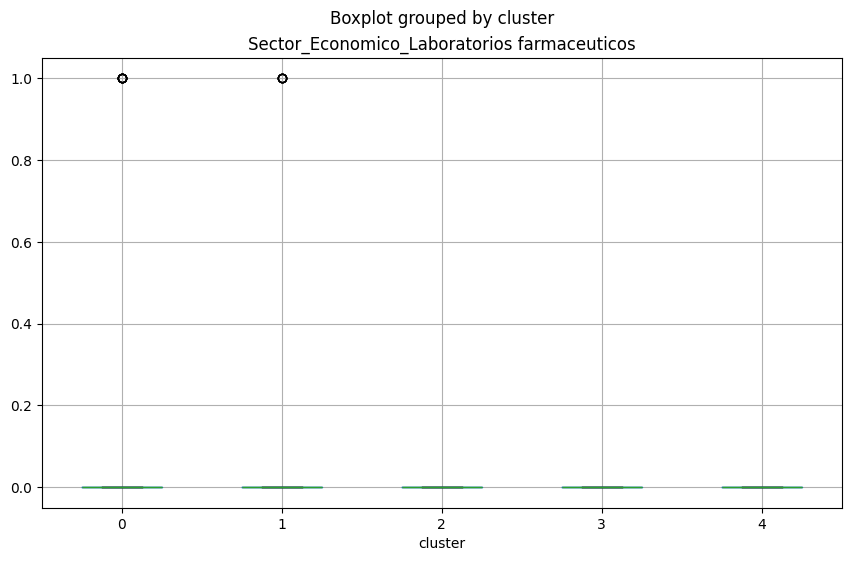

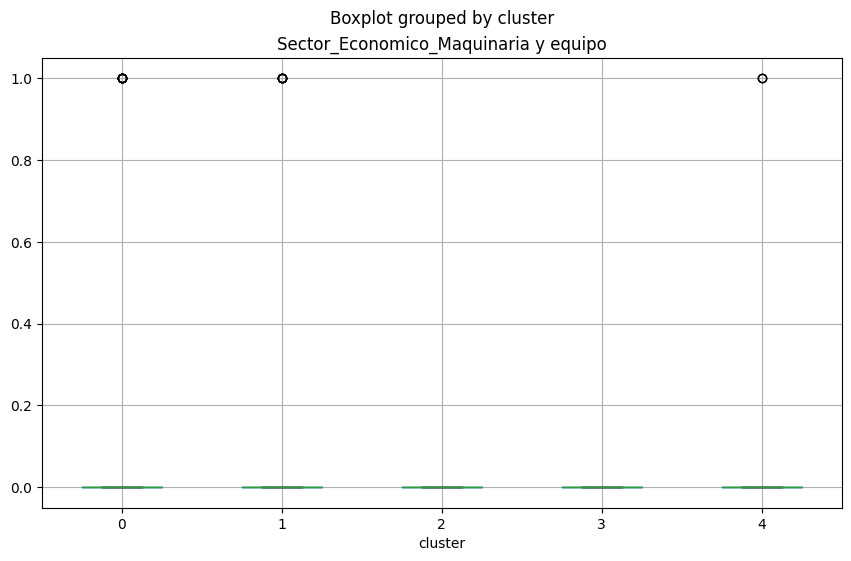

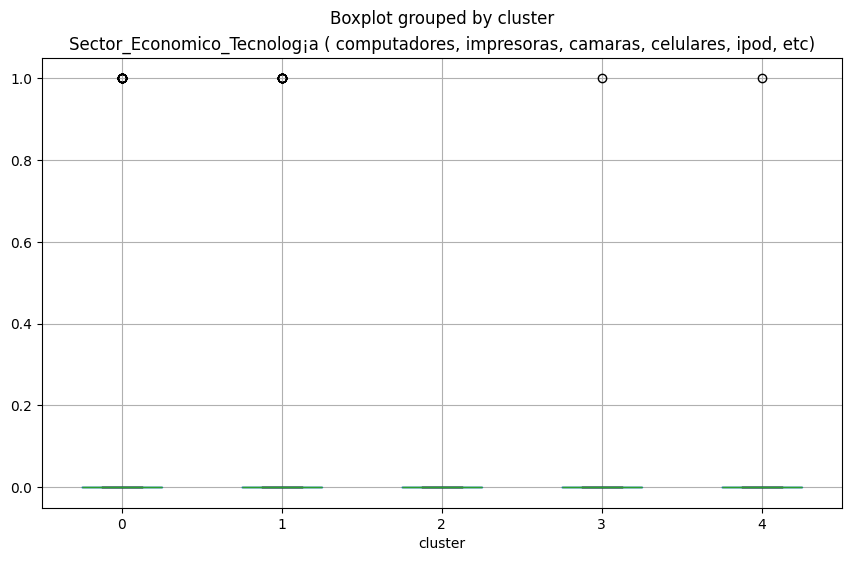

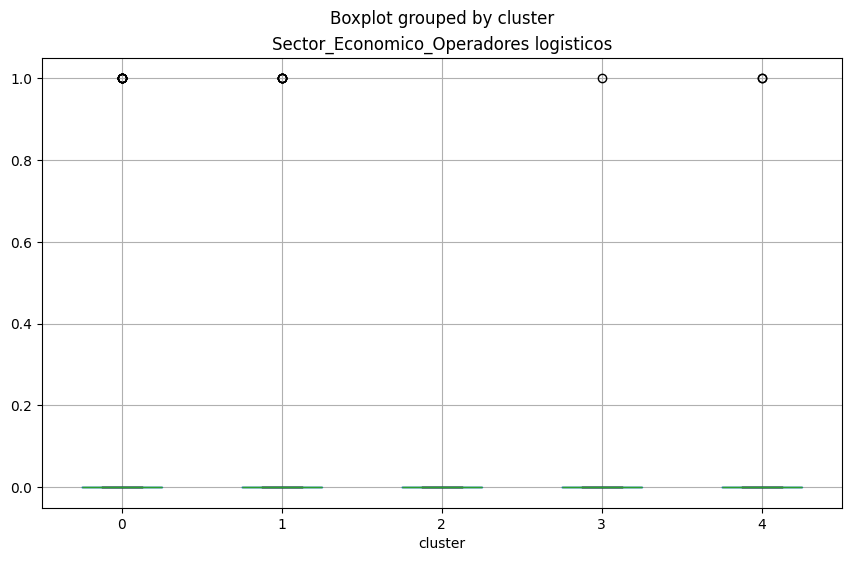

In [235]:
summary_dif( data_top400, all_results['variable'].tolist(), 0, 1, [2, 3, 4])

## 3. Clientes Pocas Guías

In [240]:
data_pg = data_clustering.loc[(~data_clustering.index.isin(top400.index)) & (data_clustering['guias_prom']<50000) 
                                & (data_clustering['unidad/guia']<120) & (data_clustering['Producto_Otro']==0), 
                                data_clustering.columns[~data_clustering.columns.str.contains('Sector_Economico')]]

data_pg = data_pg.drop(columns=['devolucion_Si', 'vr_declarado_Medio', 'regional_origen_5', 'tipo_cuenta_Otro'])

In [241]:
data_pg_ss = pd.DataFrame(ss.fit_transform(X=data_pg), index=data_pg.index, columns = data_pg.columns)

In [242]:
labels_pg, clusters_se = clustering(data_pg_ss, data_model.iloc[data_pg_ss.index], 30)

In [243]:
np.unique(labels_pg, return_counts=True)

(array([-1,  0,  1,  2,  3,  4], dtype=int64),
 array([3191,   33,   36,  867, 1047, 1071], dtype=int64))

In [245]:
labels_no_out = labels_pg[labels_pg != -1]


In [246]:
df_hdbscan_res = data_clustering.iloc[X_no_out.index].copy()

df_hdbscan_res['cluster'] = labels_no_out

In [247]:
all_results, significant = mann_whitney_by_cluster(
    df_hdbscan_res,
    cluster_col="cluster",
    c1=0,
    c2=3
)

significant

Empty DataFrame
Columns: [variable, pvalue, cliff_delta, pvalue_adj, significant]
Index: []

In [249]:
#No hay evidencia estadística de la diferencia entre el cluster 0 y 3
labels_no_out[labels_no_out == 0] = 3

In [250]:
df_hdbscan_res['cluster'] = labels_no_out

#### Análisis de Componentes Principales

In [258]:
labels_pg[labels_pg == 0] = 3
X_no_out = data_pg_ss[labels_pg != -1]

pca_pg = PCA(n_components=2)
X_pca_pg = pca_pg.fit_transform(X_no_out)

In [259]:
pca.explained_variance_ratio_.sum()

0.3273339639829702

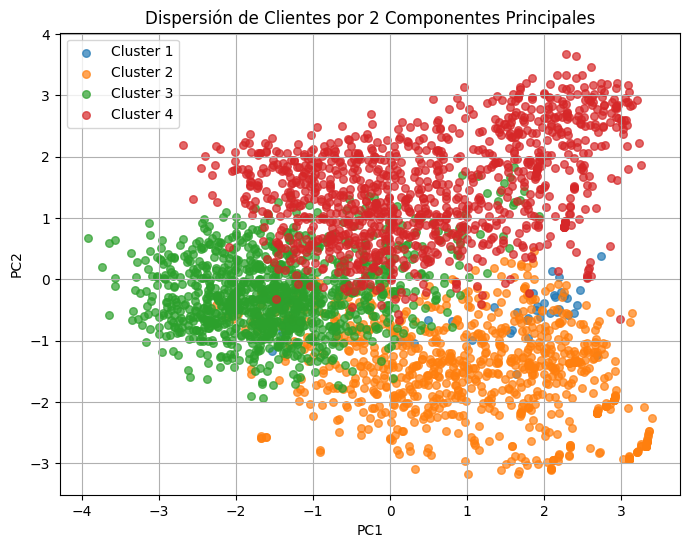

In [260]:
plt.figure(figsize=(8, 6))
for c in np.unique(labels_no_out):
    mask = labels_no_out == c
    plt.scatter(
        X_pca_pg[mask, 0],
        X_pca_pg[mask, 1],
        s=30,
        alpha=0.7,
        label=f"Cluster {c}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dispersión de Clientes por 2 Componentes Principales")
plt.legend()
plt.grid(True)
plt.show()

In [261]:
loadings_pg = pd.DataFrame(
    pca_pg.components_.T,
    index=X_no_out.columns,
    columns=["PC1", "PC2"]
)

In [262]:
loadings_pg['PC1'].sort_values(ascending=False)

Producto_Paquetes 1-2 Kl. (ME)       4.480836e-01
vr_declarado_Bajo                    3.767873e-01
tipo_cuenta_Flete Pago               2.131295e-01
regional_origen_2                    1.553212e-01
tipo_cuenta_Flete contra entrega     1.534586e-01
tipo_cuenta_Acuerdo Semanal          1.376483e-01
CPS_A tiempo                         1.241110e-01
RCE_Si                               1.068791e-01
guias_prom                           3.229757e-02
regional_origen_4                    2.060345e-02
Producto_Otro                        4.235165e-22
Producto_Firma de Documentos        -1.516639e-03
Producto_Mercancia Aerea            -6.558765e-03
CPS_Mayor tiempo no justificado     -3.583331e-02
CPS_Oportunidad de mejora           -4.046938e-02
Producto_Radicación de Documentos   -4.898103e-02
Producto_Mensajeria                 -8.145211e-02
regional_origen_3                   -9.885243e-02
unidad/guia                         -9.953415e-02
RCE_No                              -1.068791e-01


In [263]:
loadings_pg['PC2'].sort_values(ascending=False)

tipo_cuenta_Acuerdo Semanal          5.547490e-01
regional_origen_1                    3.244212e-01
guias_prom                           2.073178e-01
CPS_Oportunidad de mejora            1.766570e-01
RCE_Si                               1.519536e-01
CPS_Oportunidad de entrega           1.322124e-01
CPS_Mayor tiempo no justificado      1.135038e-01
Producto_Paquetes 1-2 Kl. (ME)       6.604301e-02
regional_origen_4                    4.327505e-02
Producto_Mercancia XL                1.015561e-02
vr_declarado_Bajo                    5.726428e-03
Producto_Mercancia Aerea             3.983678e-03
Producto_Mensajeria                  1.101578e-03
Producto_Otro                        1.355253e-20
Producto_Firma de Documentos        -1.307049e-04
unidad/guia                         -3.948146e-03
vr_declarado_Alto                   -5.459937e-03
regional_origen_3                   -8.174789e-03
Producto_Radicación de Documentos   -1.536577e-02
Producto_Paqueteo 3-5 Kl.           -3.317080e-02


#### Análisis Estadístico Descriptivo

In [264]:
mean_res = df_hdbscan_res.groupby('cluster').mean()

In [265]:
mean_res[(loadings_pg['PC1'].sort_values(ascending=False).index[:4].tolist() 
             + loadings_pg['PC1'].sort_values(ascending=False).index[-4:].tolist())].style.format("{:.2f}")

In [266]:
mean_res[(loadings_pg['PC2'].sort_values(ascending=False).index[:4].tolist() 
             + loadings_pg['PC2'].sort_values(ascending=False).index[-4:].tolist())].style.format("{:.2f}")

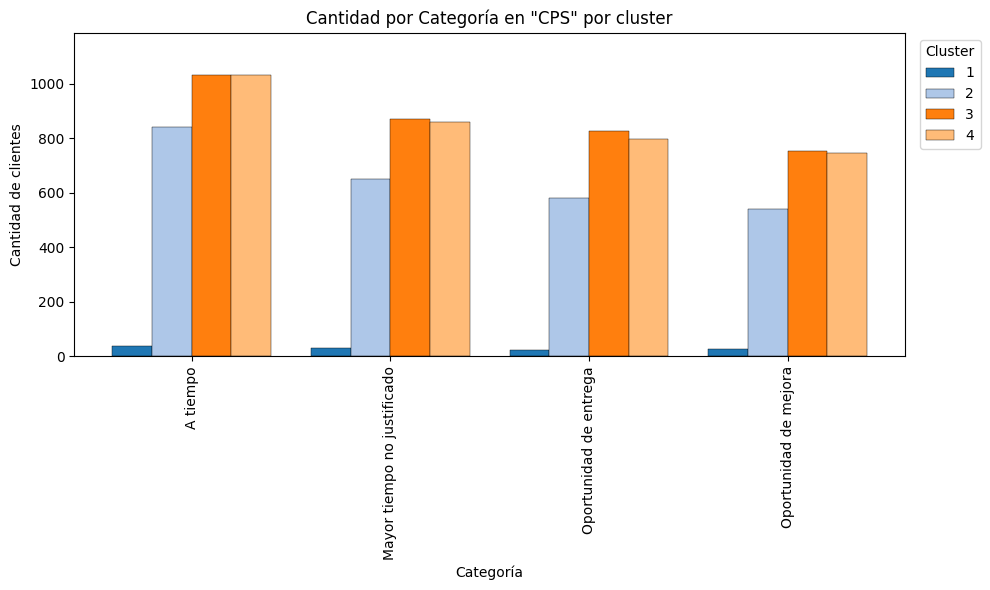

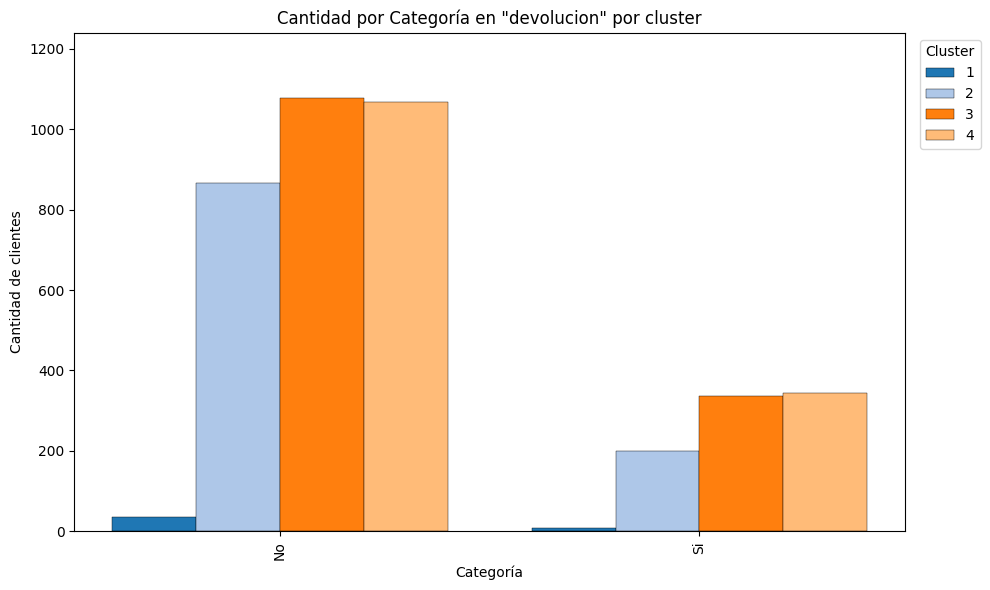

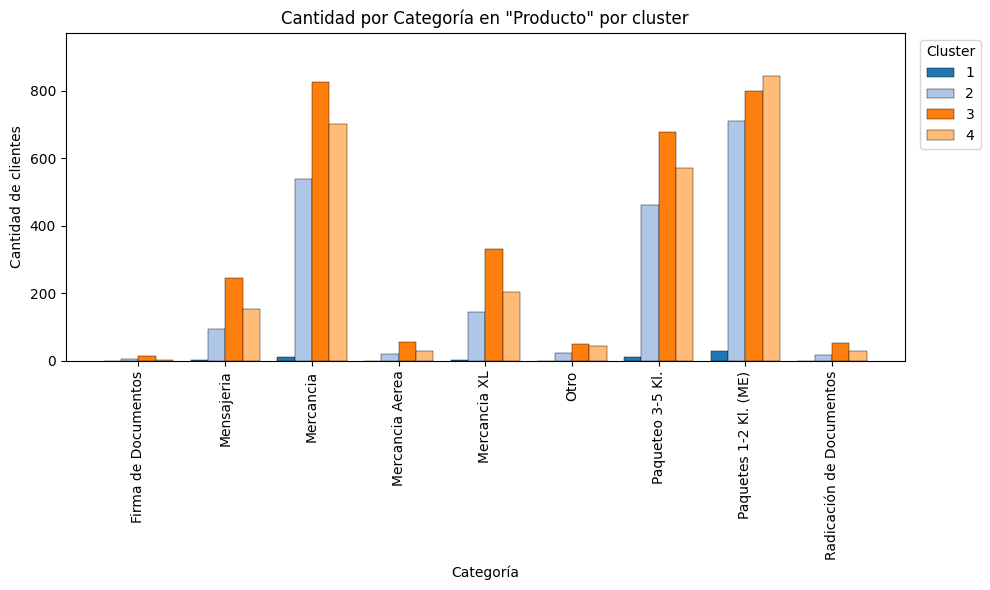

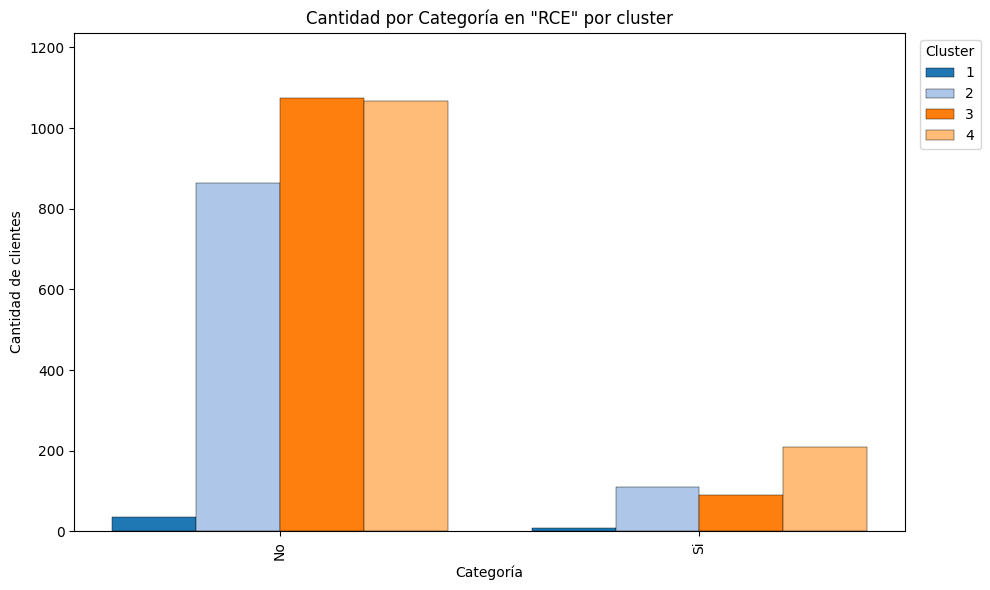

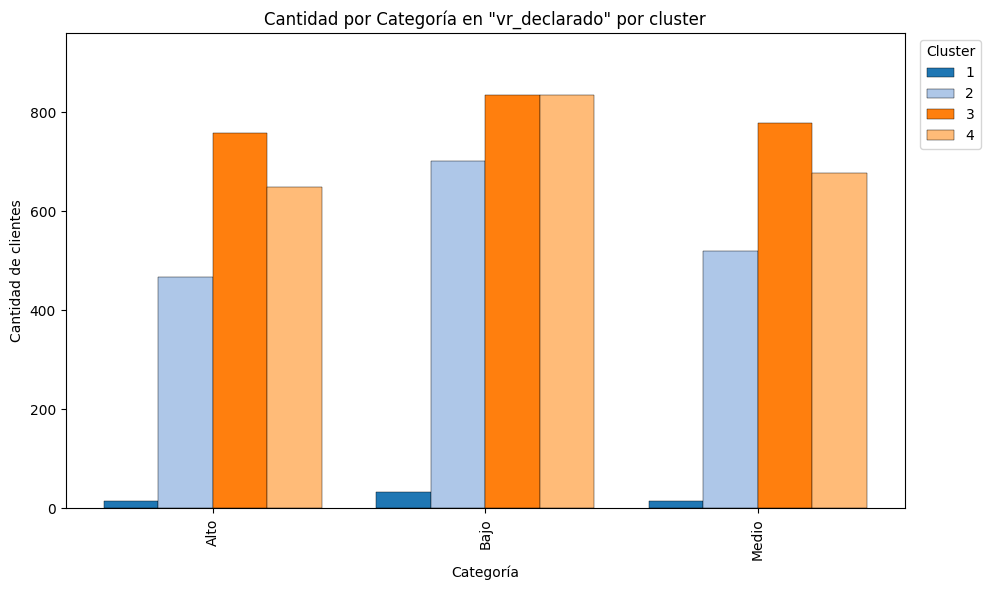

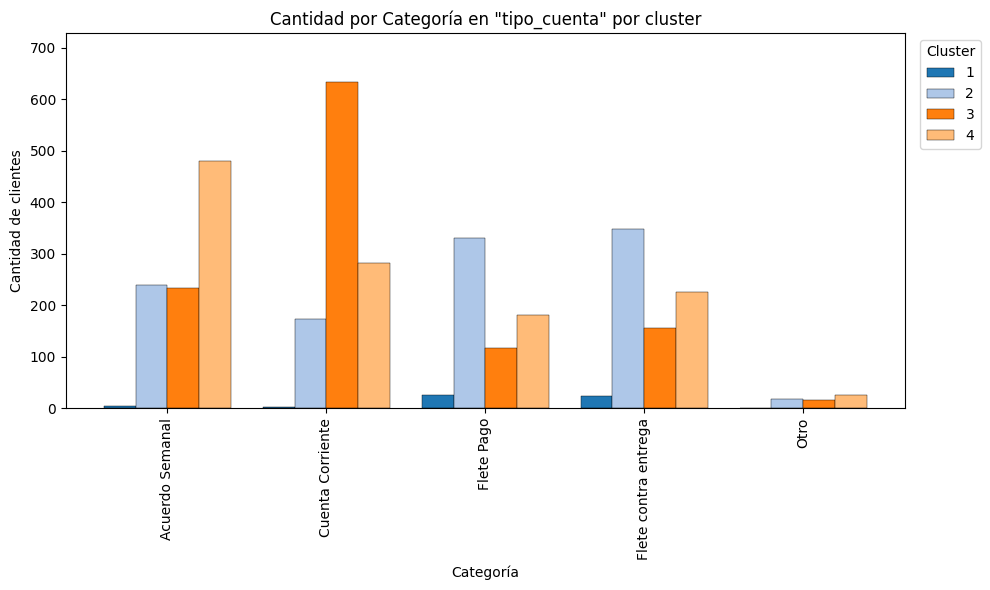

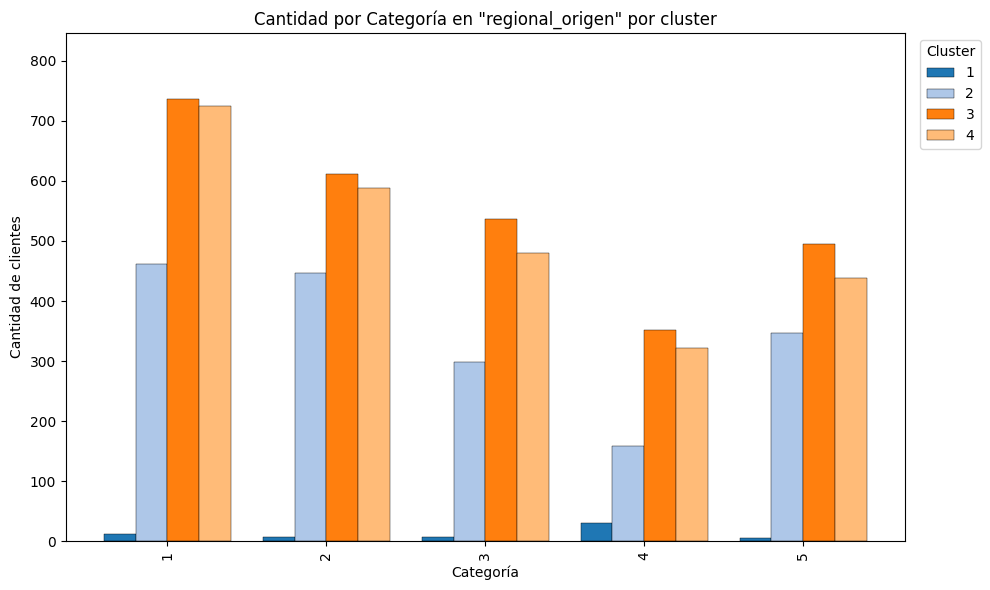

In [267]:
plot_categories_by_cluster(df_hdbscan_res, columns_ssc)

In [268]:
summary_cluster = df_hdbscan_res.groupby('cluster').mean()

In [269]:
summary_cluster[loadings['PC1'].sort_values(ascending=False).index.tolist()[:8]]

unidad/guia  Producto_Mercancia  vr_declarado_Alto  devolucion_No  \
cluster                                                                      
1           1.095732            0.124732           0.142624       0.963908   
2           1.486666            0.261304           0.230627       0.960001   
3           1.715468            0.342170           0.301327       0.950668   
4           1.534755            0.290503           0.269884       0.918870   

         Producto_Radicación de Documentos  Producto_Mercancia XL  \
cluster                                                             
1                                 0.000000               0.007319   
2                                 0.010003               0.028482   
3                                 0.020339               0.055613   
4                                 0.008484               0.035710   

         tipo_cuenta_Cuenta Corriente    RCE_No  
cluster                                          
1                            0.083333  0.956791  
2                            0.200692  0.959845  
3                            0.587037  0.977086  
4                            0.262372  0.941656

In [270]:
summary_cluster[loadings['PC1'].sort_values(ascending=False).index.tolist()[-8:]]

CPS_A tiempo  regional_origen_4  regional_origen_1  \
cluster                                                       
1            0.513578           0.746945           0.087652   
2            0.554991           0.043962           0.299054   
3            0.505676           0.062552           0.360186   
4            0.511338           0.074109           0.388427   

         Producto_Paqueteo 3-5 Kl.    RCE_Si  tipo_cuenta_Acuerdo Semanal  \
cluster                                                                     
1                         0.086174  0.043209                     0.111111   
2                         0.138872  0.040155                     0.276817   
3                         0.158828  0.022914                     0.216667   
4                         0.128301  0.058344                     0.448179   

         vr_declarado_Bajo  Producto_Paquetes 1-2 Kl. (ME)  
cluster                                                     
1                 0.682323                        0.719684  
2                 0.512576                        0.514005  
3                 0.399785                        0.324946  
4                 0.464782                        0.465814

In [271]:
summary_cluster[loadings['PC2'].sort_values(ascending=False).index.tolist()[:7]]

unidad/guia  vr_declarado_Bajo  Producto_Paquetes 1-2 Kl. (ME)  \
cluster                                                                   
1           1.095732           0.682323                        0.719684   
2           1.486666           0.512576                        0.514005   
3           1.715468           0.399785                        0.324946   
4           1.534755           0.464782                        0.465814   

         Producto_Radicación de Documentos  tipo_cuenta_Acuerdo Semanal  \
cluster                                                                   
1                                 0.000000                     0.111111   
2                                 0.010003                     0.276817   
3                                 0.020339                     0.216667   
4                                 0.008484                     0.448179   

         regional_origen_4    RCE_Si  
cluster                               
1                 0.746945  0.043209  
2                 0.043962  0.040155  
3                 0.062552  0.022914  
4                 0.074109  0.058344

In [272]:
summary_cluster[loadings['PC2'].sort_values(ascending=False).index.tolist()[-7:]]

Producto_Paqueteo 3-5 Kl.  devolucion_No  Producto_Mercancia XL  \
cluster                                                                    
1                         0.086174       0.963908               0.007319   
2                         0.138872       0.960001               0.028482   
3                         0.158828       0.950668               0.055613   
4                         0.128301       0.918870               0.035710   

         tipo_cuenta_Cuenta Corriente  vr_declarado_Alto  Producto_Mercancia  \
cluster                                                                        
1                            0.083333           0.142624            0.124732   
2                            0.200692           0.230627            0.261304   
3                            0.587037           0.301327            0.342170   
4                            0.262372           0.269884            0.290503   

         Producto_Mercancia Aerea  
cluster                            
1                        0.000000  
2                        0.000810  
3                        0.002261  
4                        0.001130

In [164]:
all_results, significant = mann_whitney_by_cluster(
    df_hdbscan_res,
    cluster_col="cluster",
    c1=1,
    c2=2
)

significant

variable        pvalue  cliff_delta    pvalue_adj  \
3        CPS_Oportunidad de mejora  7.003689e-03     0.257914  4.124395e-02   
8               Producto_Mercancia  4.466922e-04    -0.334359  5.918672e-03   
13  Producto_Paquetes 1-2 Kl. (ME)  1.655997e-03     0.306068  1.752695e-02   
43          tipo_cuenta_Flete Pago  6.701790e-05     0.345220  1.183983e-03   
46                     unidad/guia  2.314880e-03    -0.268166  1.752695e-02   
48               regional_origen_1  2.004665e-03    -0.286236  1.752695e-02   
49               regional_origen_2  4.525258e-05    -0.374087  1.183983e-03   
51               regional_origen_4  1.176512e-28     0.775952  6.235513e-27   
52               regional_origen_5  5.106369e-03    -0.241702  3.382969e-02   

    significant  
3          True  
8          True  
13         True  
43         True  
46         True  
48         True  
49         True  
51         True  
52         True

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


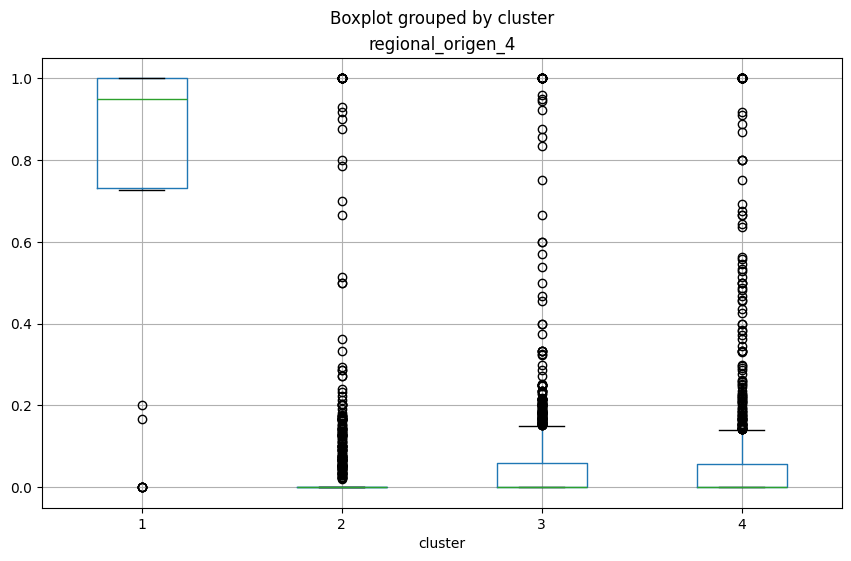

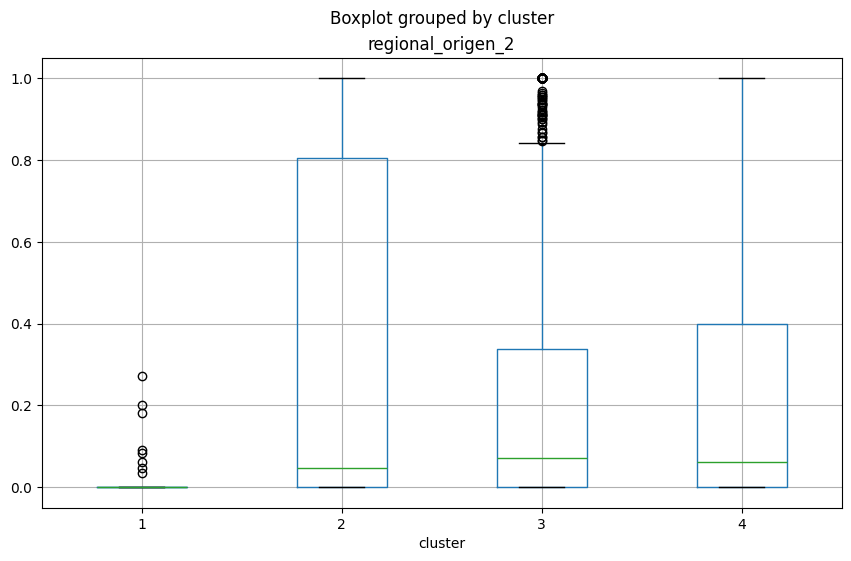

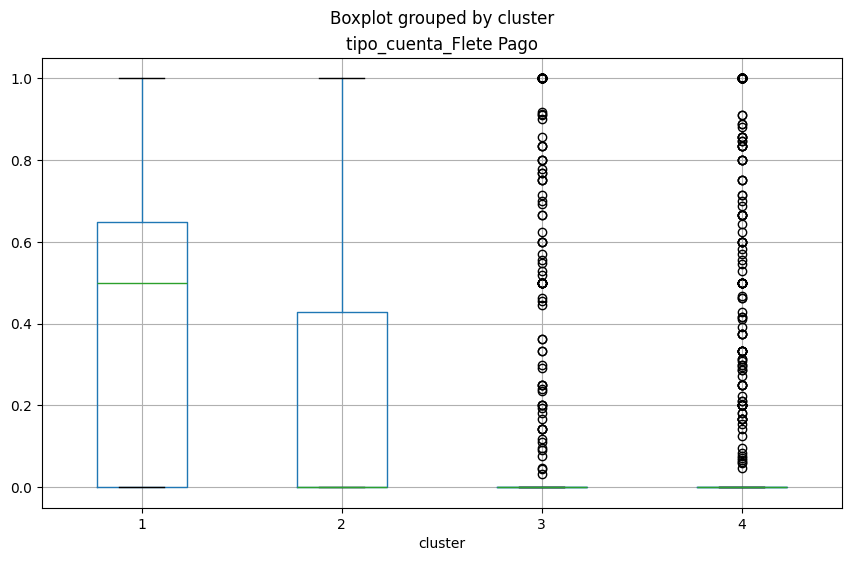

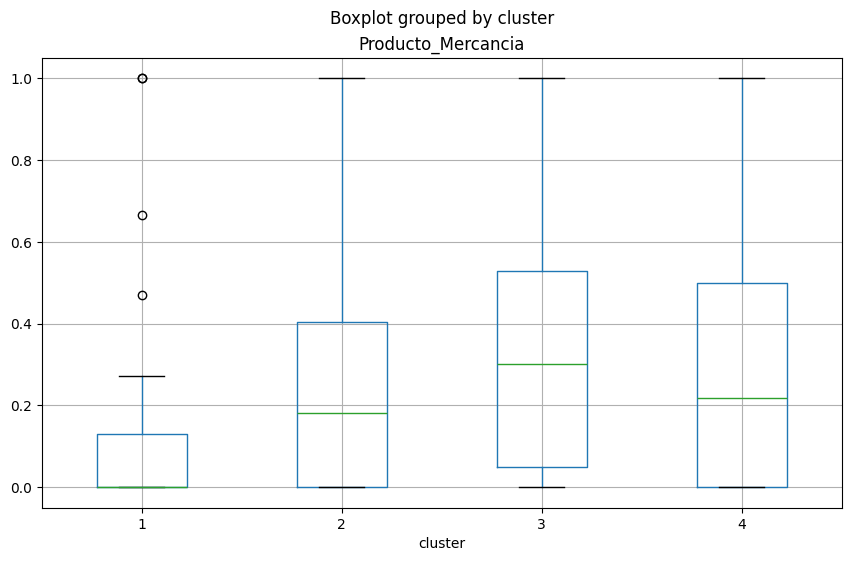

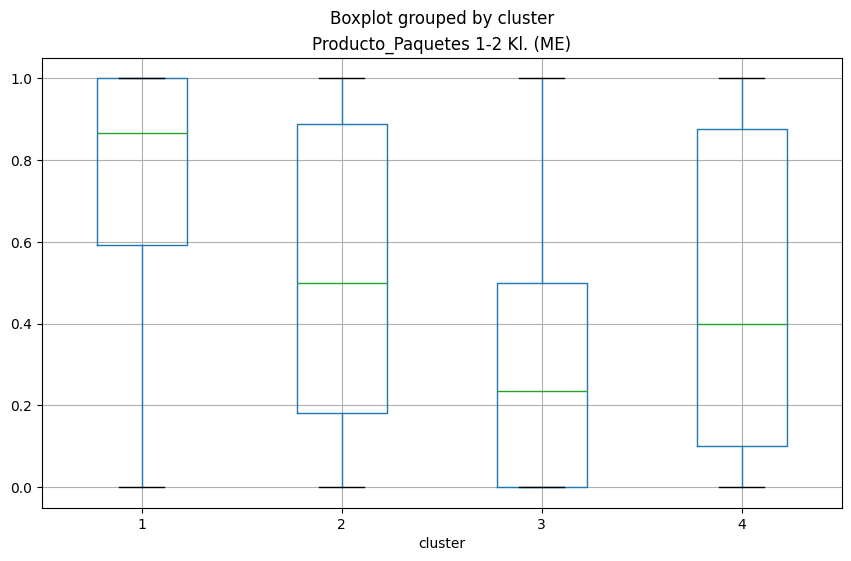

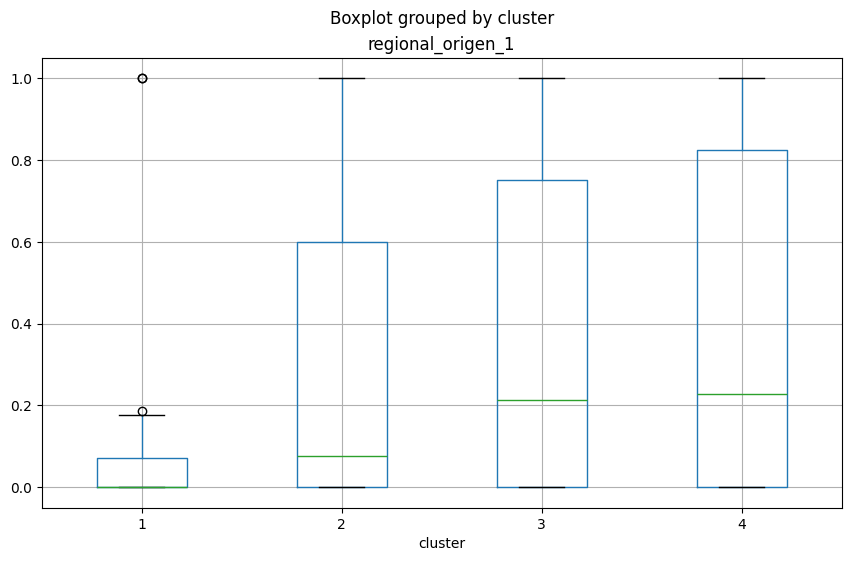

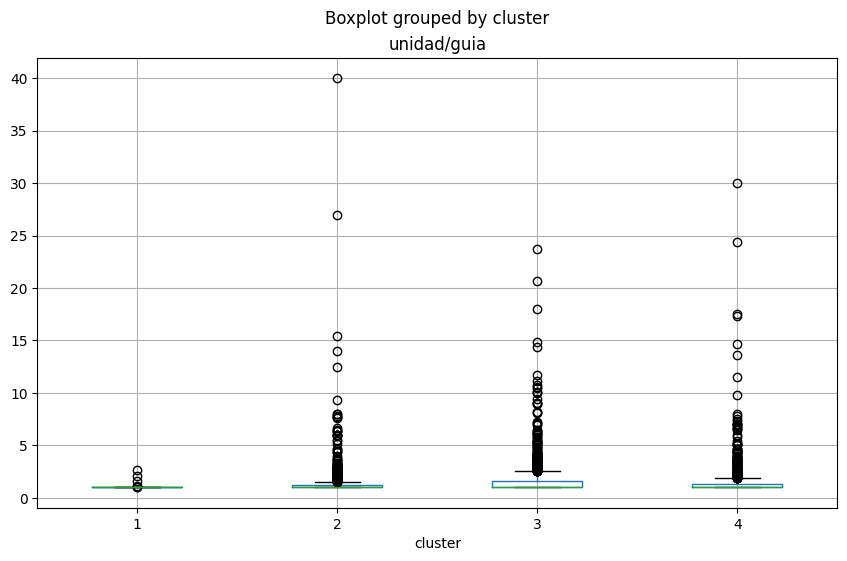

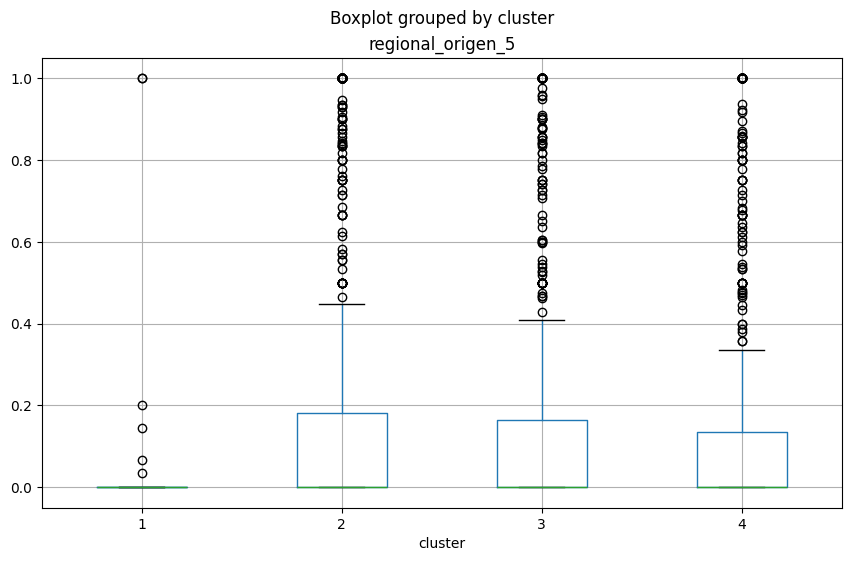

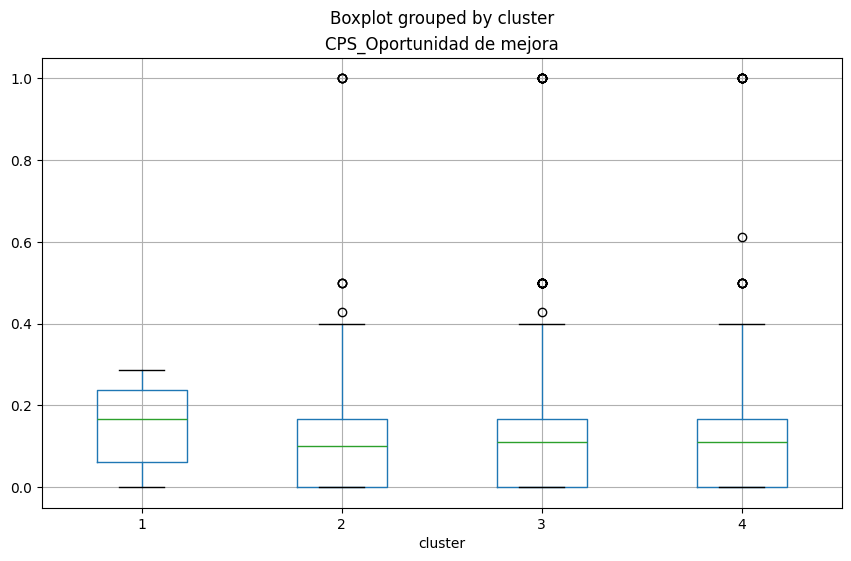

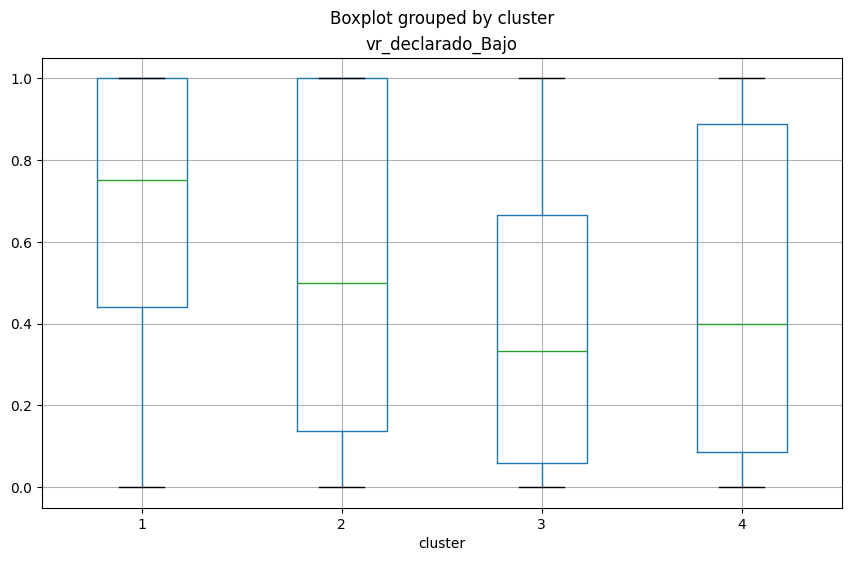

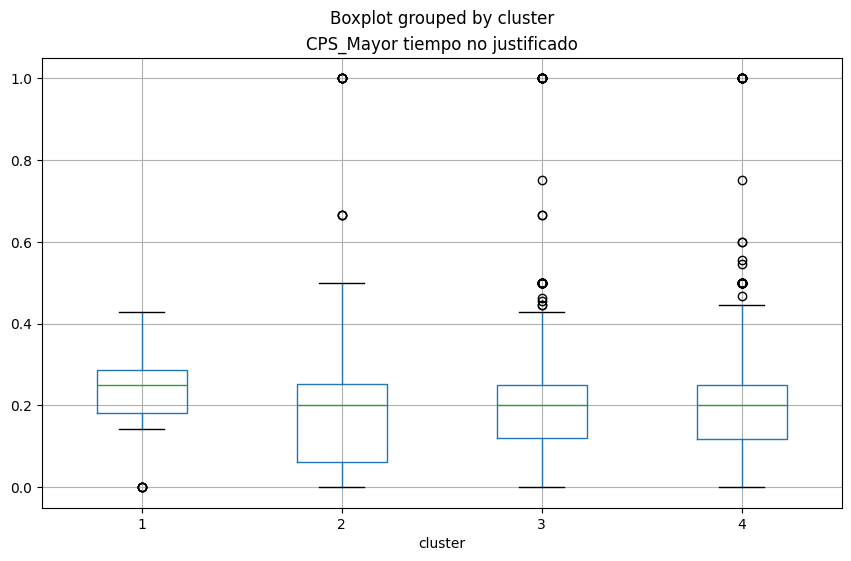

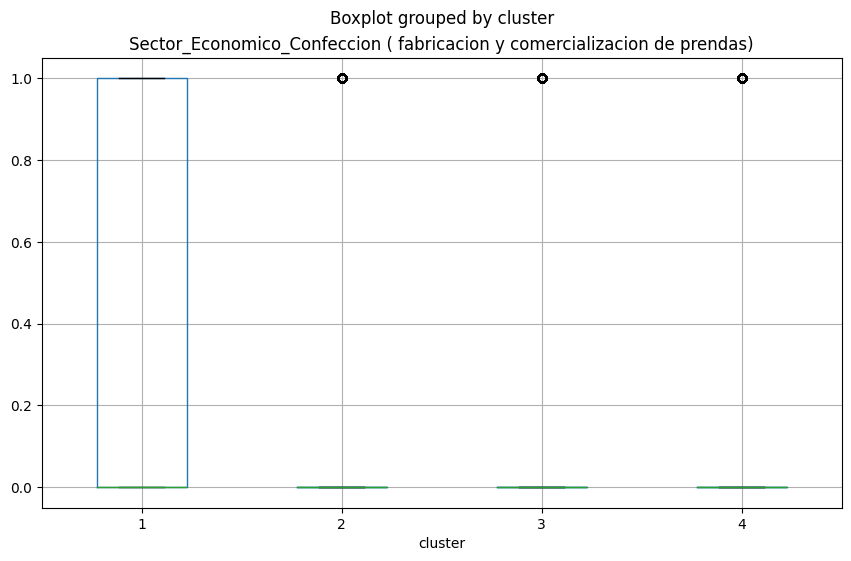

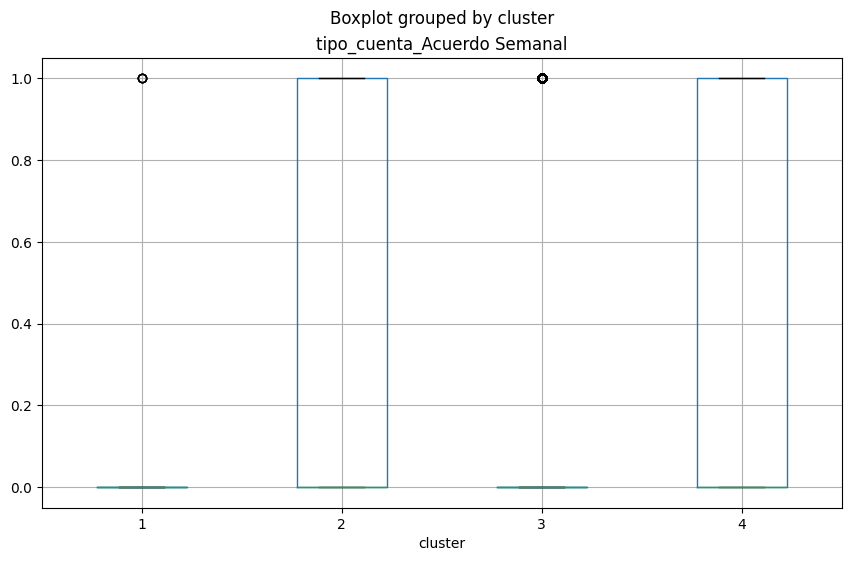

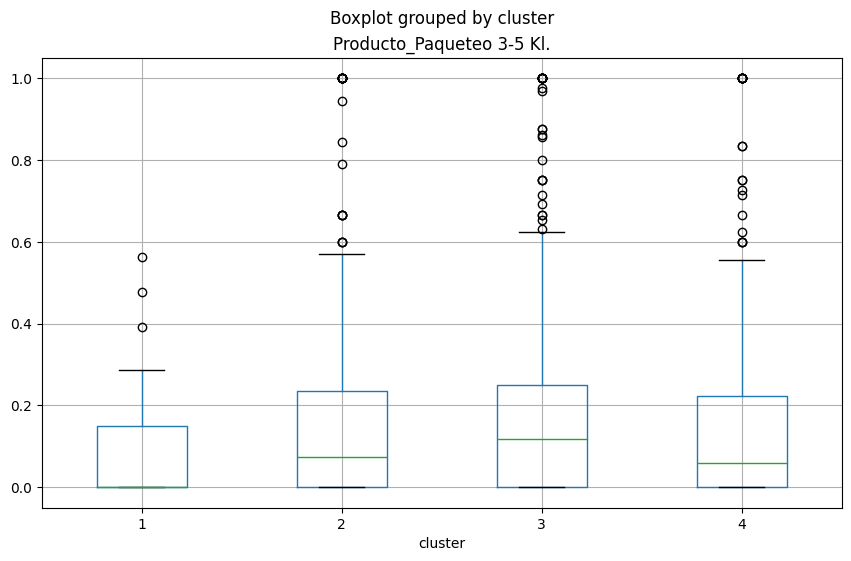

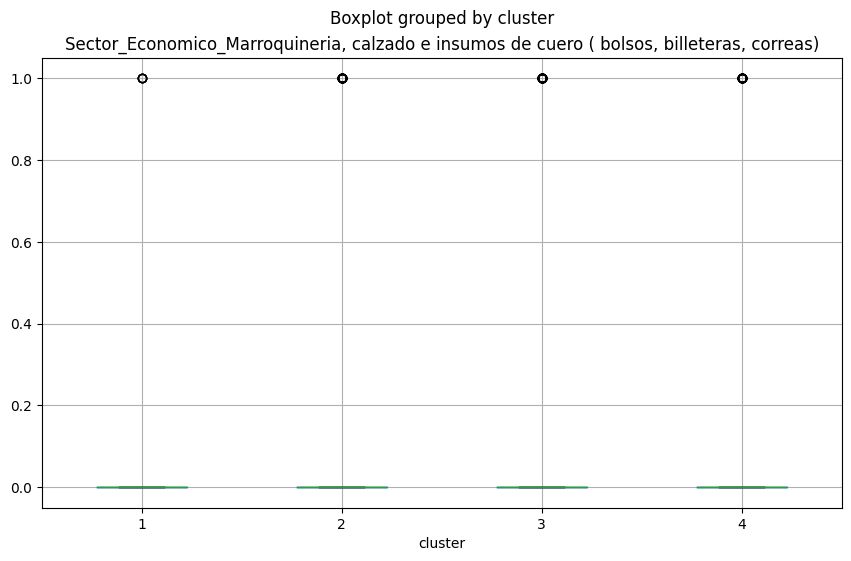

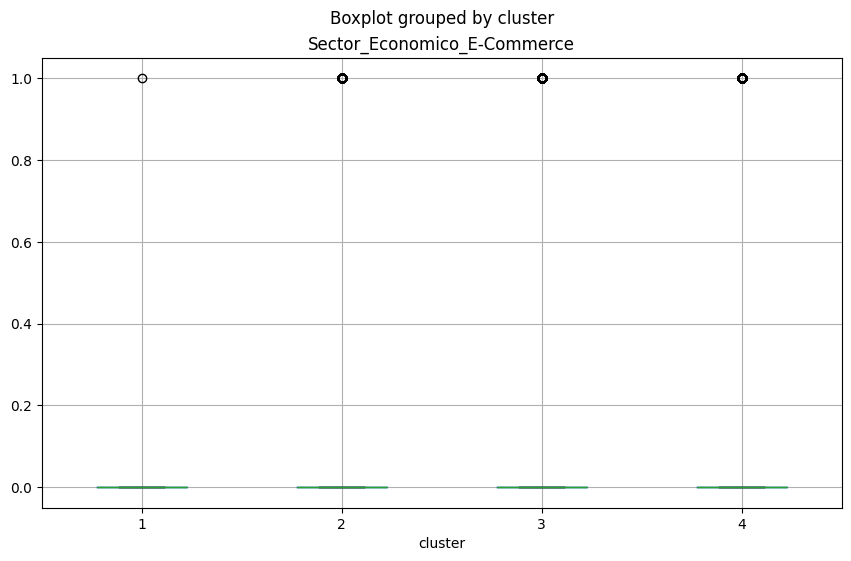

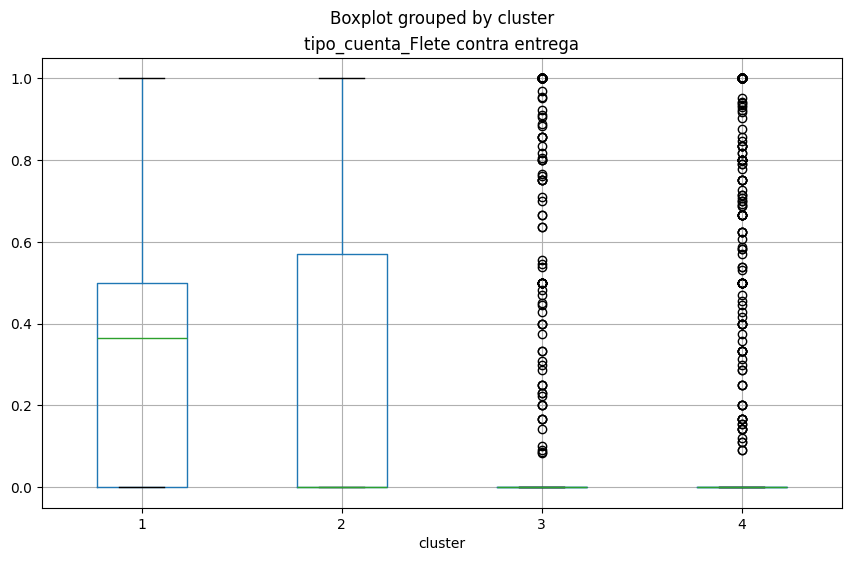

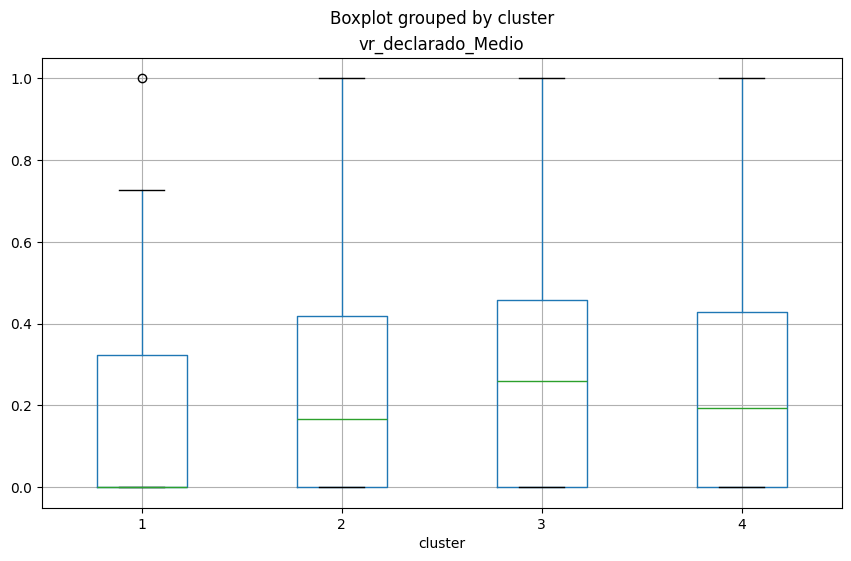

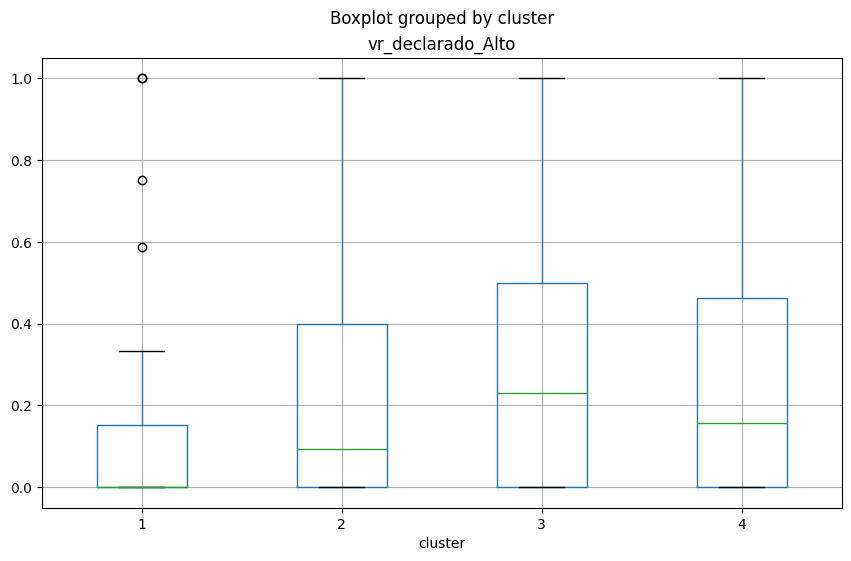

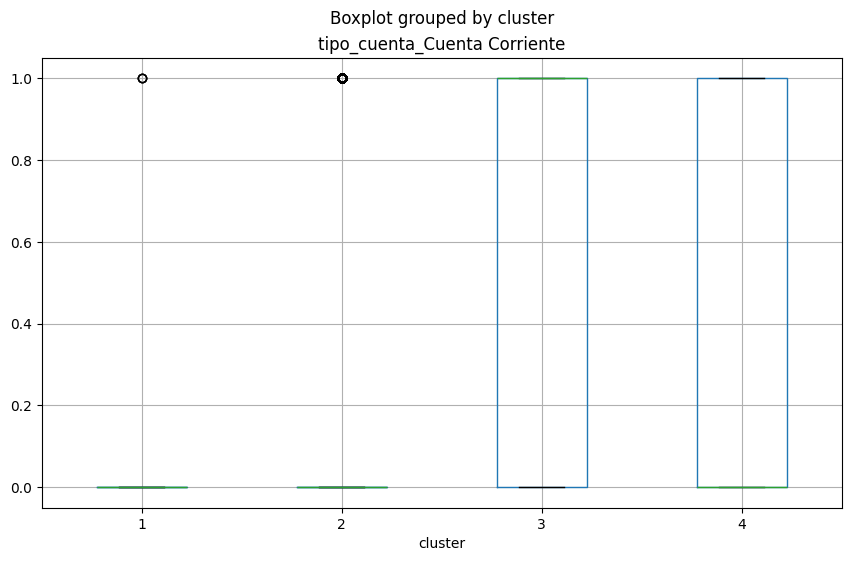

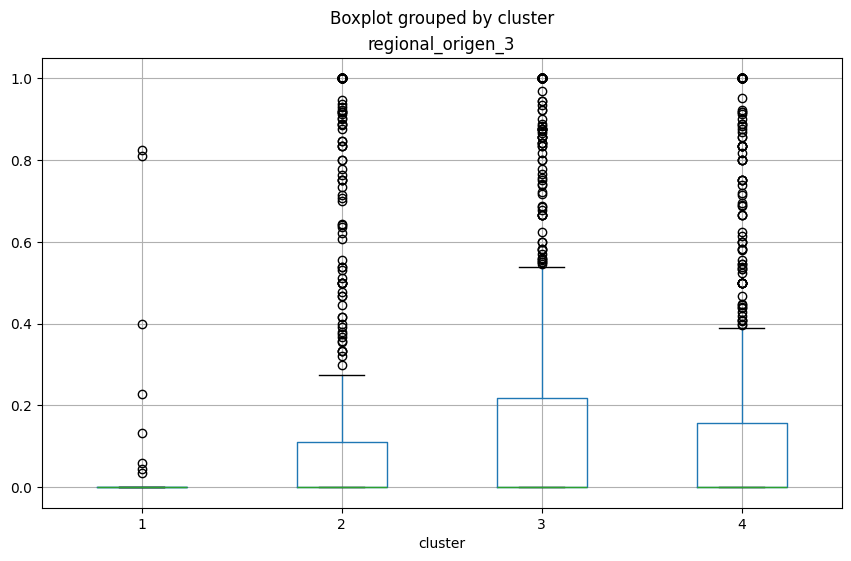

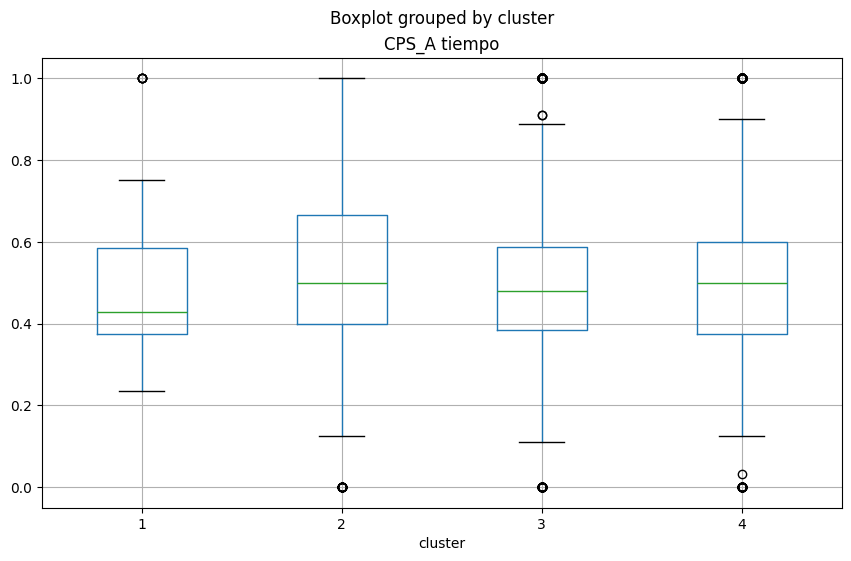

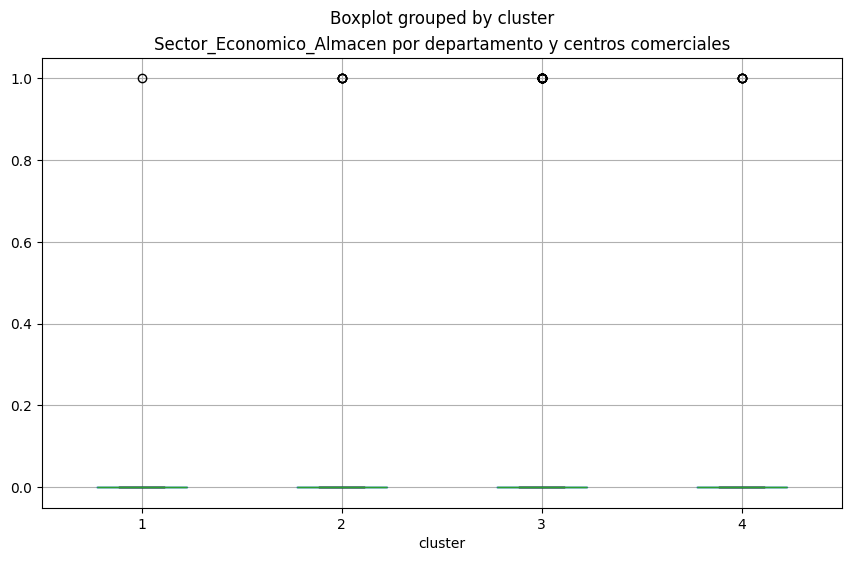

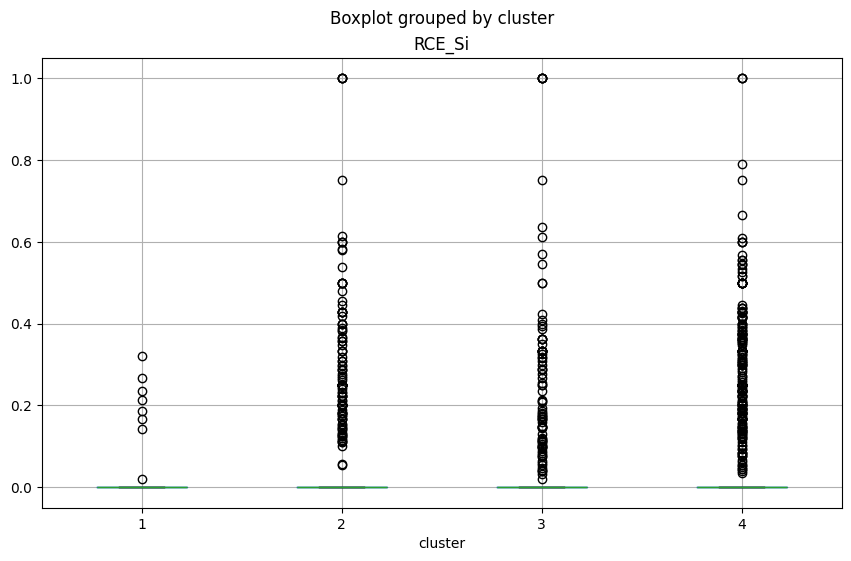

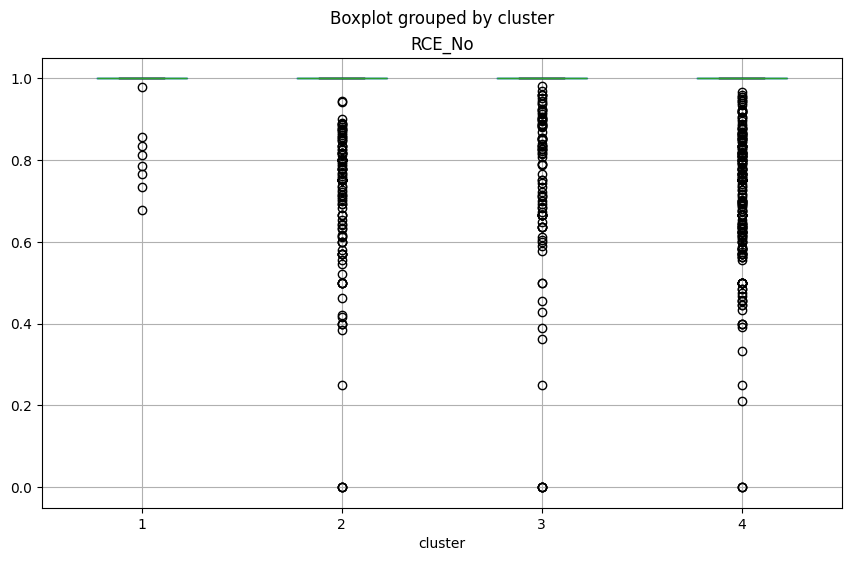

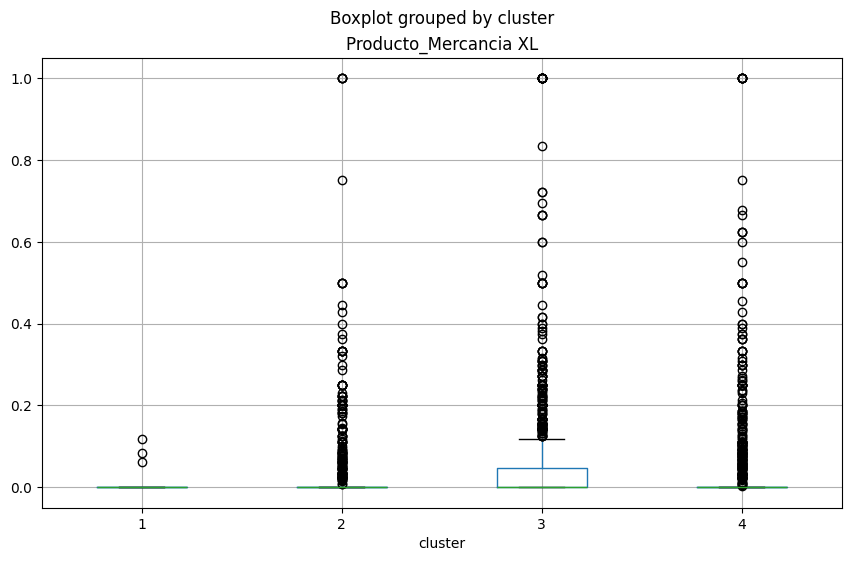

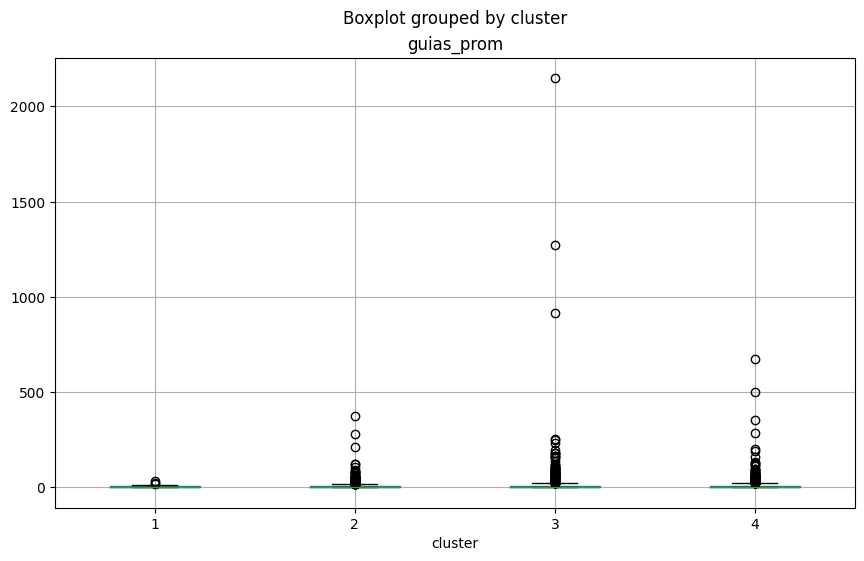

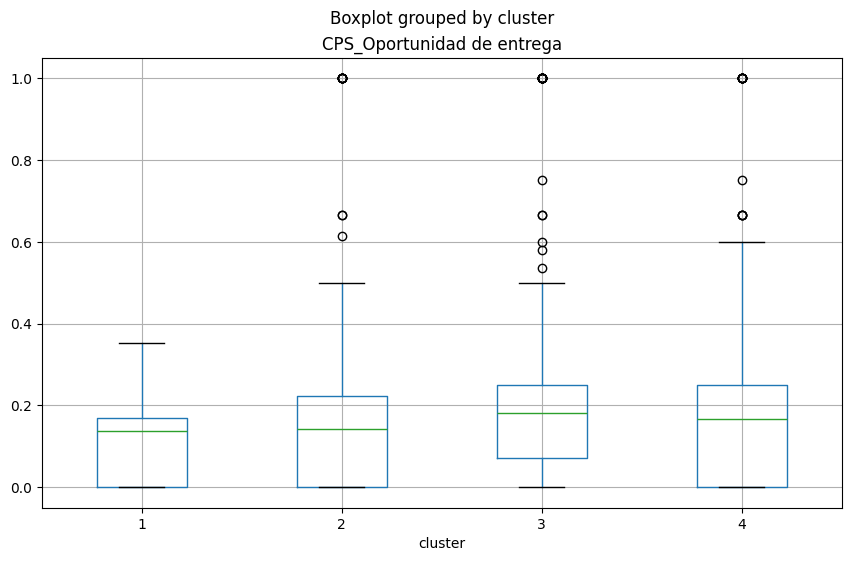

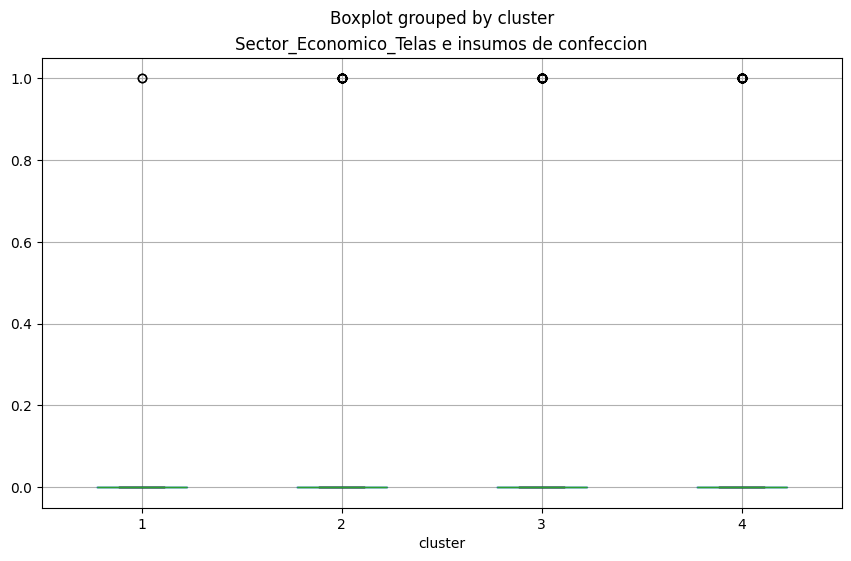

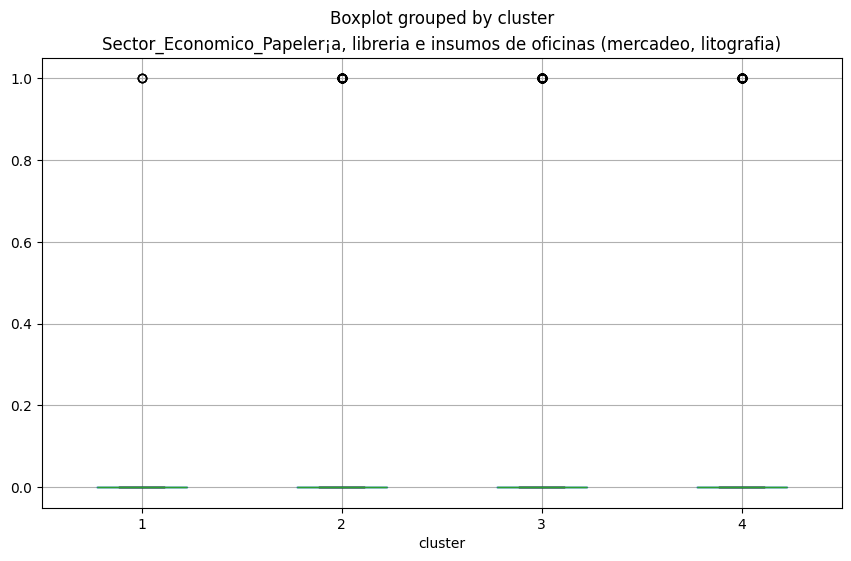

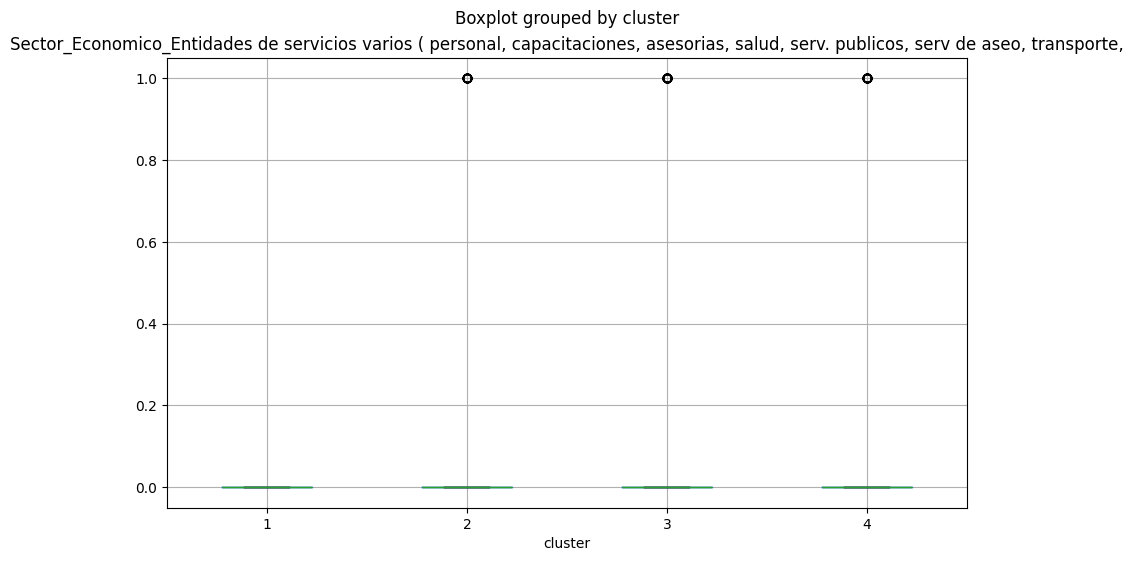

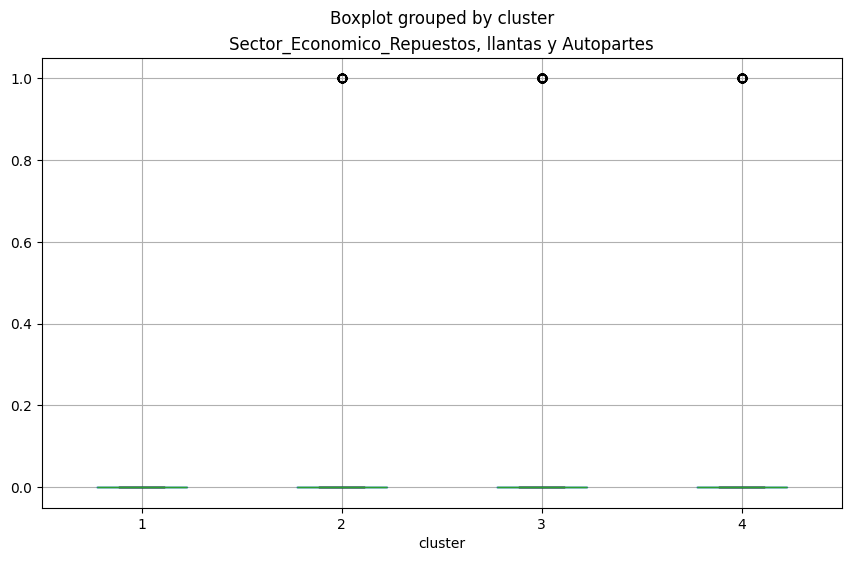

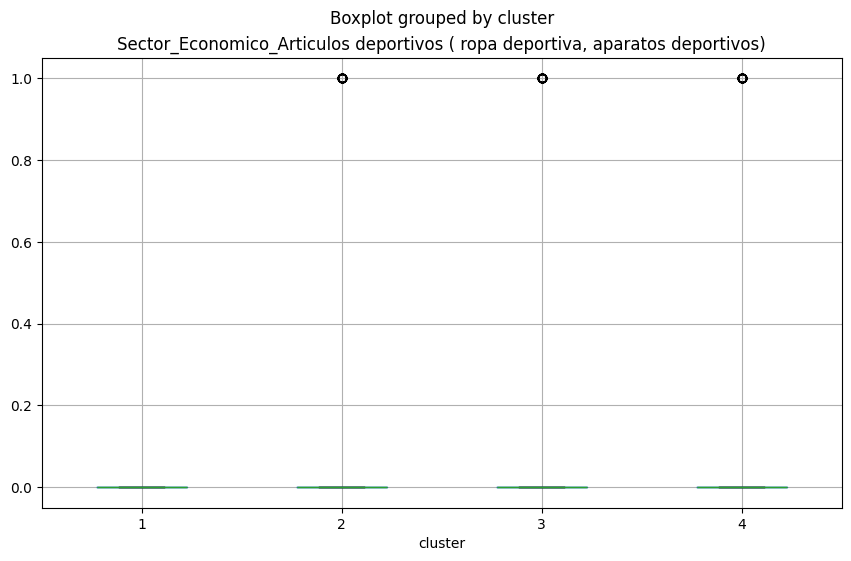

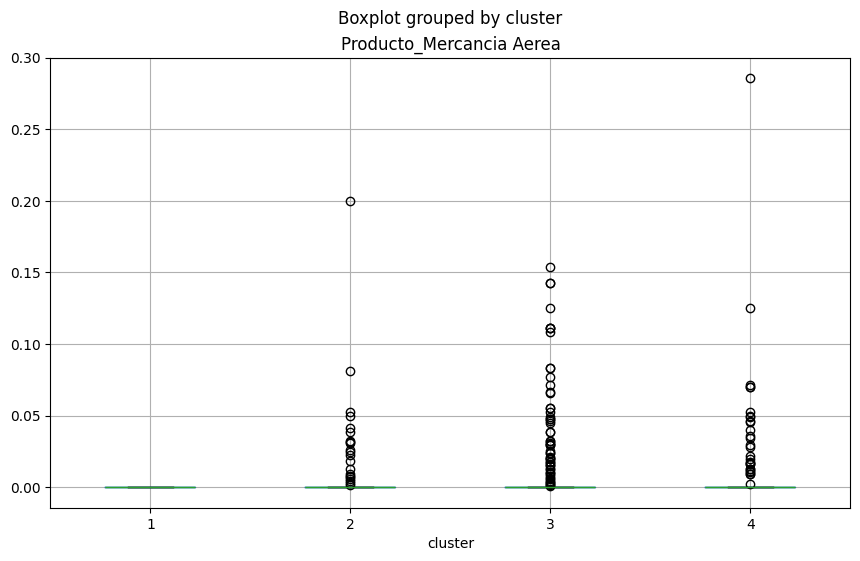

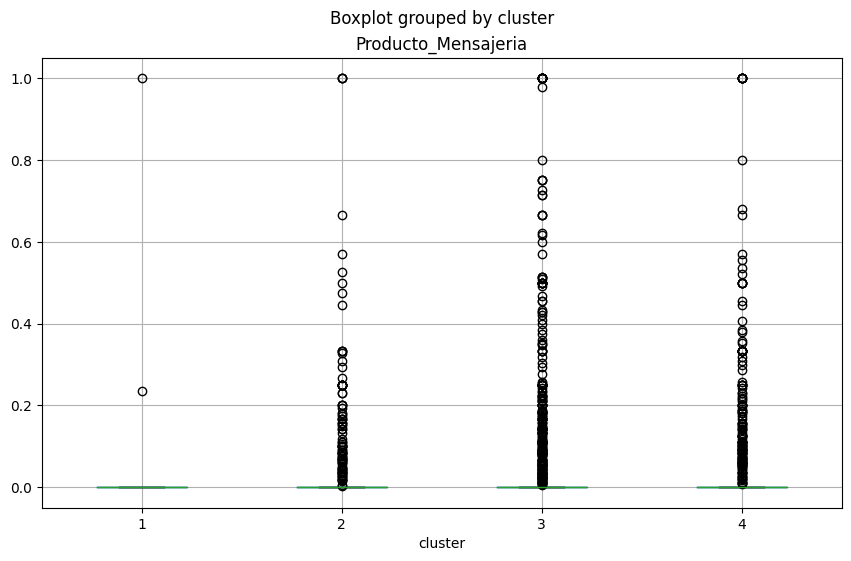

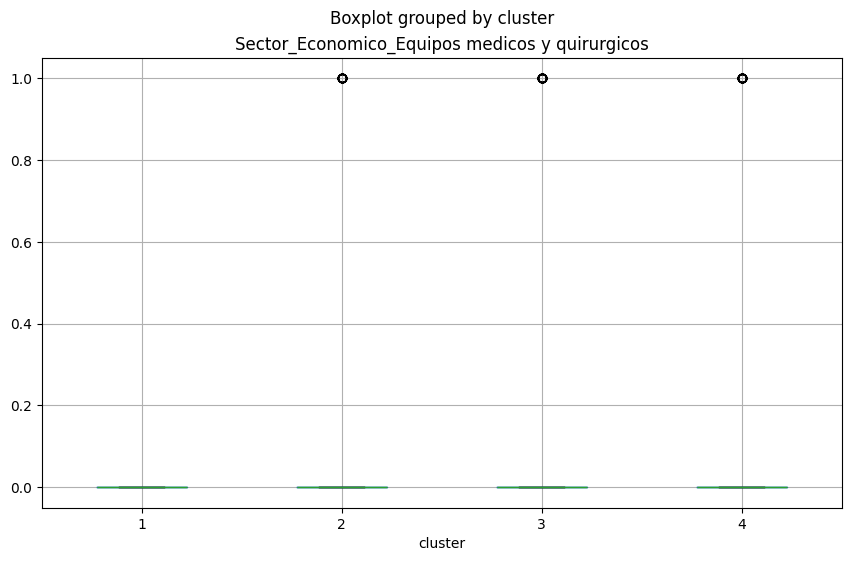

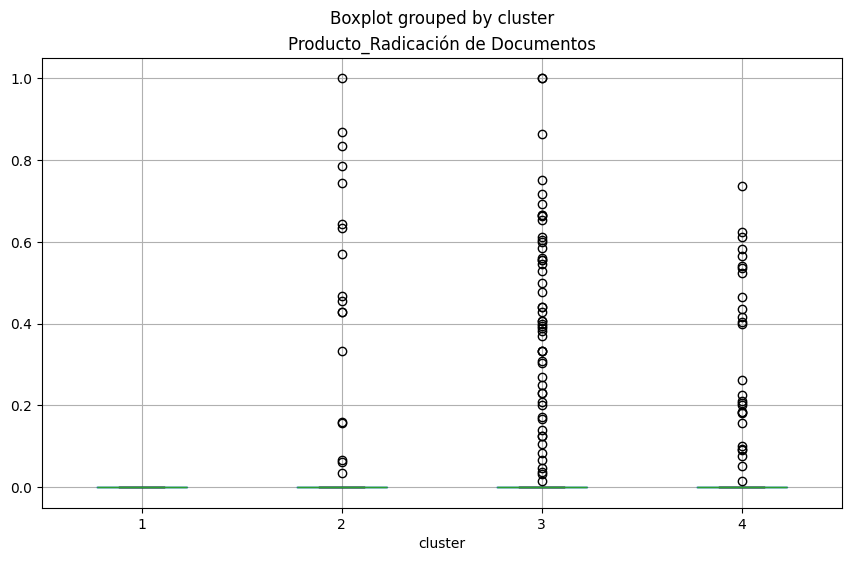

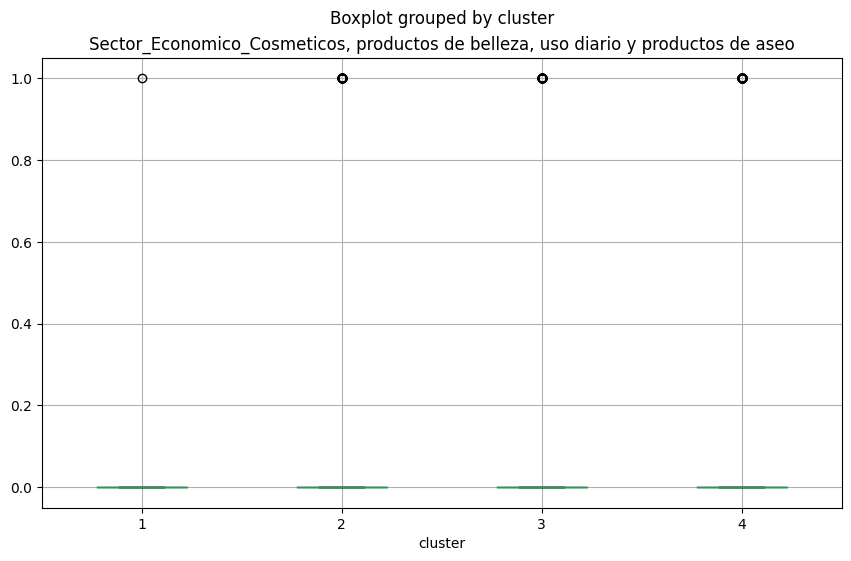

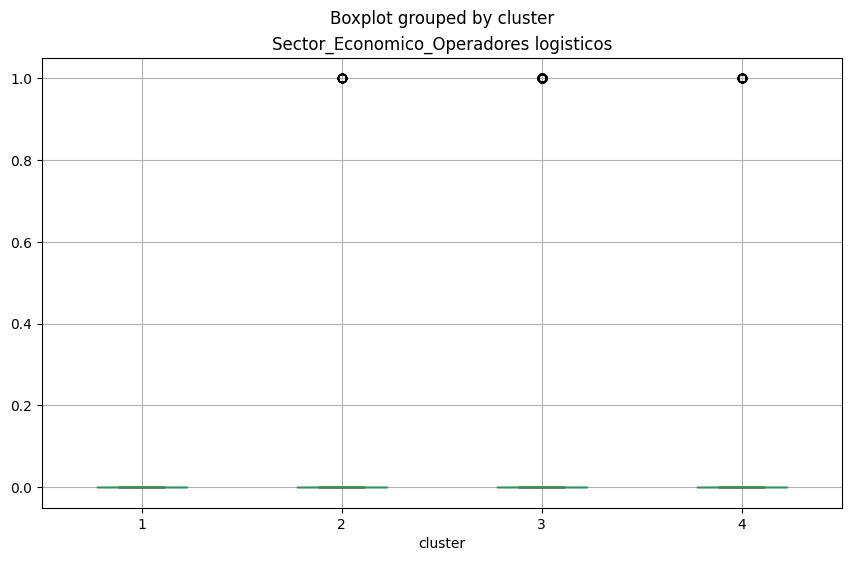

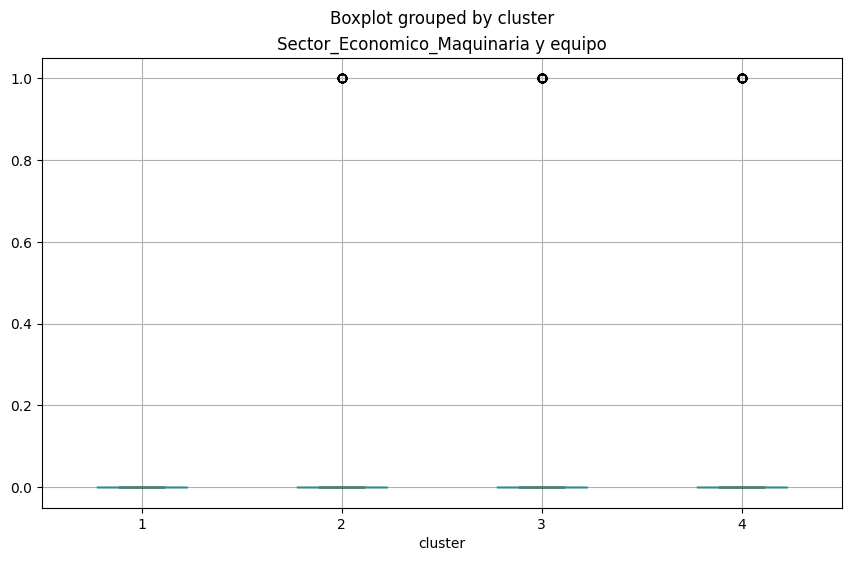

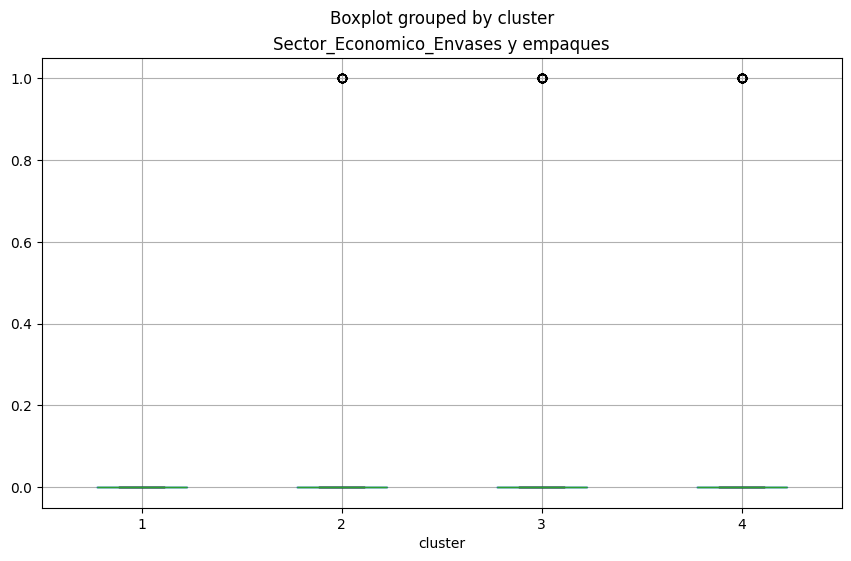

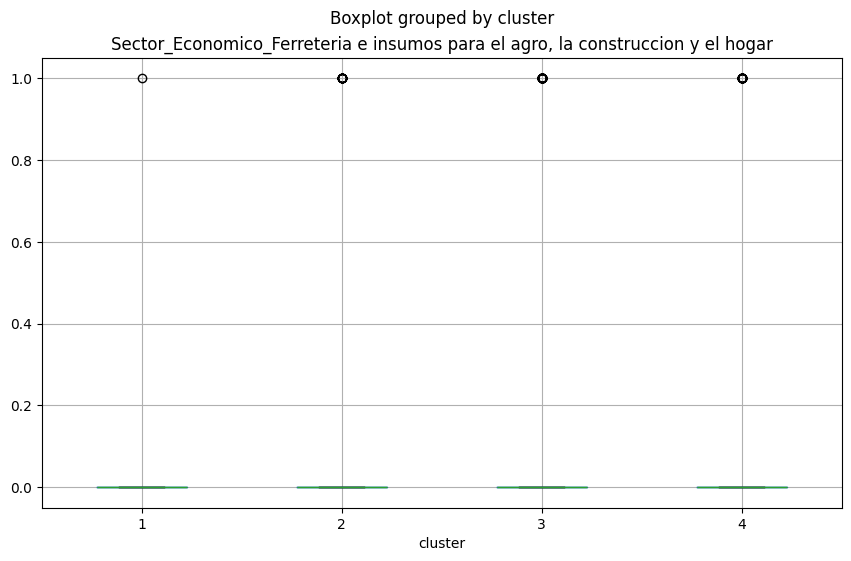

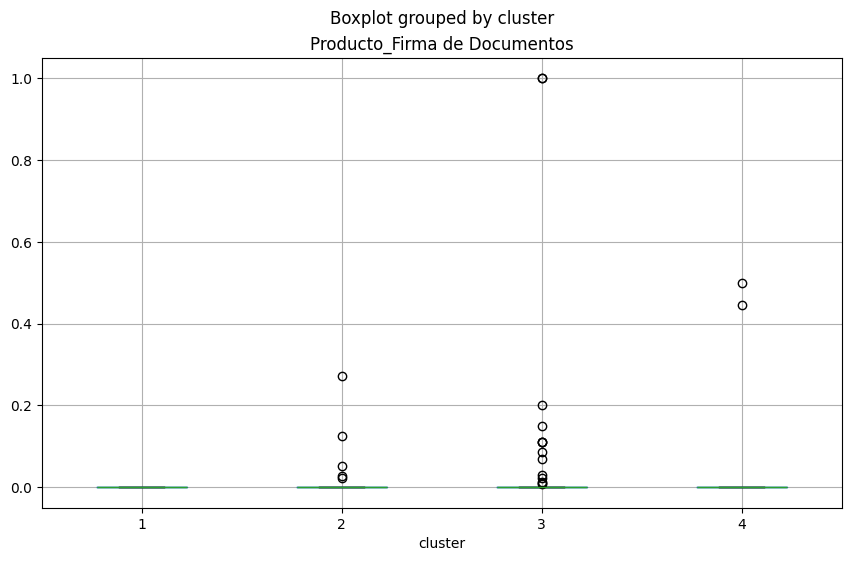

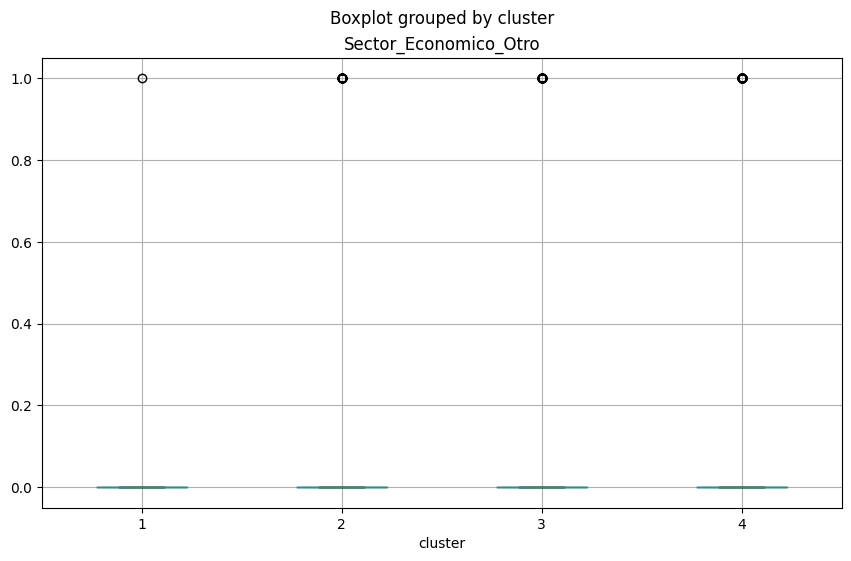

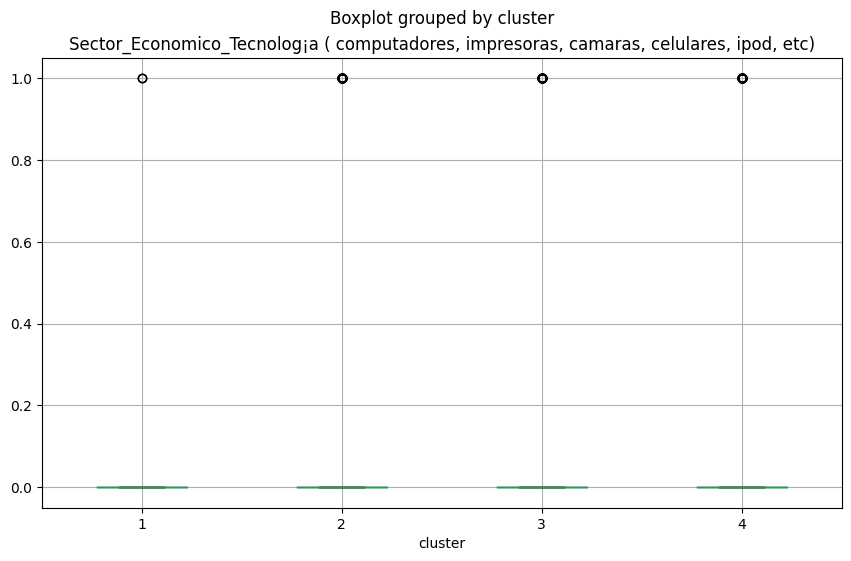

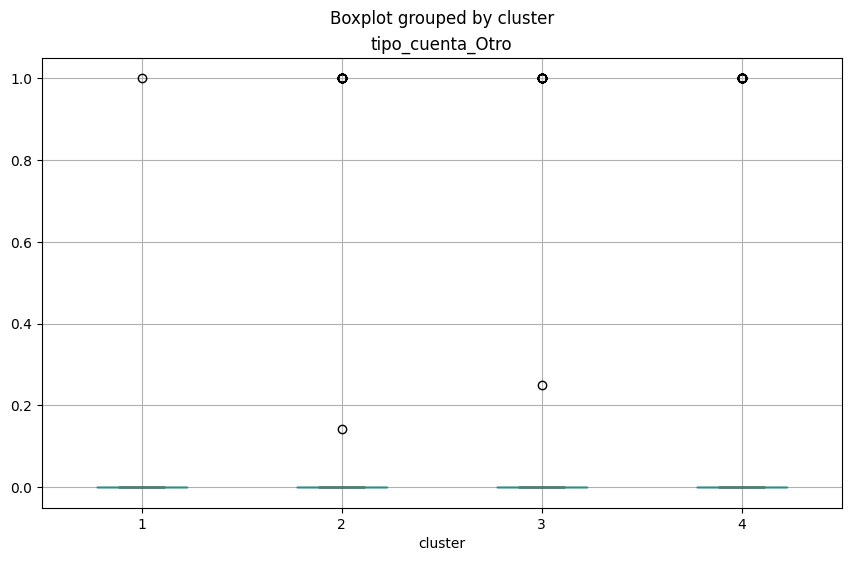

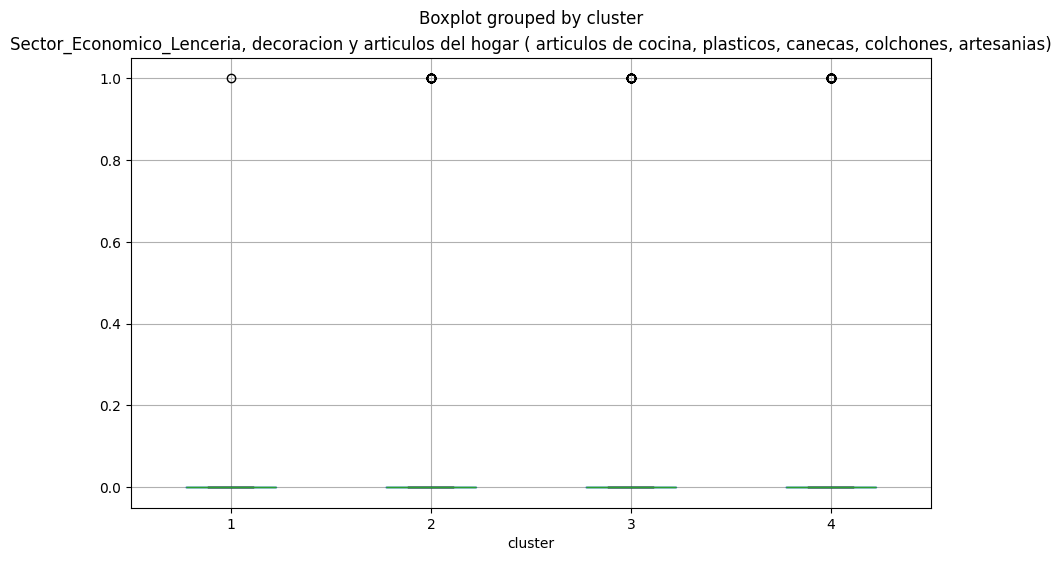

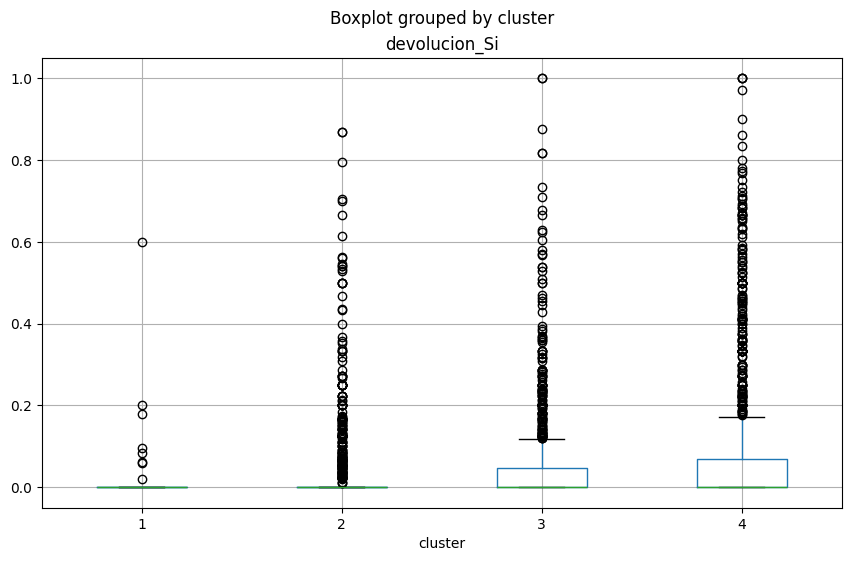

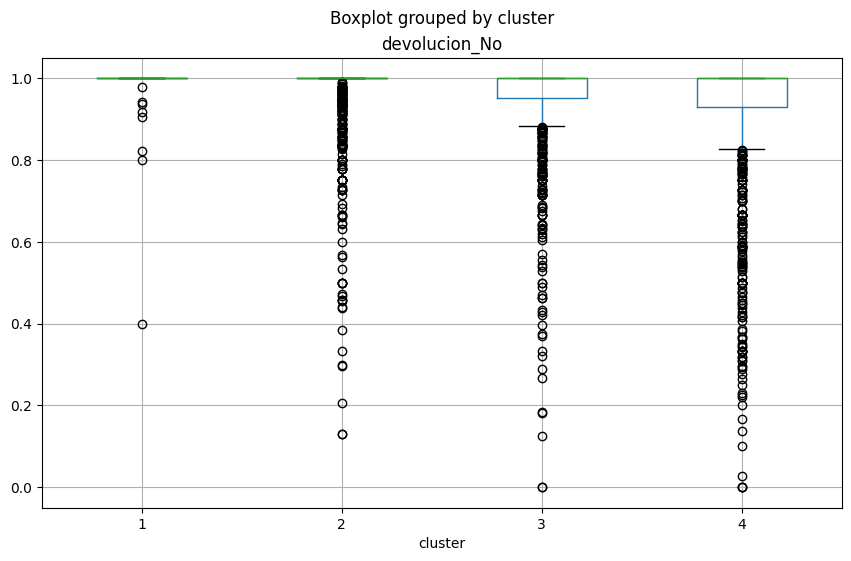

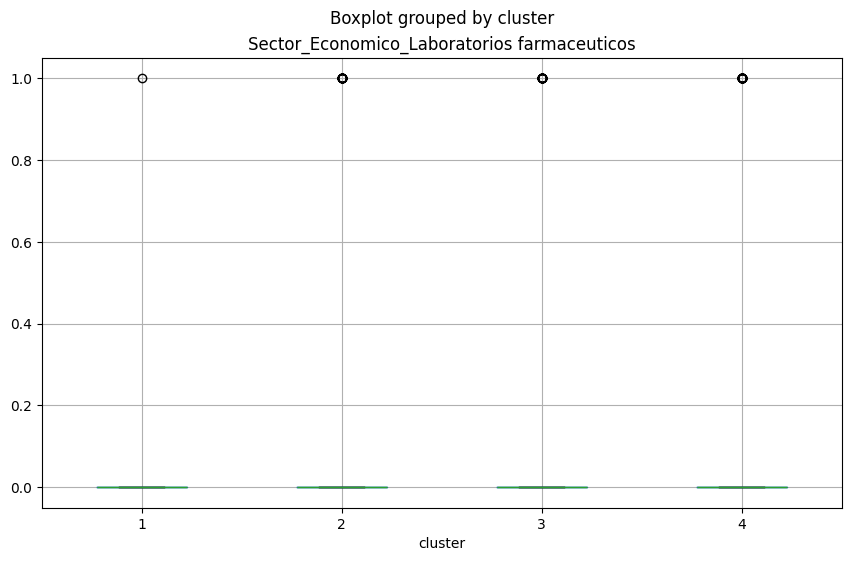

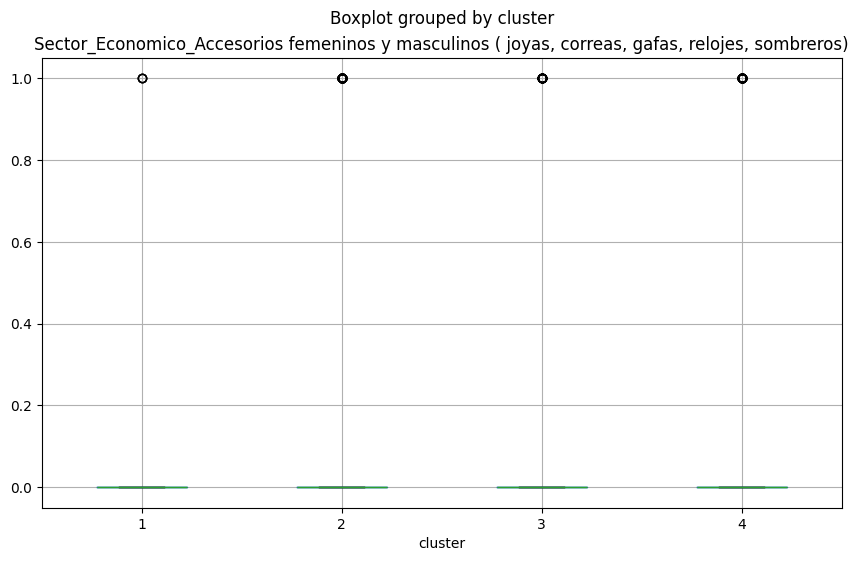

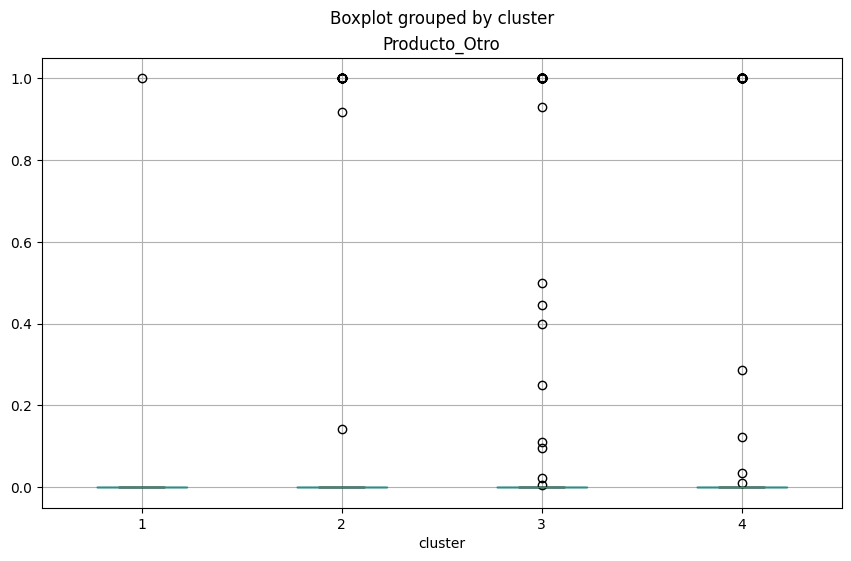

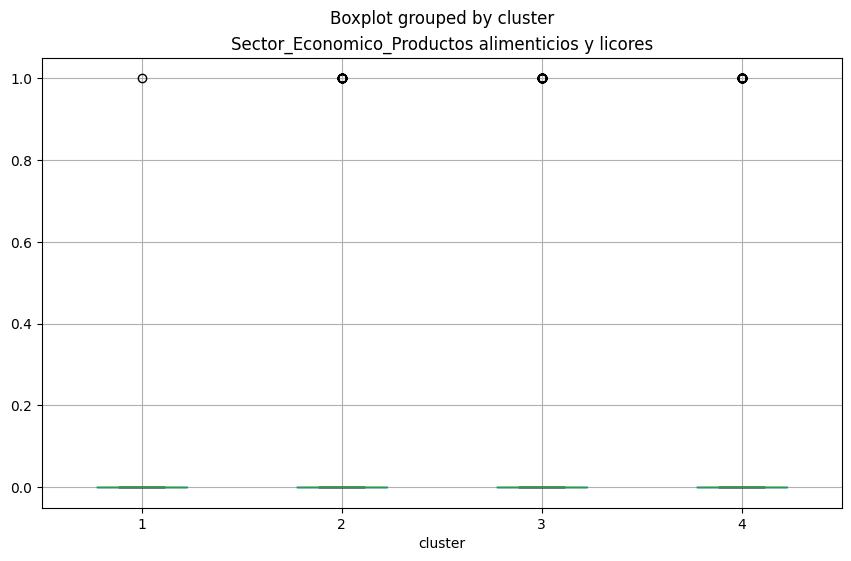

In [165]:
summary_1_2 = summary_dif( df_hdbscan_res, all_results['variable'].tolist(), 1, 2, [3, 4])

## 4. Síntesis y Datos Atípicos

Se categorizan los clientes según los clusters obtenidos en los 3 casos previos. Se hace una nueva clusterización con clusters densos y datos atípicos

In [344]:
clusters2 = df_hdbscan2[~df_hdbscan2['cluster'].isin([0])]

In [345]:
data_clusterizada = data_clustering.copy()

data_clusterizada = data_clusterizada.loc[:, data_clusterizada.columns[~data_clusterizada.columns.str.contains('Sector_Economico')]]

data_clusterizada['cluster'] = '-1'

In [346]:
data_clusterizada.loc[df_hdbscan_res.index, 'cluster'] = (
    df_hdbscan_res['cluster'].astype(str) + '_Res'
)


In [347]:
data_clusterizada.loc[clusters2[clusters2['cluster']!=-1].index, 'cluster'] = clusters2['cluster'].astype(str) + '_C2'

In [348]:
data_clusterizada.loc[data_top400.index, 'cluster'] = (
    data_top400['cluster'].astype(str) + '_PC'
)

In [349]:
np.unique(data_clusterizada['cluster'], return_counts=True)

(array(['-1', '0_PC', '1_C2', '1_PC', '1_Res', '2_C2', '2_PC', '2_Res',
        '3_C2', '3_PC', '3_Res', '4_C2', '4_PC', '4_Res'], dtype=object),
 array([3549,  210,   54,  140,   36,   51,   12,  856,   70,   11, 1074,
         110,   27, 1059], dtype=int64))

#### Clientes Clusters Pocas Guías

In [350]:
np.unique(df_hdbscan_res['cluster'], return_counts=True)

(array([1, 2, 3, 4], dtype=int64),
 array([  36,  867, 1080, 1071], dtype=int64))

In [351]:
np.unique(data_clusterizada['cluster'][data_clusterizada['cluster'].str.contains('_Res')], return_counts=True)

(array(['1_Res', '2_Res', '3_Res', '4_Res'], dtype=object),
 array([  36,  856, 1074, 1059], dtype=int64))

#### Clientes Principales

In [352]:
np.unique(data_top400['cluster'], return_counts=True)

(array([0, 1, 2, 3, 4], dtype=int64),
 array([210, 140,  12,  11,  27], dtype=int64))

In [353]:
np.unique(data_clusterizada['cluster'][data_clusterizada['cluster'].str.contains('_PC')], return_counts=True)

(array(['0_PC', '1_PC', '2_PC', '3_PC', '4_PC'], dtype=object),
 array([210, 140,  12,  11,  27], dtype=int64))

#### Clientes Tipos Producto Minoritario

In [354]:
np.unique(clusters2['cluster'], return_counts=True)

(array([-1,  1,  2,  3,  4], dtype=int64),
 array([1211,   54,   51,   70,  111], dtype=int64))

In [355]:
np.unique(data_clusterizada['cluster'][data_clusterizada['cluster'].str.contains('_C2')], return_counts=True)

(array(['1_C2', '2_C2', '3_C2', '4_C2'], dtype=object),
 array([ 54,  51,  70, 110], dtype=int64))

#### Datos por 2 Componentes Principales

In [356]:
data_clusterizada_pca = data_clusterizada.drop(columns='cluster')
data_clusterizada_ss = pd.DataFrame(ss.fit_transform(X=data_clusterizada_pca), index=data_clusterizada_pca.index,
                                    columns = data_clusterizada_pca.columns)

In [357]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_clusterizada_ss)

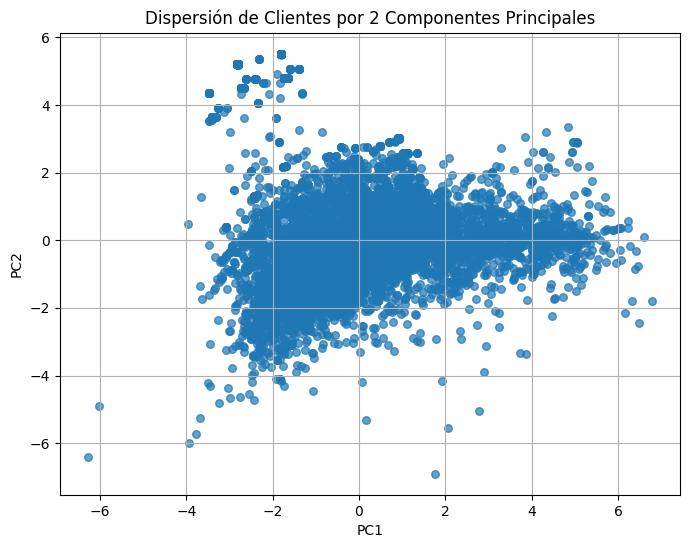

In [358]:
plt.figure(figsize=(8, 6))

plt.scatter(
    X_pca[:, 0],
    X_pca[:, 1],
    s=30,
    alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dispersión de Clientes por 2 Componentes Principales")
plt.grid(True)
plt.show()

In [359]:
pca.explained_variance_ratio_.sum()

0.20016618252209045

### Datos no Atípicos por 2 Componentes Principales

In [360]:
X_clusterizada_no_out = data_clusterizada_ss[data_clusterizada['cluster']!='-1']

In [361]:
pca_inliers = PCA(n_components=2)
X_pca_inliers = pca_inliers.fit_transform(X_clusterizada_no_out)

In [362]:
pca_inliers.explained_variance_ratio_.sum()

0.2250824584755144

In [363]:
labels_no_out = data_clusterizada[data_clusterizada['cluster']!='-1']['cluster']

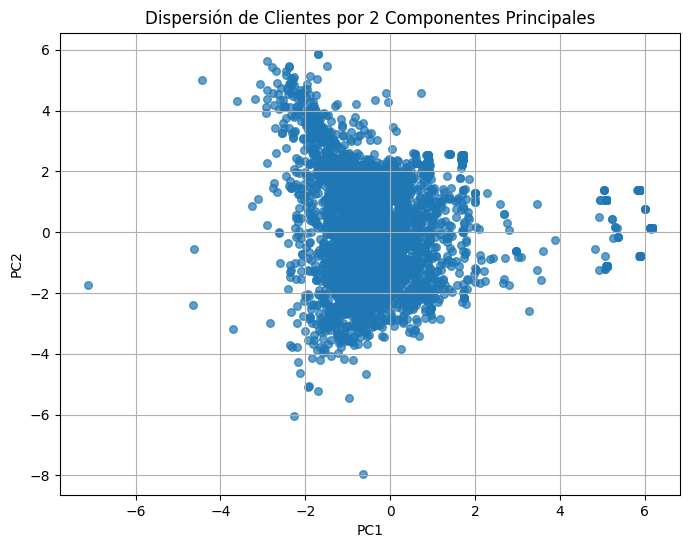

In [364]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_pca_inliers[:, 0],
    X_pca_inliers[:, 1],
    s=30,
    alpha=0.7)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dispersión de Clientes por 2 Componentes Principales")
plt.grid(True)
plt.show()

### Clusterización por Datos Atípicos

En este caso se omitió evitar multicolinealidad, es decir eliminar variables que aporten la misma información (por ejemplo devolucion_si y devolucion_no, como ambas suman siempre 1 puede omitirse una, el mismo caso para los tipos de cuenta, RCE, Regional de origen...). Esto da más peso a esa variable. Se deja la implementación así para que coincida con lo presentado en las diapositivas

In [365]:
X_outliers = data_clusterizada_ss[data_clusterizada['cluster']=='-1']


In [366]:
Z_out = linkage(X_outliers, method='ward')


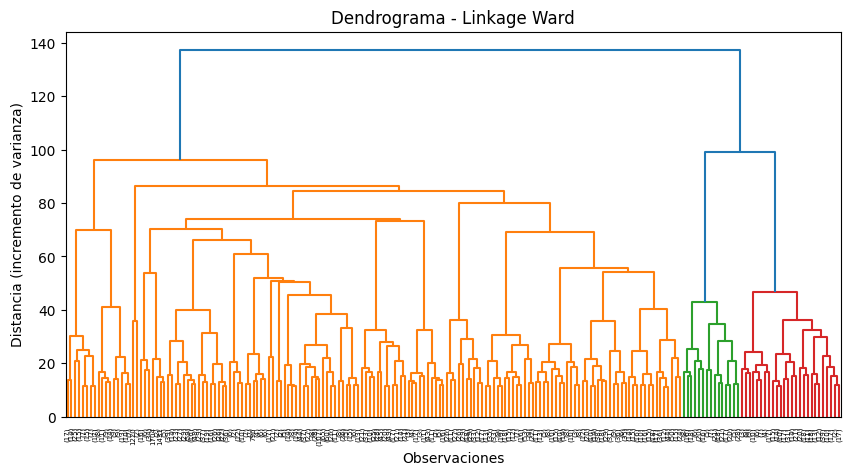

In [367]:
plt.figure(figsize=(10, 5))
dendrogram(Z_out, truncate_mode='lastp', p=200)
plt.title("Dendrograma - Linkage Ward")
plt.xlabel("Observaciones")
plt.ylabel("Distancia (incremento de varianza)")
plt.show()


In [368]:
ward_out = AgglomerativeClustering(n_clusters=3, linkage='ward')

In [369]:
labels_out = ward_out.fit_predict(X_outliers)

In [370]:
silhouette_score(X_outliers, labels_out)

0.1596589733291963

In [371]:
np.unique(labels_out, return_counts=True)

(array([0, 1, 2], dtype=int64), array([2959,  364,  226], dtype=int64))

In [372]:
pca_out = PCA(n_components=2)
X_pca_out = pca_out.fit_transform(X_outliers)

In [373]:
pca_out.explained_variance_ratio_.sum()

0.1952731163367186

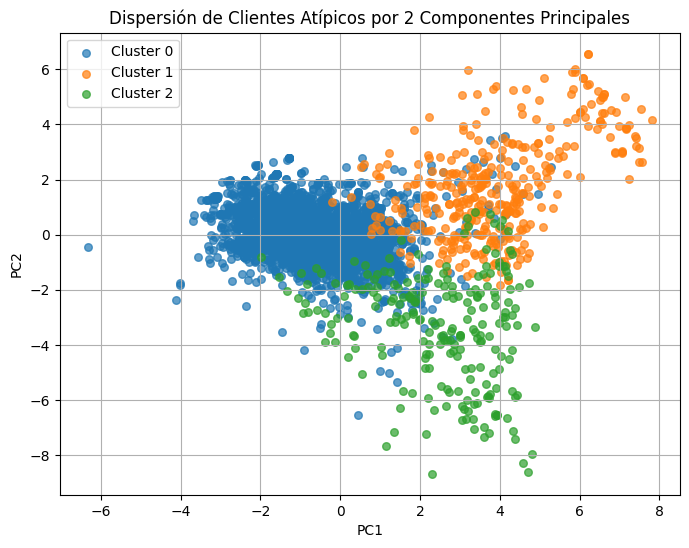

In [374]:
plt.figure(figsize=(8, 6))
for c in np.unique(labels_out):
    mask = labels_out == c
    plt.scatter(
        X_pca_out[mask, 0],
        X_pca_out[mask, 1],
        s=30,
        alpha=0.7,
        label=f"Cluster {c}"
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Dispersión de Clientes Atípicos por 2 Componentes Principales")
plt.legend()
plt.grid(True)
plt.show()

In [375]:
loadings_out = pd.DataFrame(
    pca.components_.T,
    index=X_outliers.columns,
    columns=["PC1", "PC2"]
)

In [376]:
loadings_out['PC1'].sort_values(ascending=False)

Producto_Paquetes 1-2 Kl. (ME)       0.406935
RCE_Si                               0.320237
vr_declarado_Bajo                    0.301879
devolucion_Si                        0.298261
tipo_cuenta_Acuerdo Semanal          0.173272
CPS_Oportunidad de mejora            0.101975
CPS_Oportunidad de entrega           0.084660
tipo_cuenta_Flete Pago               0.083098
CPS_Mayor tiempo no justificado      0.069557
regional_origen_4                    0.069271
guias_prom                           0.050637
regional_origen_5                    0.022519
Producto_Firma de Documentos         0.013310
regional_origen_3                    0.009415
Producto_Mensajeria                 -0.008243
Producto_Mercancia Aerea            -0.012125
regional_origen_1                   -0.017069
Producto_Paqueteo 3-5 Kl.           -0.022591
Producto_Radicación de Documentos   -0.028357
regional_origen_2                   -0.049707
tipo_cuenta_Flete contra entrega    -0.058019
vr_declarado_Medio                

In [377]:
loadings_out['PC2'].sort_values(ascending=False)

tipo_cuenta_Otro                     0.411897
Producto_Otro                        0.385016
CPS_A tiempo                         0.377877
regional_origen_2                    0.173913
vr_declarado_Bajo                    0.164969
Producto_Paquetes 1-2 Kl. (ME)       0.098384
tipo_cuenta_Flete Pago               0.094048
devolucion_No                        0.080096
vr_declarado_Medio                   0.040908
RCE_Si                               0.026395
tipo_cuenta_Flete contra entrega     0.022238
regional_origen_5                   -0.000614
regional_origen_4                   -0.000772
Producto_Firma de Documentos        -0.010813
RCE_No                              -0.026395
Producto_Mensajeria                 -0.030925
Producto_Mercancia Aerea            -0.038342
Producto_Radicación de Documentos   -0.050629
tipo_cuenta_Acuerdo Semanal         -0.064753
regional_origen_3                   -0.077496
devolucion_Si                       -0.080096
guias_prom                        

In [378]:
data_cluster_out = data_clustering.loc[X_outliers.index, X_outliers.columns[~X_outliers.columns.str.contains('Sector_Economico')]]

In [379]:
data_cluster_out['cluster'] = labels_out

In [380]:
summary_mean_cluster_out = data_cluster_out.groupby('cluster').mean()

In [381]:
summary_mean_cluster_out

CPS_A tiempo  CPS_Mayor tiempo no justificado  \
cluster                                                  
0            0.537679                         0.202007   
1            0.456519                         0.217383   
2            0.458396                         0.200933   

         CPS_Oportunidad de entrega  CPS_Oportunidad de mejora  devolucion_No  \
cluster                                                                         
0                          0.152826                   0.107489       0.980036   
1                          0.190872                   0.135227       0.924828   
2                          0.212675                   0.127996       0.487872   

         devolucion_Si  Producto_Firma de Documentos  Producto_Mensajeria  \
cluster                                                                     
0             0.019964                      0.000844             0.040393   
1             0.075172                      0.000000             0.001474   
2             0.512128                      0.000000             0.005988   

         Producto_Mercancia  Producto_Mercancia Aerea  ...  \
cluster                                                ...   
0                  0.322833                  0.002116  ...   
1                  0.115604                  0.000637  ...   
2                  0.172147                  0.001233  ...   

         tipo_cuenta_Flete Pago  tipo_cuenta_Flete contra entrega  \
cluster                                                             
0                      0.165468                          0.221336   
1                      0.322021                          0.065036   
2                      0.027869                          0.082750   

         tipo_cuenta_Otro  unidad/guia  guias_prom  regional_origen_1  \
cluster                                                                 
0                0.057940     1.579099    7.225418           0.322175   
1                0.005800     1.085251    7.133279           0.270542   
2                0.004425     1.168112   34.557568           0.324789   

         regional_origen_2  regional_origen_3  regional_origen_4  \
cluster                                                            
0                 0.254837           0.170330           0.112855   
1                 0.215215           0.217610           0.144043   
2                 0.209990           0.171445           0.118291   

         regional_origen_5  
cluster                     
0                 0.139803  
1                 0.152590  
2                 0.175485  

[3 rows x 32 columns]

In [382]:
load_pc1 = loadings_out['PC1'].sort_values(ascending=False).index.tolist()

load_pc1.remove('devolucion_No')
load_pc1.remove('RCE_No')

In [383]:
summary_mean_cluster_out[(load_pc1[:4] + load_pc1[-4:])].style.format("{:.2f}")

In [384]:
load_pc2 = loadings_out['PC2'].sort_values(ascending=False).index.tolist()

load_pc2.remove('devolucion_No')
load_pc2.remove('RCE_No')

In [385]:
summary_mean_cluster_out[(load_pc2[:4] + load_pc2[-4:])].style.format("{:.2f}")

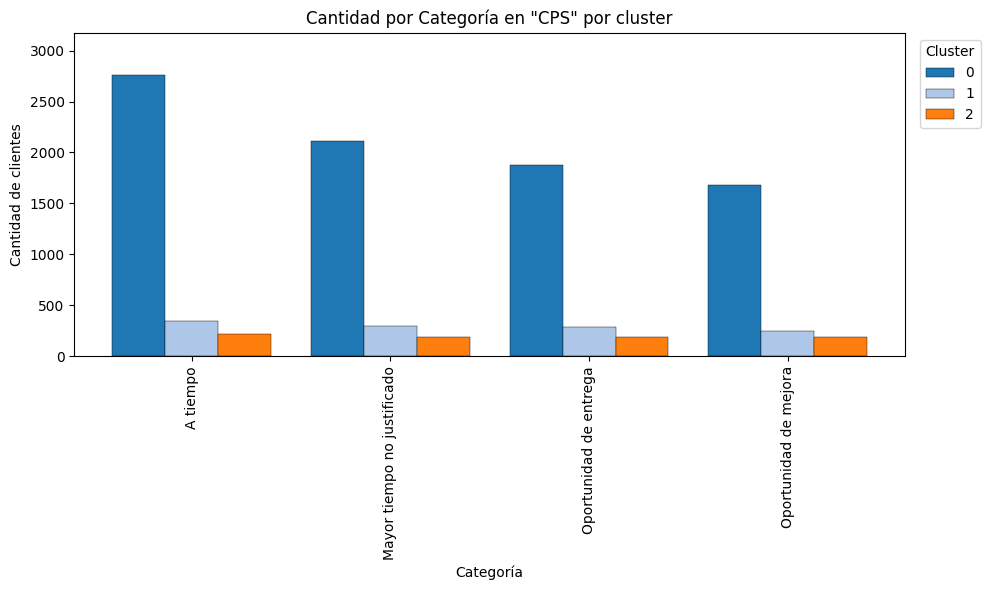

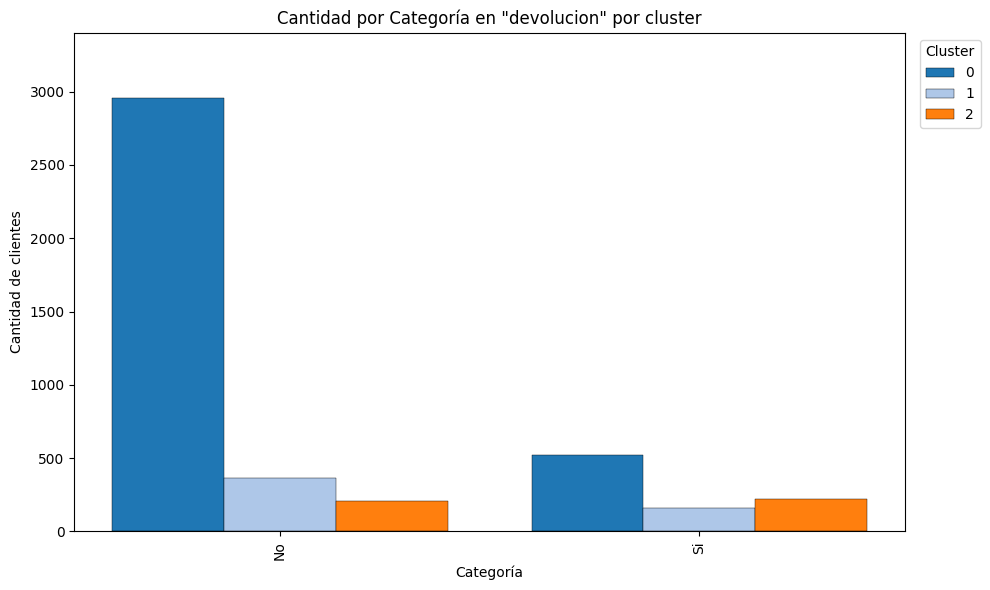

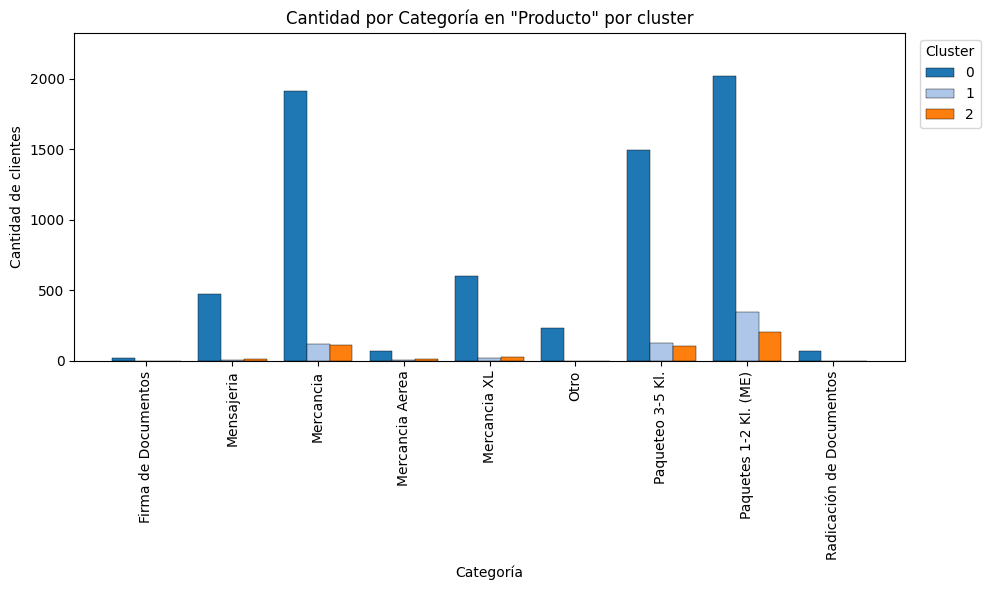

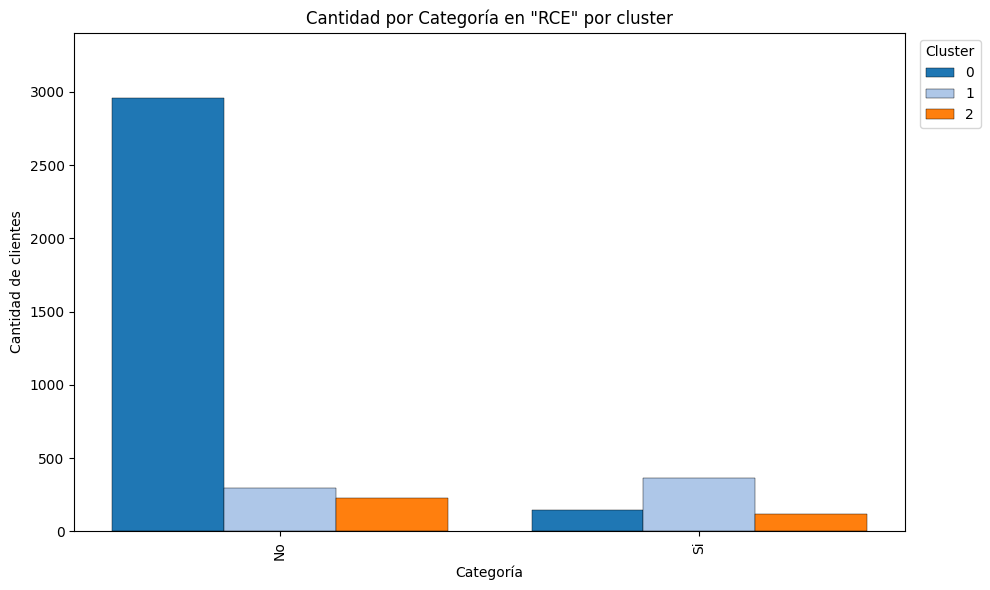

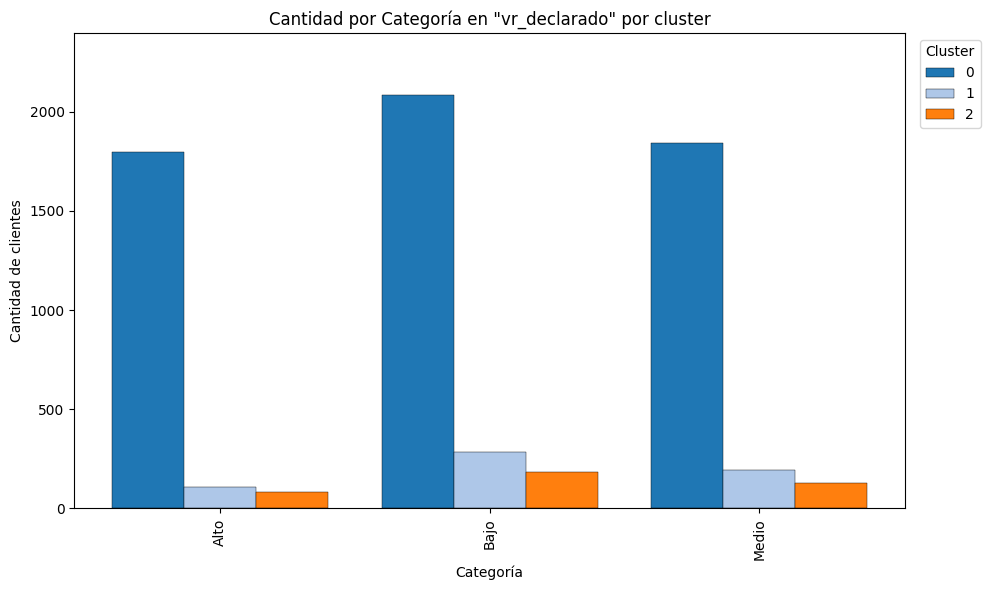

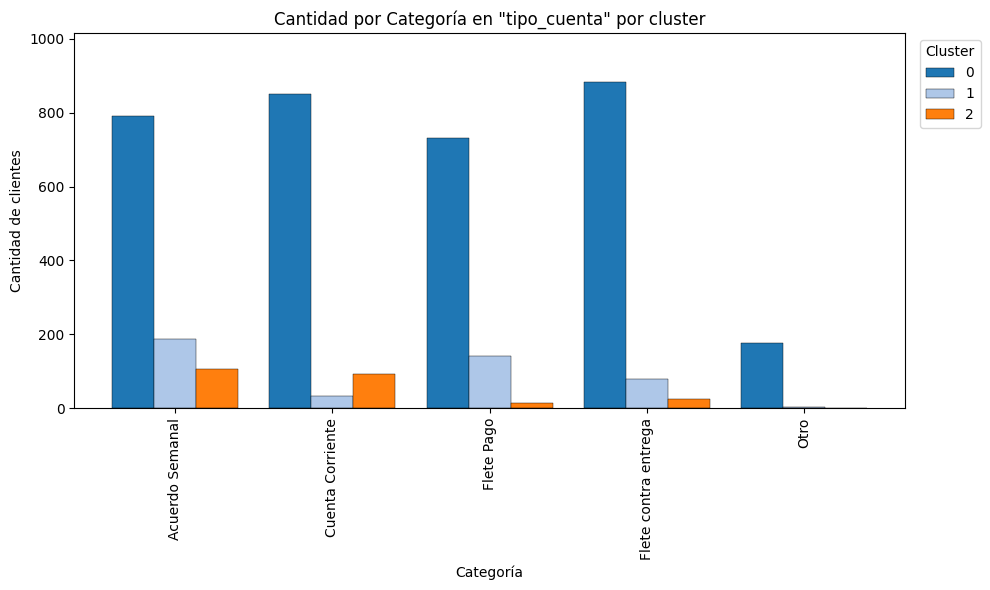

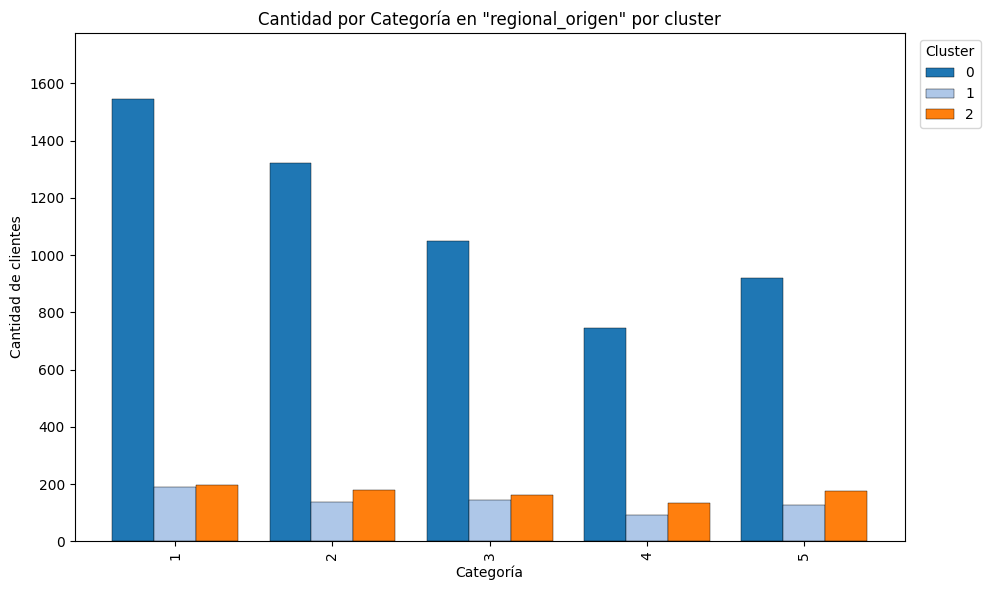

In [386]:
plot_categories_by_cluster(data_cluster_out, columns_ssc)

In [387]:
all_results, significant = mann_whitney_by_cluster(
    data_cluster_out,
    cluster_col="cluster",
    c1=1,
    c2=2
)

significant

variable        pvalue  cliff_delta    pvalue_adj  \
4                      devolucion_No  4.025905e-83     0.924134  6.240153e-82   
5                      devolucion_Si  4.025905e-83    -0.924134  6.240153e-82   
8                 Producto_Mercancia  2.221882e-04    -0.159803  4.919882e-04   
9           Producto_Mercancia Aerea  2.476034e-02    -0.035277  4.264280e-02   
10             Producto_Mercancia XL  6.132611e-03    -0.064196  1.188193e-02   
13    Producto_Paquetes 1-2 Kl. (ME)  5.036203e-03     0.130336  1.040815e-02   
15                            RCE_No  2.979304e-75    -0.894535  2.308961e-74   
16                            RCE_Si  2.979304e-75     0.894535  2.308961e-74   
21      tipo_cuenta_Cuenta Corriente  6.792257e-20    -0.318098  3.509333e-19   
22            tipo_cuenta_Flete Pago  2.057449e-20     0.349606  1.275618e-19   
23  tipo_cuenta_Flete contra entrega  8.984033e-03     0.084922  1.638265e-02   
25                       unidad/guia  3.611107e-07    -0.177915  8.611100e-07   
26                        guias_prom  7.131252e-10    -0.300848  2.009717e-09   
27                 regional_origen_1  3.633996e-10    -0.300010  1.126539e-09   
28                 regional_origen_2  4.172141e-11    -0.305832  1.437071e-10   
29                 regional_origen_3  3.068450e-07    -0.236397  7.926828e-07   
30                 regional_origen_4  2.674352e-11    -0.285240  1.036311e-10   
31                 regional_origen_5  3.208145e-18    -0.400637  1.420750e-17   

    significant  
4          True  
5          True  
8          True  
9          True  
10         True  
13         True  
15         True  
16         True  
21         True  
22         True  
23         True  
25         True  
26         True  
27         True  
28         True  
29         True  
30         True  
31         True

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\pandas\plotting\_matplotlib\tools.py:233: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(**fig_kw)


devolucion_No                                                         \
                count      mean       std  min       25%  50%       75%  max   
cluster                                                                        
1               364.0  0.924828  0.104162  0.6  0.864286  1.0  1.000000  1.0   
2               226.0  0.487872  0.250388  0.0  0.363636  0.5  0.666667  1.0   

        devolucion_Si            ... vr_declarado_Bajo       \
                count      mean  ...               75%  max   
cluster                          ...                          
1               364.0  0.075172  ...               1.0  1.0   
2               226.0  0.512128  ...               1.0  1.0   

        Producto_Firma de Documentos                                     
                               count mean  std  min  25%  50%  75%  max  
cluster                                                                  
1                              364.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2                              226.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[2 rows x 256 columns]

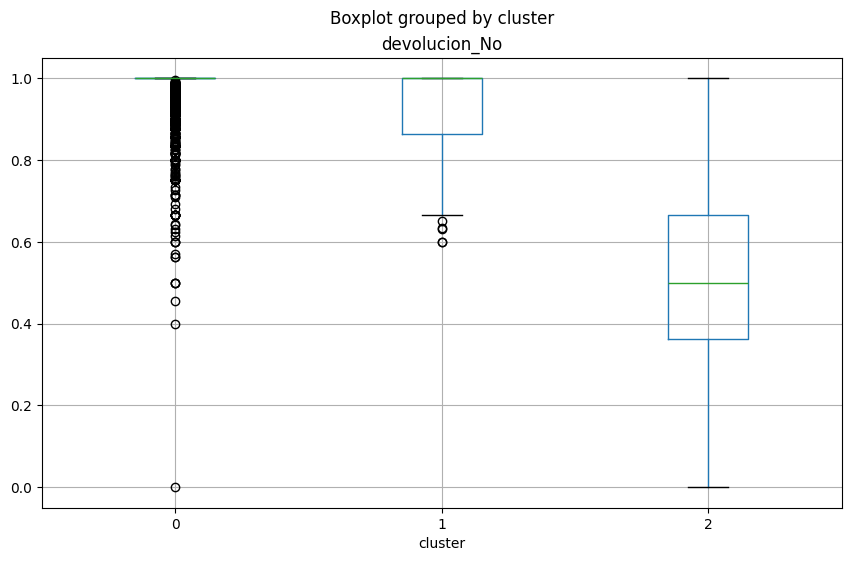

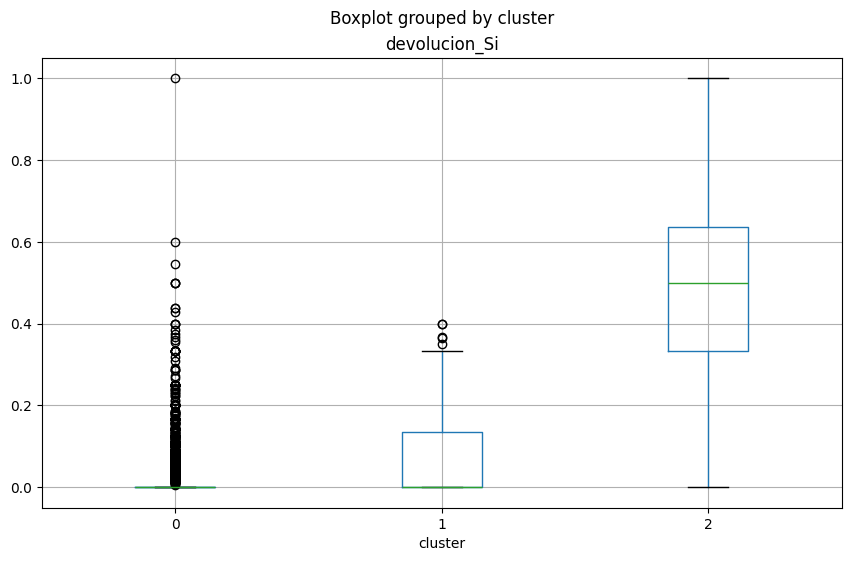

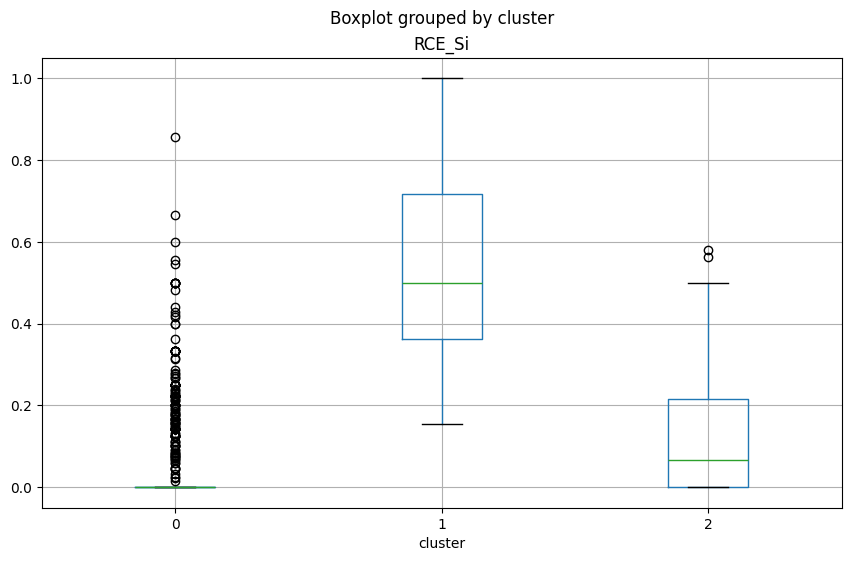

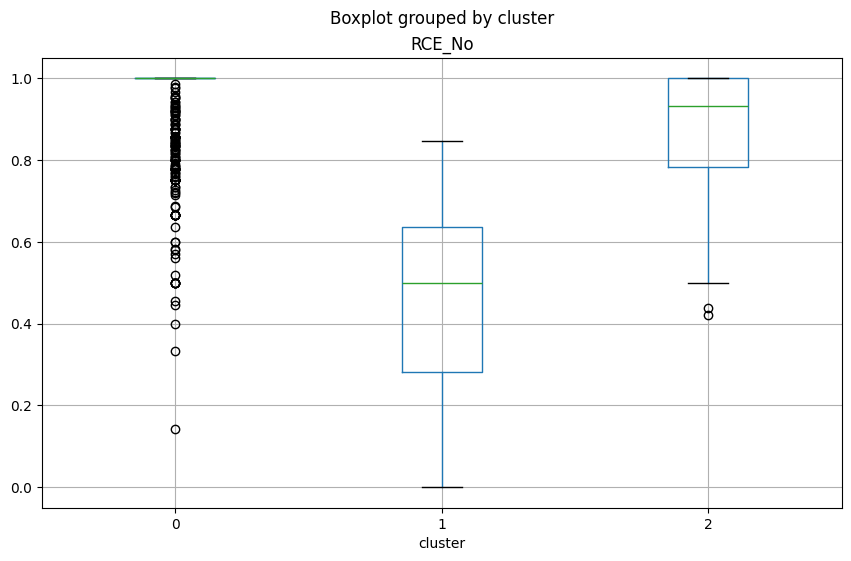

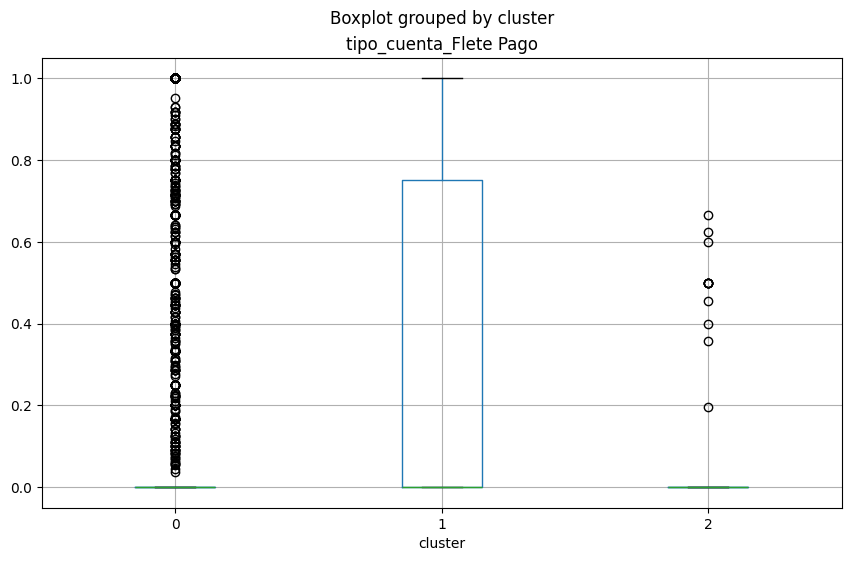

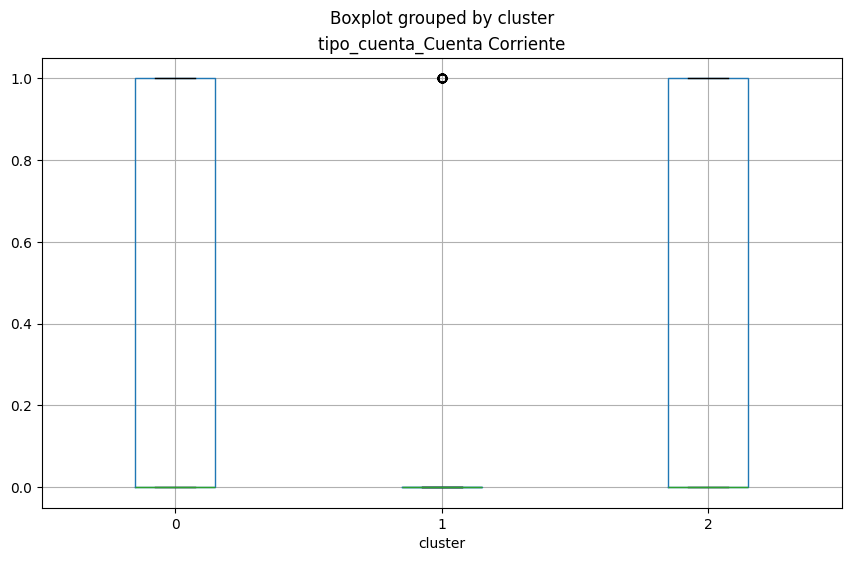

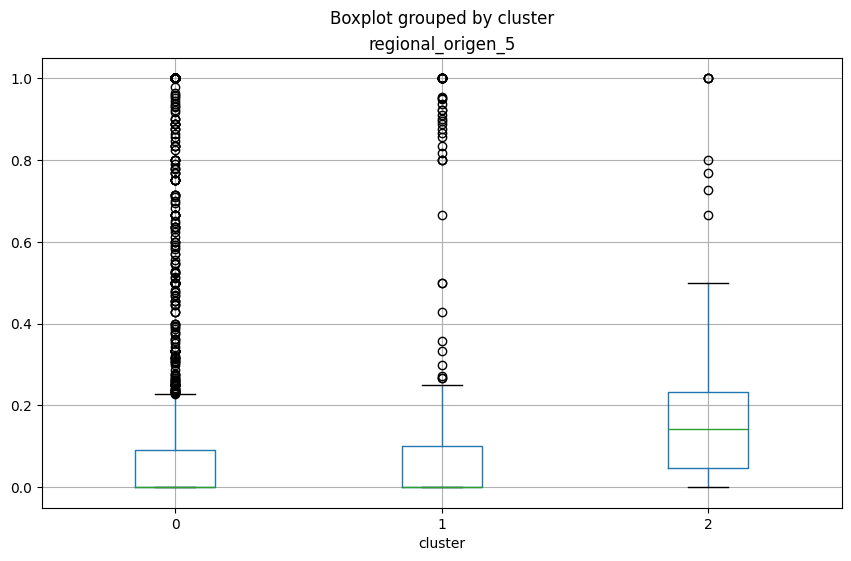

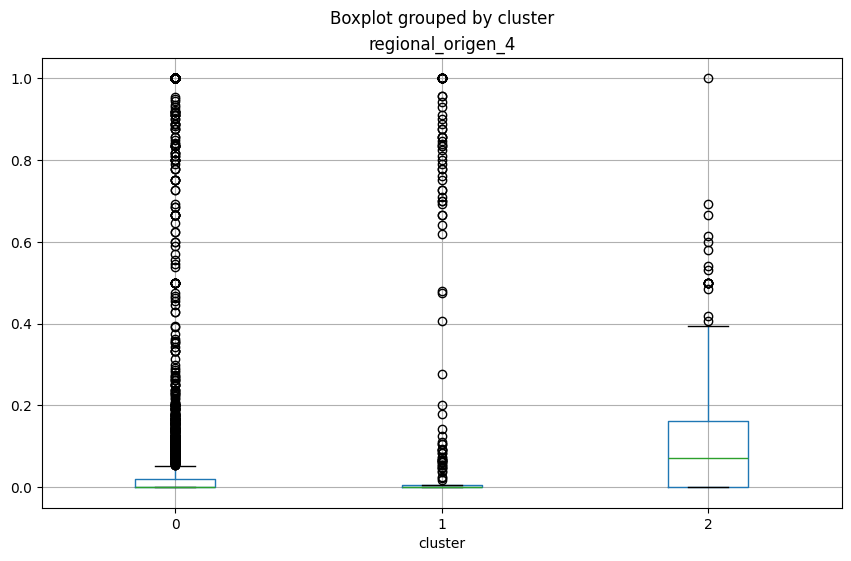

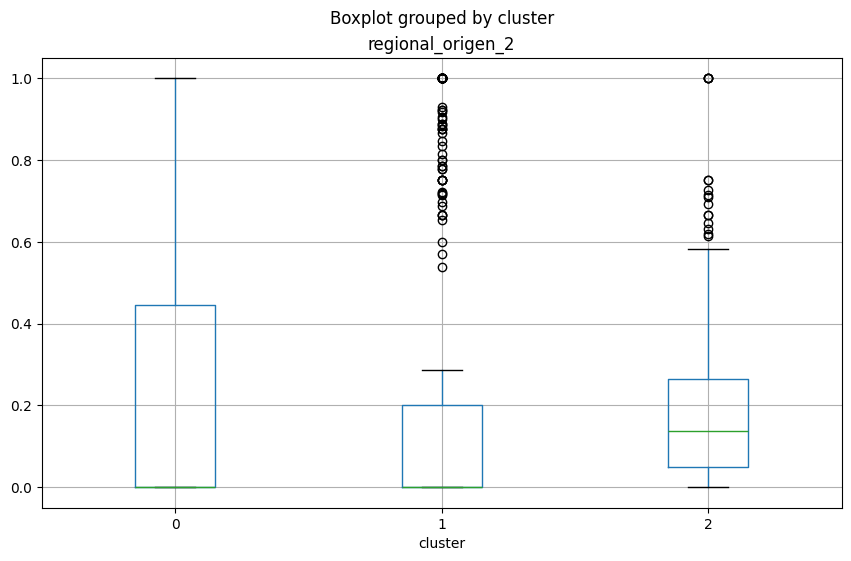

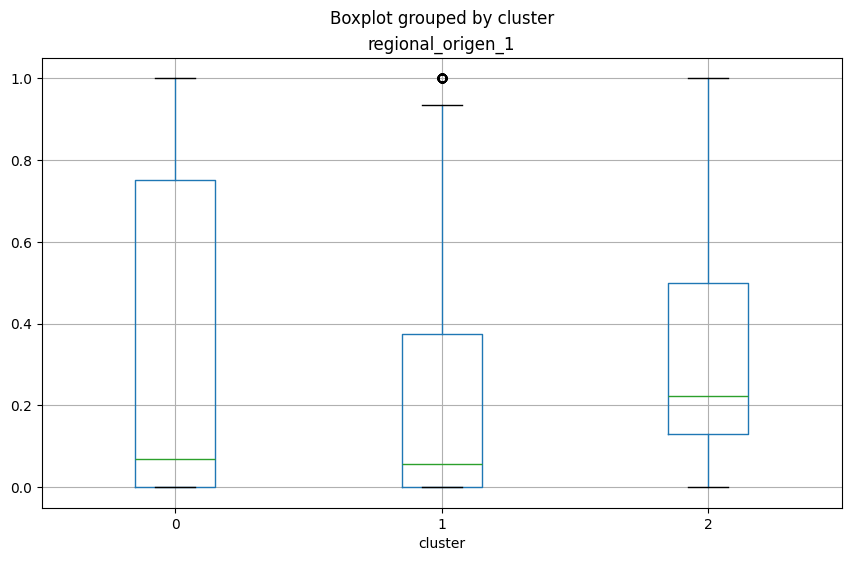

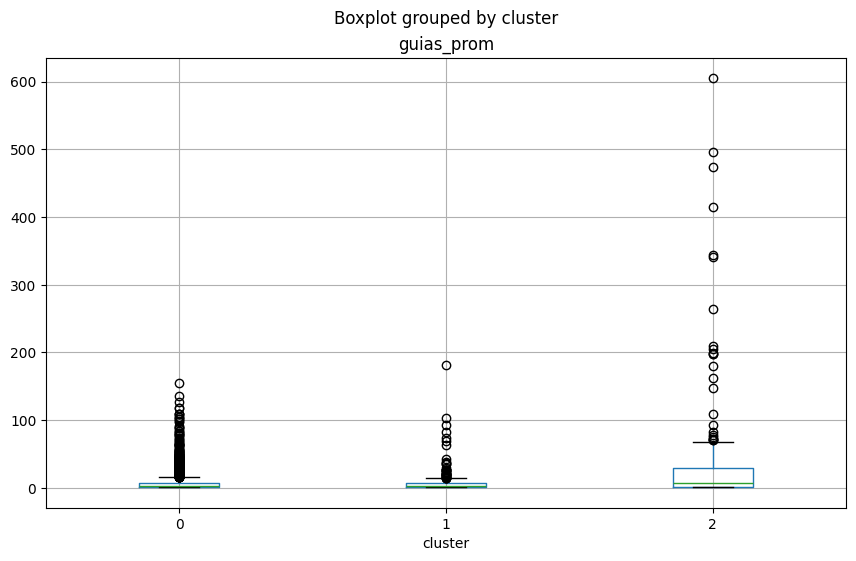

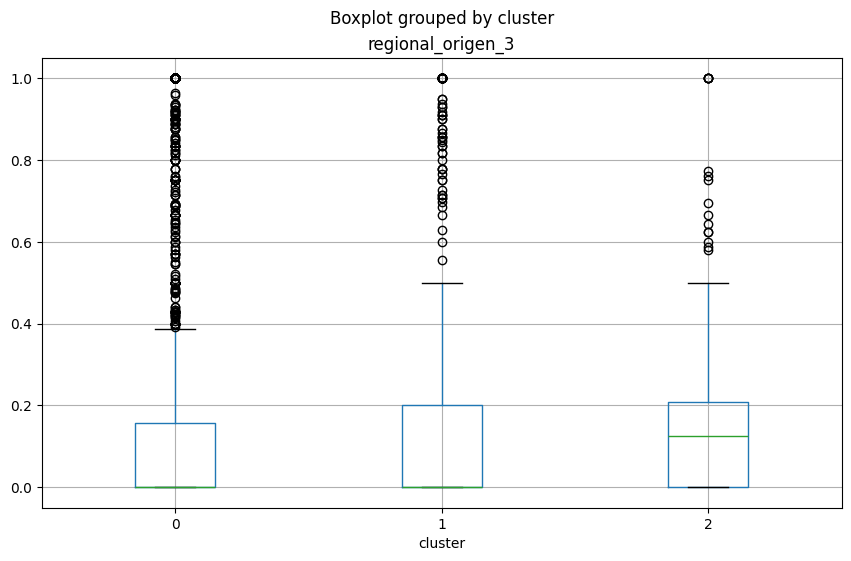

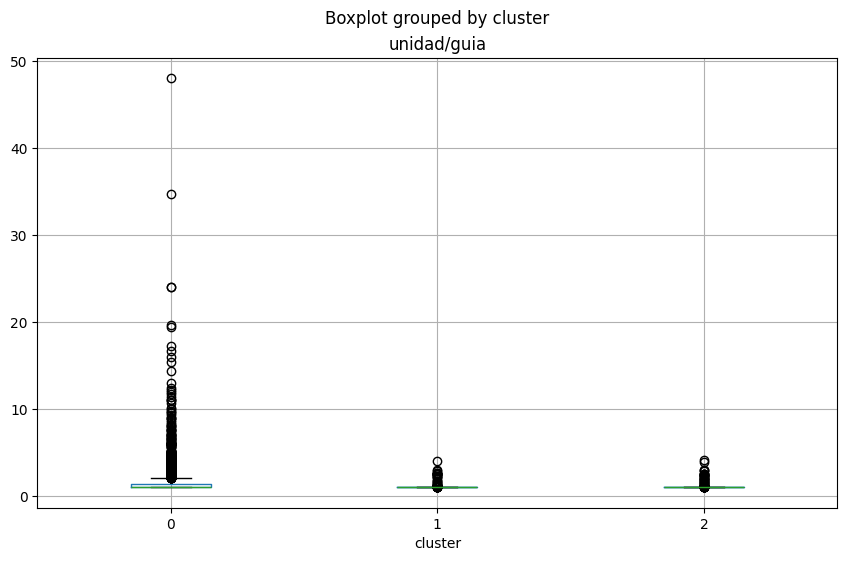

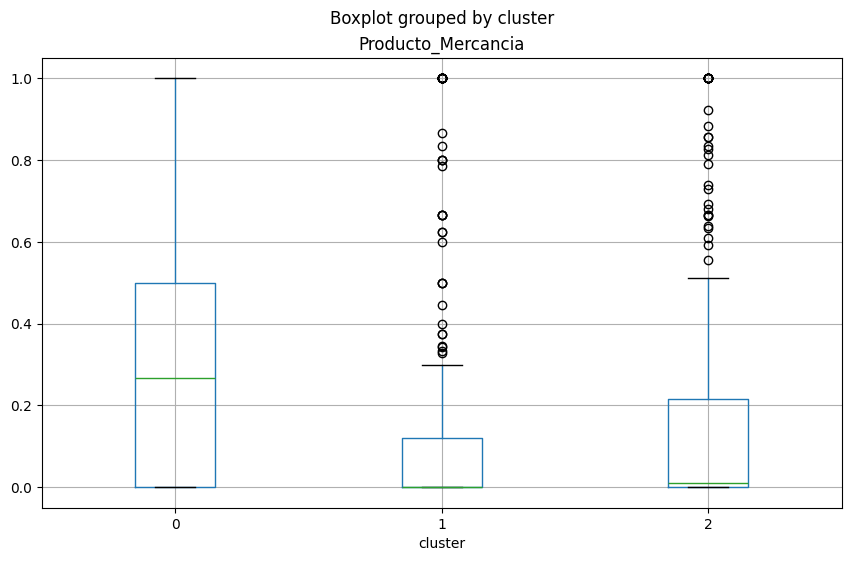

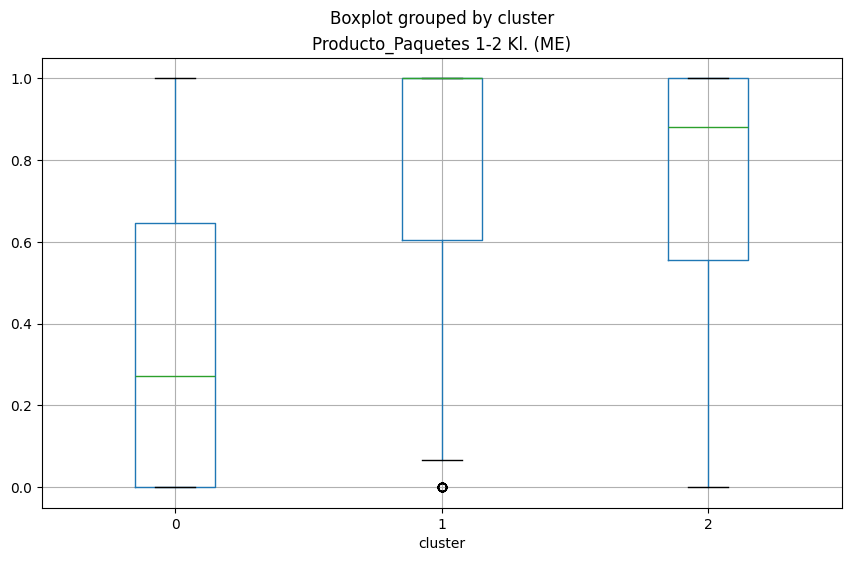

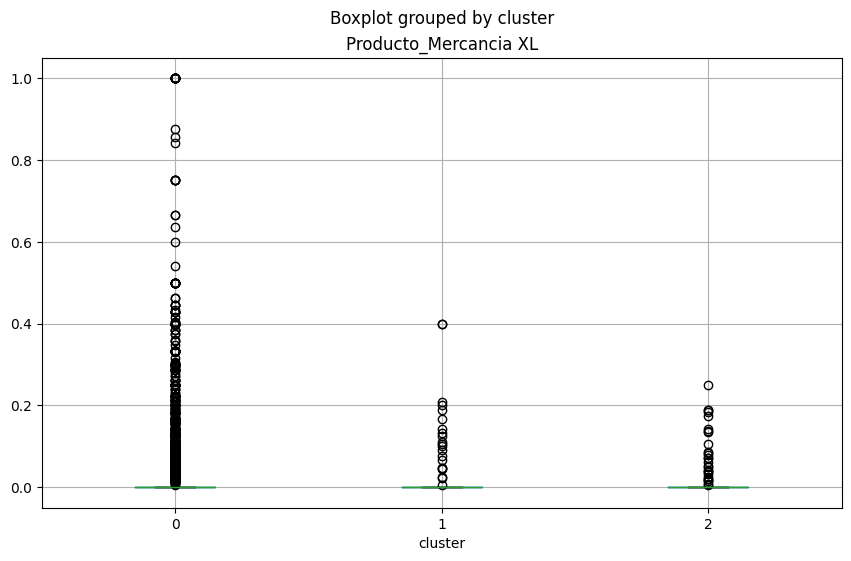

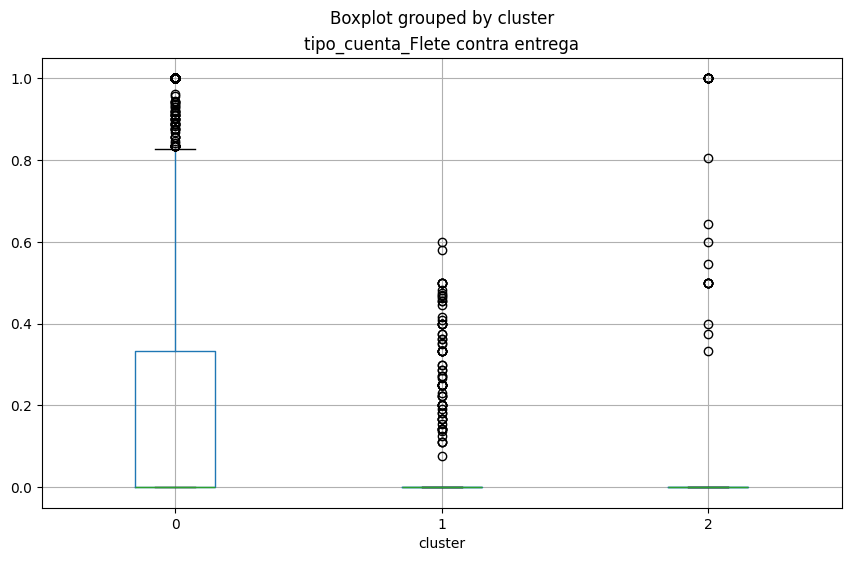

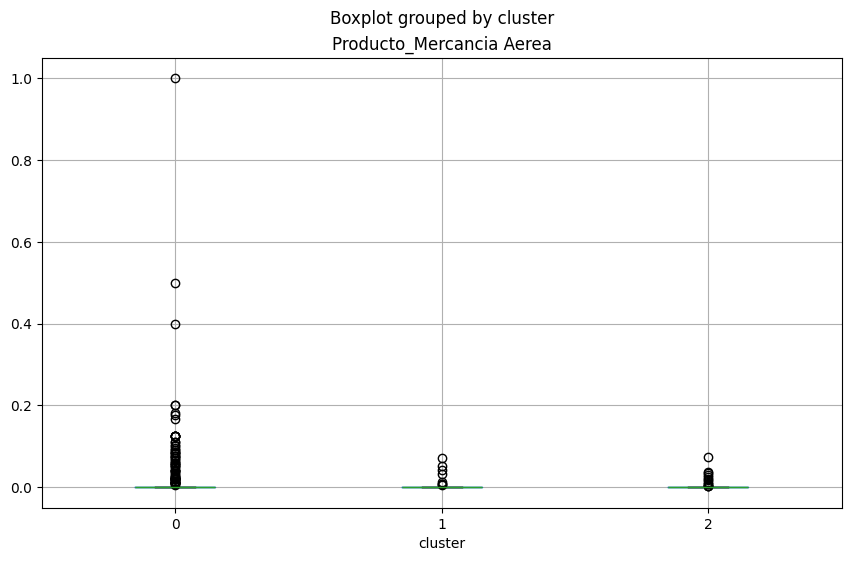

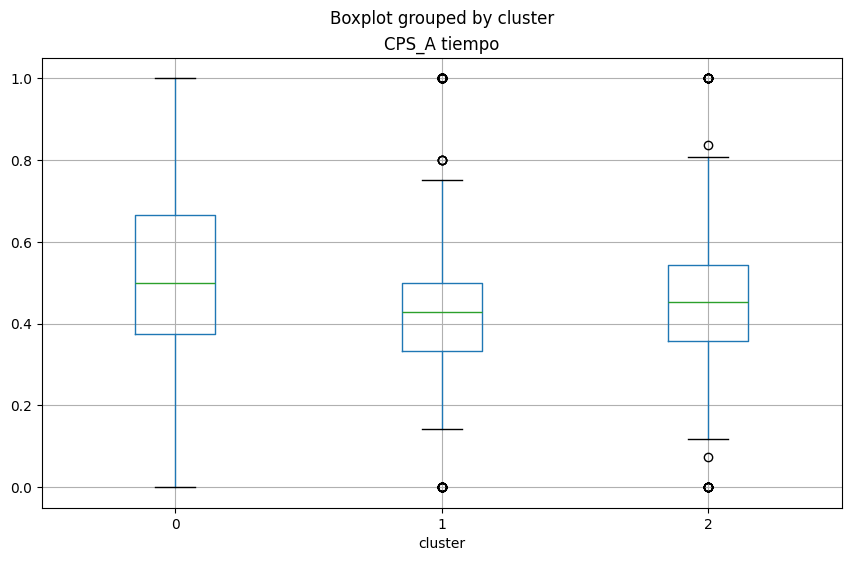

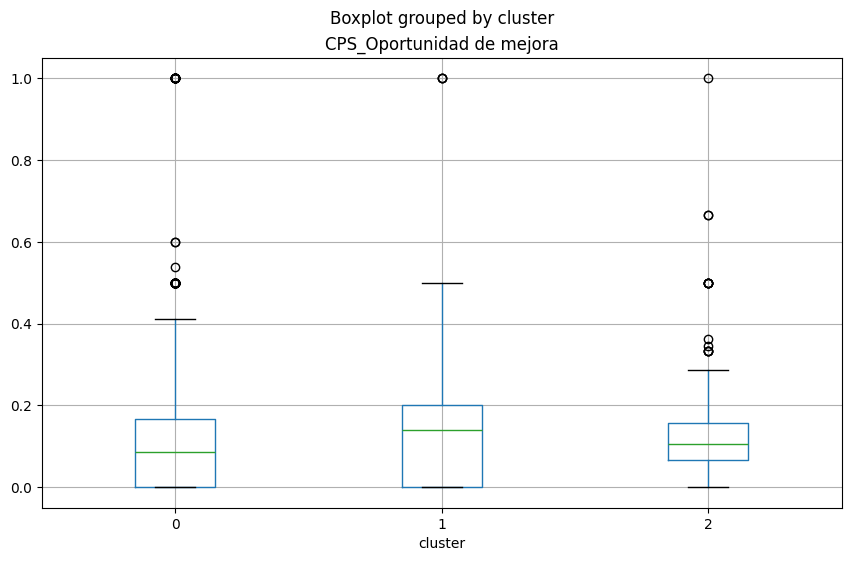

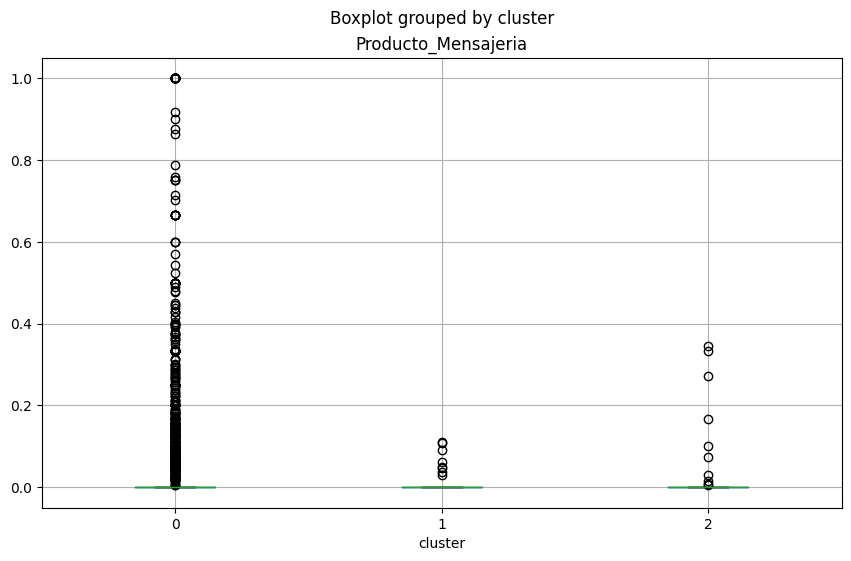

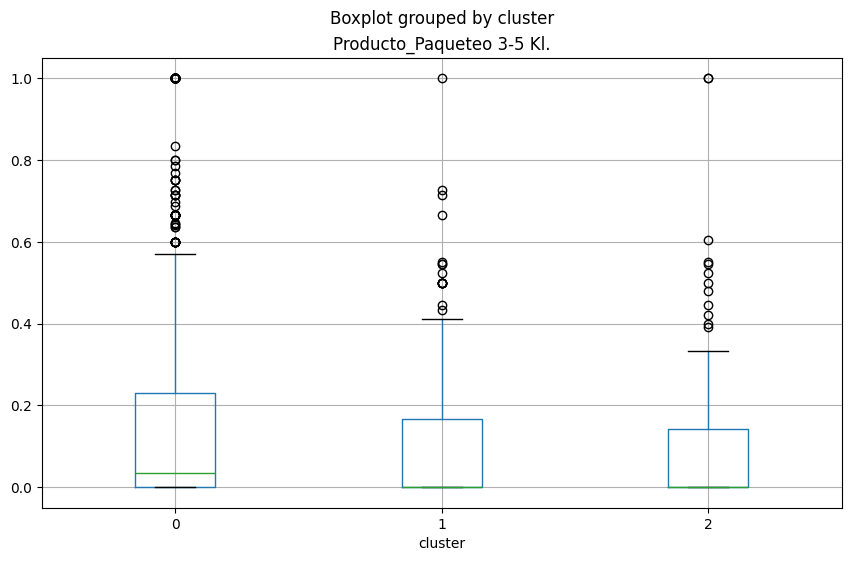

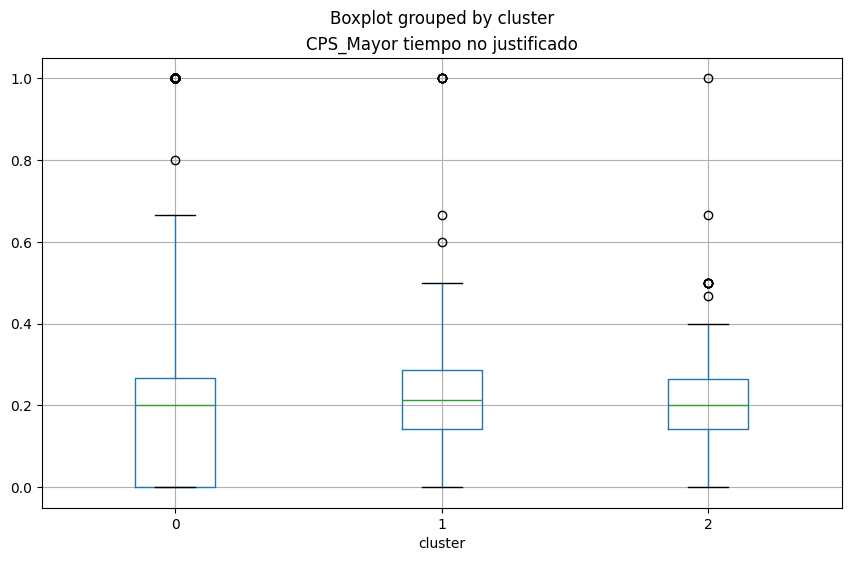

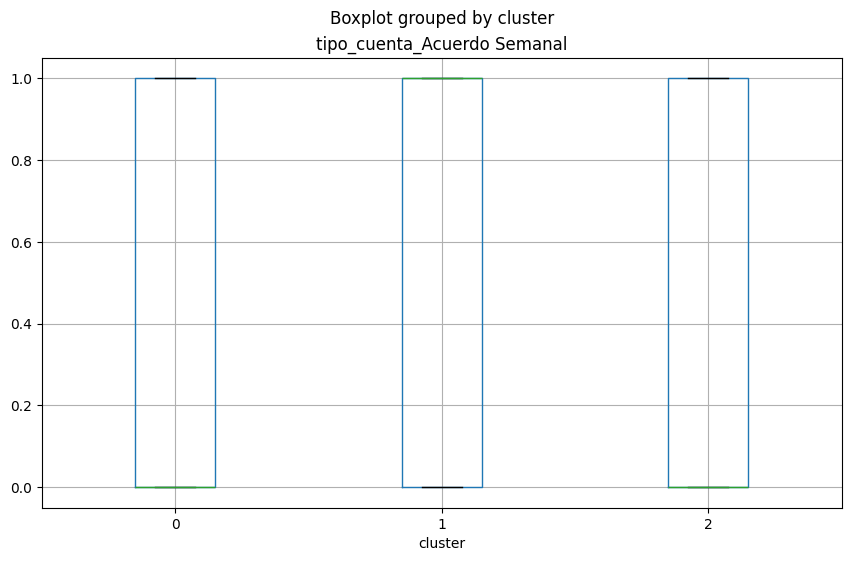

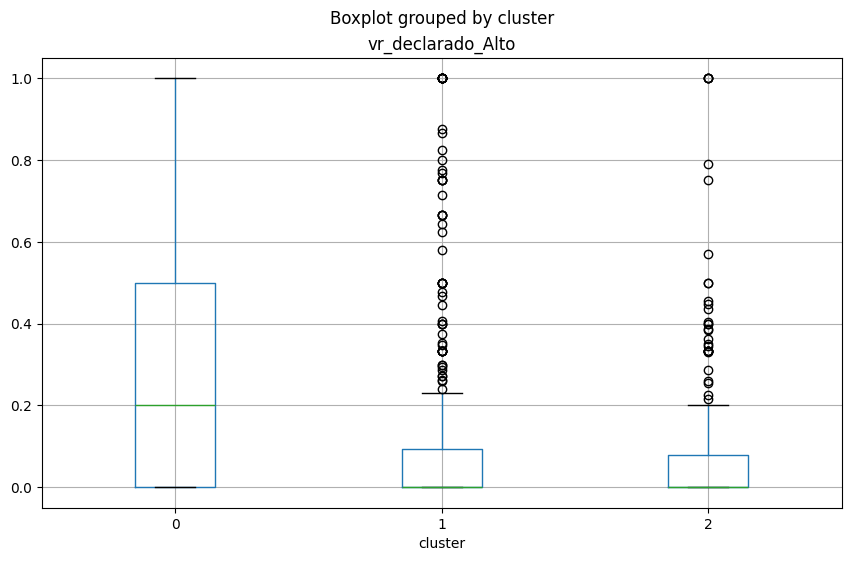

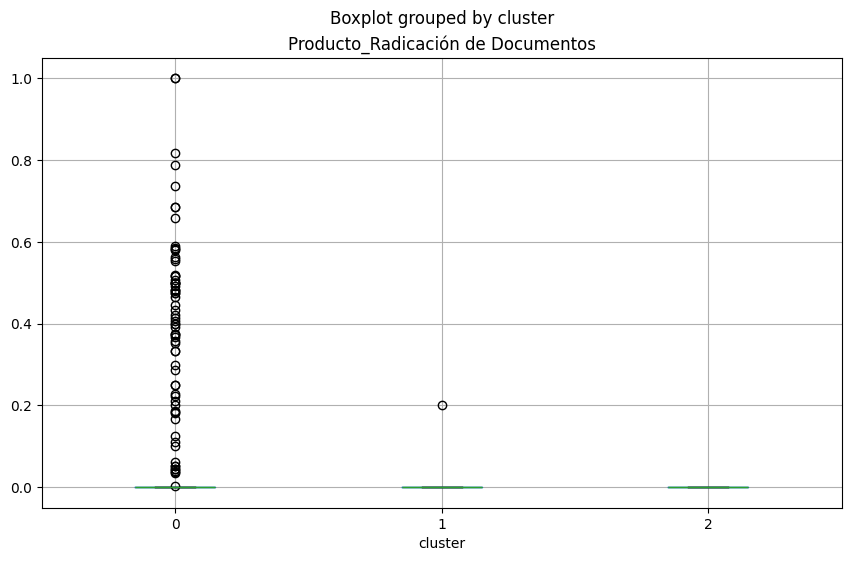

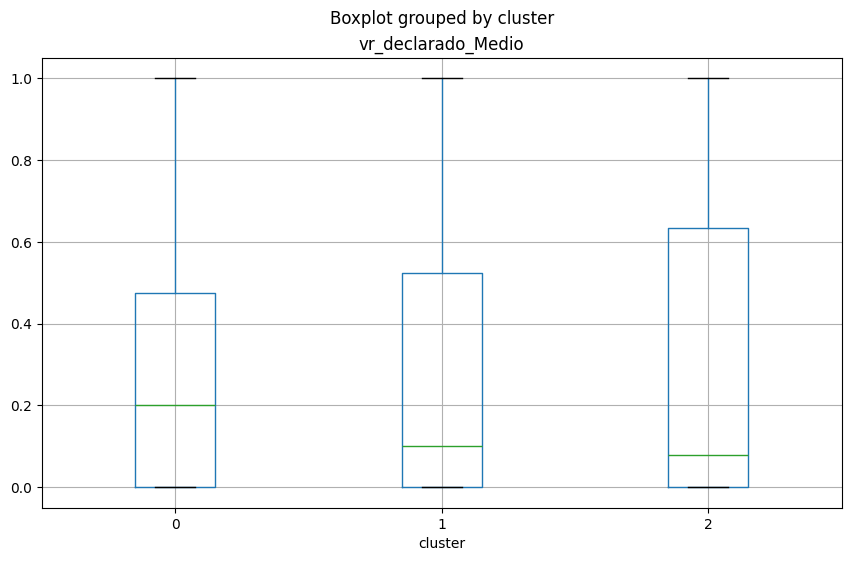

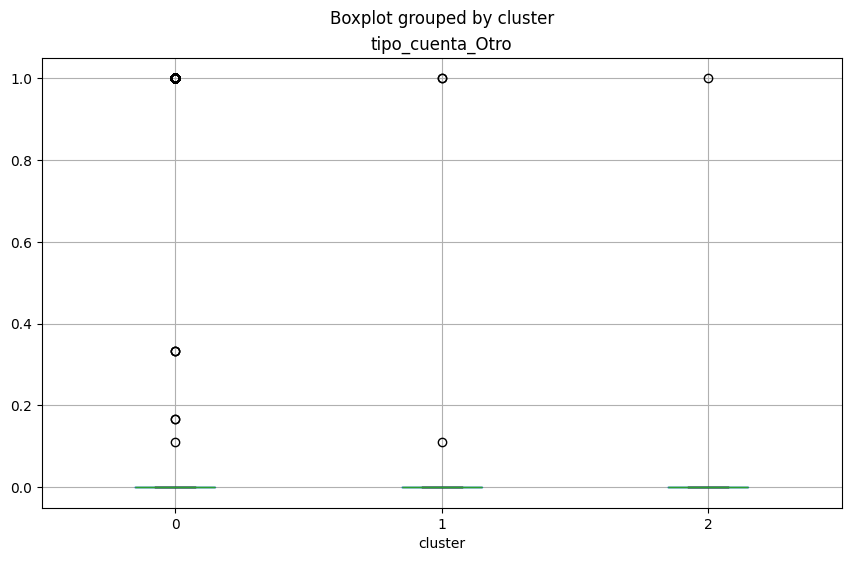

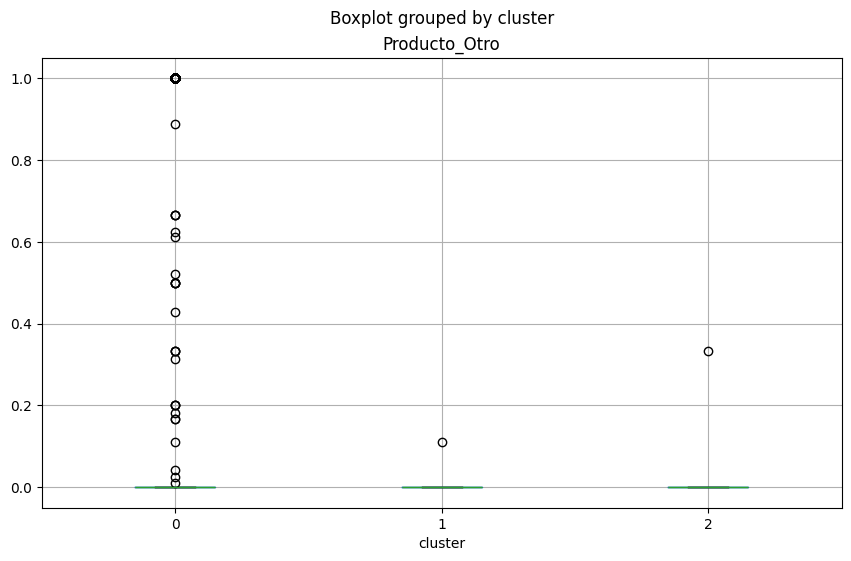

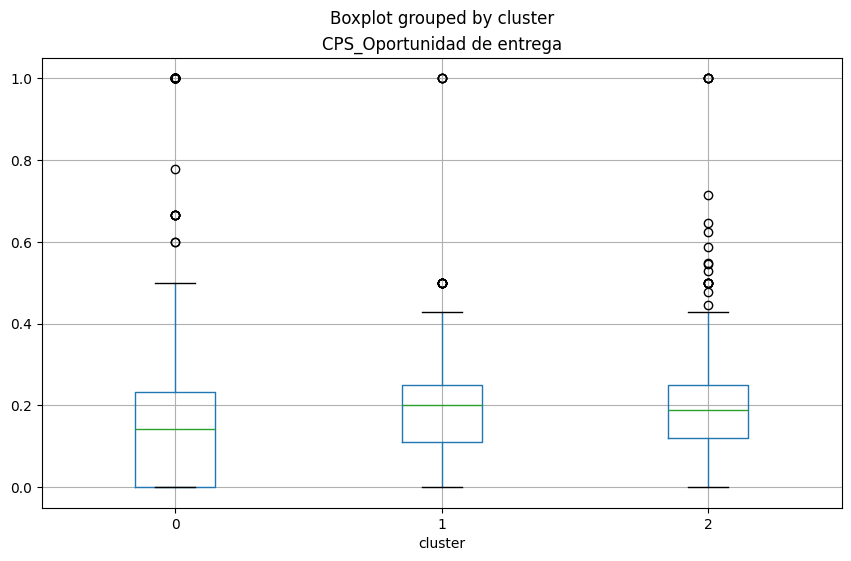

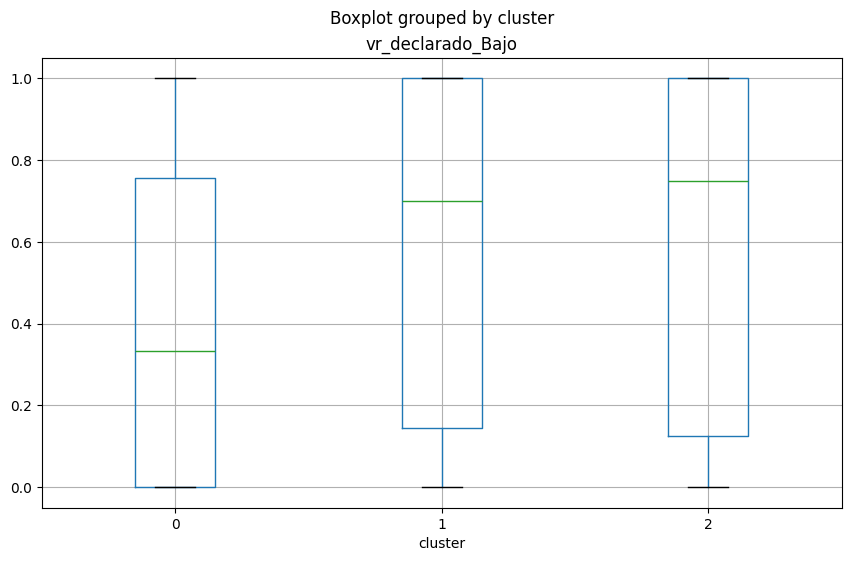

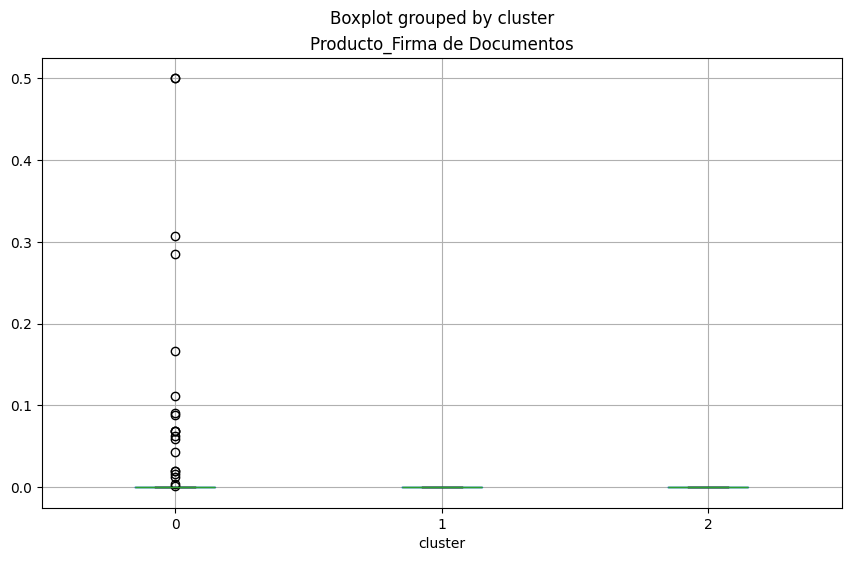

In [388]:
summary_dif(data_cluster_out, all_results['variable'].tolist(), 1, 2, [0])

In [389]:
clusters_out = data_cluster_out[data_cluster_out['cluster'].isin([1, 2])]['cluster']

data_clusterizada.loc[clusters_out.index, 'cluster'] = clusters_out.astype(str) + '_out'

data_clusterizada resume los casos de clusterización, donde _PC es para el caso de 400 clientes principales, _C2 para los clientes de productos minoritarios, _Res para clientes en clusters densos (pocas guías y productos de mensajería y mercancía) y _out para los clusters identificados en el caso de los clientes atípicos. El cluster 0 del último caso no se identificó como cluster pues solo se agrupan allí los clientes que no tienen porcentaje de devoluciones y los que no tienen recaudo contra entrega. Este comportamiento como cluster se debe al peso de la variable de devolucion y RCE (pues se dejaron las variables complementarias _Si y _No)

In [391]:
np.unique(data_clusterizada['cluster'], return_counts=True)

(array(['-1', '0_PC', '1_C2', '1_PC', '1_Res', '1_out', '2_C2', '2_PC',
        '2_Res', '2_out', '3_C2', '3_PC', '3_Res', '4_C2', '4_PC', '4_Res'],
       dtype=object),
 array([2959,  210,   54,  140,   36,  364,   51,   12,  856,  226,   70,
          11, 1074,  110,   27, 1059], dtype=int64))